# Problem Statement

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company

* If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

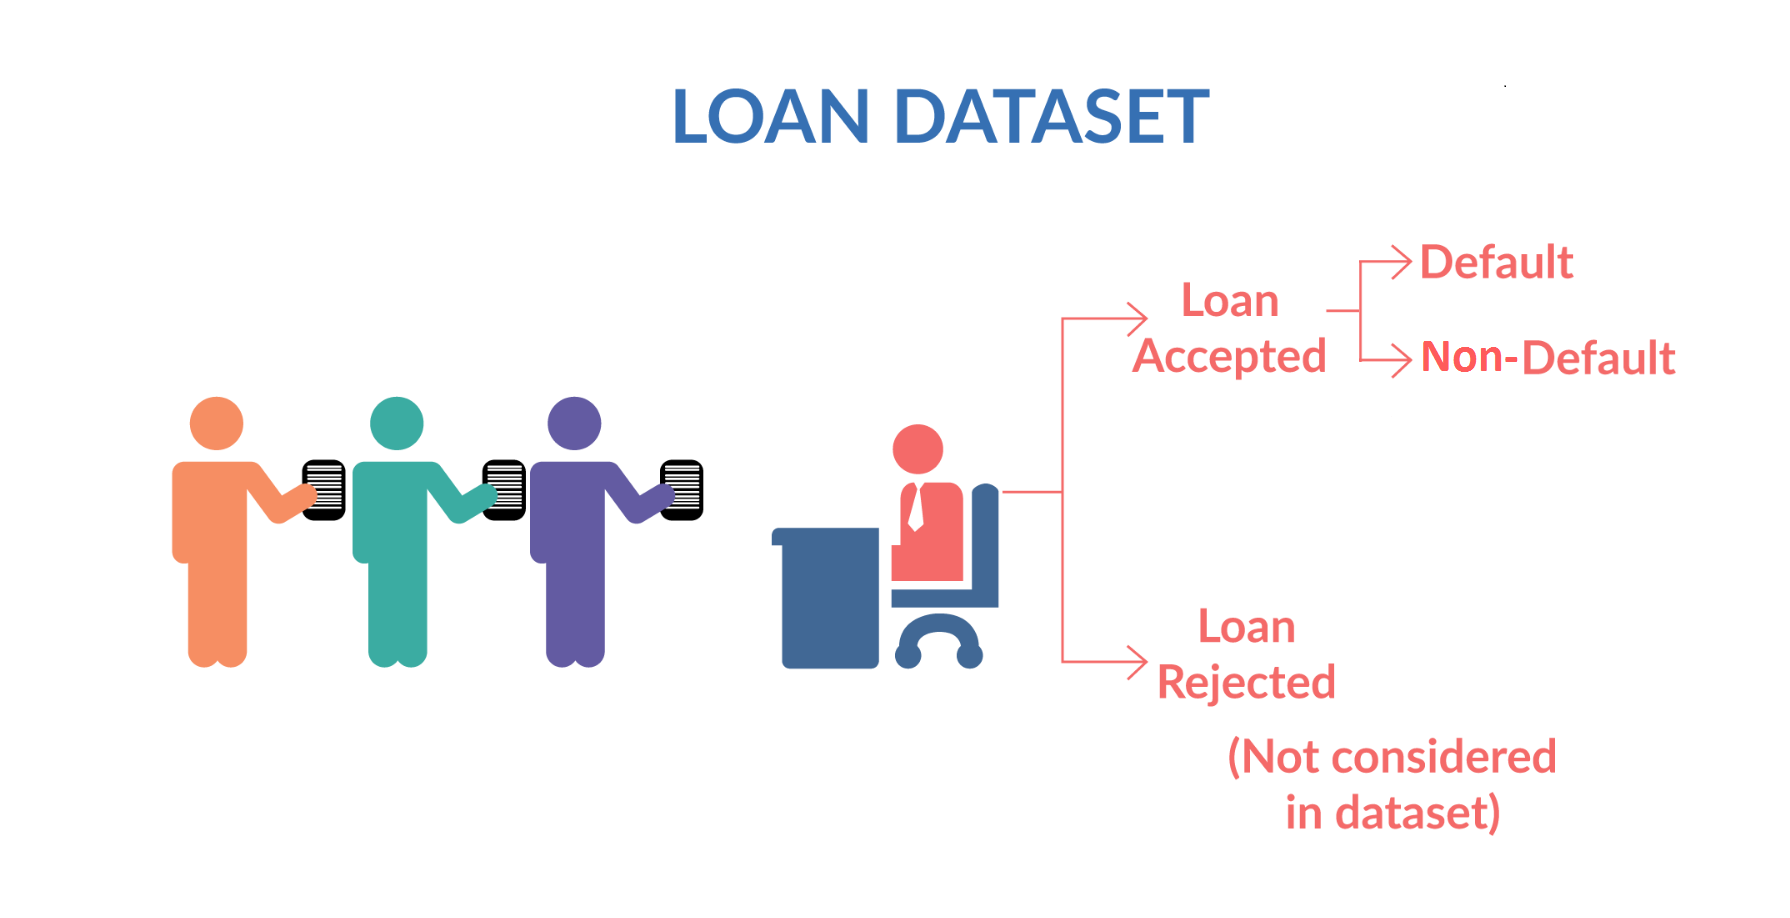
Figure Loan Data Set can also refer to link: [Upgrad Lending Club Case Study](https://learn.upgrad.com/course/4617/segment/27462/164543/505323/2600603)

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These  candidates are not labelled as 'defaulted'.

    * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Note: Evaluation Rubric For reference
1. Data understanding  (10%)
2. Data Cleaning and Manipulation (20%)
3. Data analysis (40%)
4. Presentation and Recommendations (20%)
5. Conciseness and readability of the code (10%)

## Thought Process 

1. Exporing Data 
    For understanding or to explore data set, first step is to load the data and and analyse using 
      * df.info
      * df.shape
      * df[listofcols].describe().T T : to transpose the data for easy visualization

2. Cleaning the data, manipulation (or impute the data) Data cleaning and imputation includes :
    - look for null data, using df.isnull().sum() : gives number of null values in all columns in df
    - use data.isnull().mean()*100 to get the feel of missing values in every column
    - Check for duplicate values using : data.duplicated.sum() / data.duplicated.any(): duplicate values will influence the final result / outcome and will add bias to the data. 
    - So its very much critical to find duplicates and drop them as required. drop data using : data.drop_duplicates(subset=None, inplace=True)
    - **Note**: alternatively find unique values in each column using df.nunique() to count the number of unique values in a given axis and drop the duplicates using df.drop(same_value_cols, axis=1)
    - drop all columns which has not valid values (i.e. all null values) such columns does not add to any value for analysis.
    
3. Data analysis includes:
    - Check for mean, median, mode , and std deviations, which gives us insights into the data and distribution of data.
    - Check for outliers : can be checked using visualization boxplot, the boxplot clearly shows the outliers , whiskers of the box plot indicate the outliers.
    - Based on above analysis, we can have outlier threshold of interquartile ranges q1 as 0.05 and q4 as 0.95 (5% percentile to 95% percentile) and remove the outliers.
    - Outliers can impact analysis as the analysis will be hearvily biased towards outliers, so the outliers needs to be identfied and replaced with threshold values (need to rephrase these)
    
    **NOTE** : check EDA session by Aditya B : on replacing data using threadsholds  time frame for the same in the video : 1:56:13 
    link : [EDA session by Aditya B](https://live.upgrad.com/summary/oa1QB1mFMoFniNGUDjsreNfCZ3NTAse7)
    
    - Correlation function : this is similar to redundant / duplicate data, adds biases to the model and we need to give importance to correlated features and its recommended to drop highly correlated features to avoid biases to the outcome / model.
    - Heat map can help in indentifying highly correlated features.
    
    **TODO** : add more details on data analysis and cleaning and path we want to take for case study.
    
  

## Data import and exploration, import loan.csv and dict in different data frames and do initial clean up like stripping space, null/nan values and dropping columns with all nan values 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime
%matplotlib inline

df = pd.read_csv("loan.csv", low_memory=False)
df.columns = df.columns.str.replace(' ', '')

data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict.columns = data_dict.columns.str.replace(' ', '')
data_dict.info(verbose=True, show_counts=True)

/Users/sbhargav/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [3]:
data_dict.isnull().sum()

LoanStatNew    2
Description    1
dtype: int64

In [4]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>Check for NaN values in rows and remove them from dict, from visual inspectation of dictionary excel sheet last 2 rows has&nbsp;empty values which is removed using dropna()
</strong>
</h3>

In [5]:
data_dict = data_dict.dropna()
data_dict.tail(5)

LoanStatNew                                        Description
110     total_rev_hi_lim             Total revolving high credit/credit limit
111                    url             URL for the LC page with listing data.
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...

<h3><strong>Find any duplicate values and if present drop them, not necessary for dict but lets have it&nbsp;</strong></h3>

In [6]:
if data_dict.duplicated().any():
    data_dict.drop_duplicates(subset=None, inplace=True)
data_dict.shape

(115, 2)

In [7]:
data_dict

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
110     total_rev_hi_lim             Total revolving high credit/credit limit
111                    url             URL for the LC page with listing data.
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...

[115 rows x 2 columns]

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

<h3><p><strong>Few columns have extra spaces as the end in the data dictionary. </strong></p>
<p><strong>Lets trim these spaces&nbsp;</strong></p>
    </h3>

In [9]:
data_dict.LoanStatNew = data_dict.LoanStatNew.apply(lambda col : col.strip())
data_dict.LoanStatNew

0             acc_now_delinq
1       acc_open_past_24mths
2                 addr_state
3                   all_util
4                 annual_inc
               ...          
110         total_rev_hi_lim
111                      url
112      verification_status
113    verified_status_joint
114                 zip_code
Name: LoanStatNew, Length: 115, dtype: object

<h3><strong>Now compare column names from df and dictionary to be sure both matches and modify any mismatching columns</strong></h3>

In [10]:
df_columns = df.columns

dict_cols = list(data_dict.LoanStatNew.apply(lambda x : x))
print(len(dict_cols))
mismatch_cols = [col for col in df_columns if col not in dict_cols]

mismatch_dict = {}

for col in mismatch_cols:
    try:
        index = df.columns.get_loc(col)
        mismatch_dict[col] = index
    except :
        pass
 
print(mismatch_dict)
print("Num of columns in DataFrame and Dict Match ?:", len(dict_cols) == len(df_columns))

115
{'verification_status_joint': 55}
Num of columns in DataFrame and Dict Match ?: False


<h3>From above results, since df columns len and dict col len does not match, <br />Manually inspect the dictionary with closest matching name and <br />Rename all the mismatching column names in DataFrame</h3>
<p>&nbsp;</p>

In [11]:
df.rename(columns = {'verification_status_joint':'verified_status_joint'},inplace = True)


In [12]:
# Loop through each column to analyze the dtype and null values using mean() function / sum() function
# TODO dump these in file no need to print
for col in df.columns:
    if df[col].isnull().mean()*100 == 0 :
        print("Column Name          : ",col)
        print("Data Type            : ",df[col].dtype)
        print("Number of NnN Values : ",df[col].isnull().mean()*100,"%")
        print("Description          : ",data_dict[data_dict.LoanStatNew == col].iloc[0,1])

        print(" ##############  ##############  ##############  ############## ")

Column Name          :  id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned ID for the loan listing.
 ##############  ##############  ##############  ############## 
Column Name          :  member_id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned Id for the borrower member.
 ##############  ##############  ##############  ############## 
Column Name          :  loan_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
 ##############  ##############  ##############  ############## 
Column Name          :  funded_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The total amount committed to that loan at that point in time.
 ######

Number of NnN Values :  0.0 %
Description          :  Principal received to date
 ##############  ##############  ##############  ############## 
Column Name          :  total_rec_int
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  Interest received to date
 ##############  ##############  ##############  ############## 
Column Name          :  total_rec_late_fee
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  Late fees received to date
 ##############  ##############  ##############  ############## 
Column Name          :  recoveries
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  post charge off gross recovery
 ##############  ##############  ##############  ############## 
Column Name          :  collection_recovery_fee
Data Type            :  float64
Number of NnN Values :  0.0 %
Description          :  post charge off collection fee
 ##############  ##############  ###

In [13]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [14]:
df.shape

(39717, 111)

In [15]:
df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  

[3 rows x 111 columns]

In [16]:
# Parsing through all columns with a aim to find all totally NULL/NaN columns
columns = data_dict.LoanStatNew

#Last two entries of data_dict are NaN, so removing it 
columns = columns.dropna()

# Creating an empty array for null columns
null_columns = []

#Parsing all the columns
for col in columns:
    try:
        if df[col].isnull().all() == True:
            null_columns.append(col)
    except :
        pass

#Checking the count of null columns found
print(len(null_columns))

# Printing the null columns
print(null_columns)

54
['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verified_status_j

In [17]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<div class="CodeMirror-sizer">
<div>
<div class="CodeMirror-lines">
<div>
<div class="CodeMirror-code"><strong><span class=" CodeMirror-line " style="color: #0000ff;"><span class="cm-header cm-header-4">Droping all the newly found null/nan columns in single command</span></span></strong></div>
</div>
</div>
</div>
</div>

In [18]:
df = df.drop(null_columns, axis=1)

In [19]:
# df.duplicated().any() returns : True if there is at least one duplicate row in the DataFrame, and False otherwise
if df.duplicated().any():
    df.drop_duplicates(subset=None, inplace=True)

# df.duplicated().all() returns True if all rows in the DataFrame are duplicates, and False otherwise
if df.duplicated().all():
    df.drop_duplicates(subset=None, inplace=True)

print(df.shape)

(39717, 57)


In [20]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [21]:
#Finding columns where all entries are exactly same
same_value_cols = df.columns[df.nunique() == 1]
print(same_value_cols)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [22]:
# Dropping the columns where all entries are exactly same
df = df.drop(same_value_cols, axis=1)

In [23]:
# Drop columns if the % of missing values in col is greater than or equal to 90%
for col in df.columns:
    if df[col].isnull().mean()*100 >= 90:
        print("Droping ",col)
        df.drop(col,axis=1,inplace=True)

Droping  mths_since_last_record
Droping  next_pymnt_d


In [24]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [25]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [26]:
# Sort and print top 10 NULL values column names
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

mths_since_last_delinq    25682
desc                      12942
emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
dtype: int64


In [27]:
# Date Column that can be candidate for derived matrix
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
# 15  issue_d                  39717 non-null  object 
# 24  earliest_cr_line         39717 non-null  object 
#  40  last_pymnt_d             39646 non-null  object 
#  42  last_credit_pull_d       39715 non-null  object 

# df['issue_d_month'] = df.issue_d.apply(lambda x : datetime.strptime(x[:3], '%b').month)
# df['issue_d_year'] = df.issue_d.apply(lambda x : int(x[-2:]))

# df_dict.loc[len(df_dict.index)] = ['issue_d_month',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]
# df_dict.loc[len(df_dict.index)] = ['issue_d_year',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]

# df.drop('issue_d',axis=1,inplace=True)

<h3 style="color:blue; font-style: italic;"> 
The column (mths_since_last_delinq) is an import column:
    <ul>
        <li>Its showing history of borrowers who have not paid amount.</li> 
        <li>Its showing list of lawbreaking offenders </li> 
        <li>A total of 25682 rows in mths_since_last_delinq have NaN, but other columns have.</li> 
        <li>Dropping this may lead to a decision where bank may end up giving offenders also a loan.</li> 
        <li>So we have to impute those with a value as 0.</li> </ul>
</h3>

In [28]:
df.mths_since_last_delinq.fillna(0, inplace = True)

In [29]:
def get_mode_and_impute(col):
    mode = df[col].mode().values[0]
    df[col].fillna(mode, inplace = True)


# emp_mode = df.emp_title.mode().values[0]
# print(emp_mode)
# df.emp_title.fillna(emp_mode, inplace = True)

get_mode_and_impute('emp_title')


In [30]:
df.emp_title

0                           US Army
1                             Ryder
2                           US Army
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                       US Army
39715                       US Army
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [31]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

desc                      12942
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
mths_since_last_delinq        0
open_acc                      0
dtype: int64


In [32]:
get_mode_and_impute('emp_length')

In [33]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [34]:
df.delinq_2yrs.fillna(0, inplace = True)

In [35]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>pub_rec_bankruptcies is again a special case, not everyone will have a record in this column.</strong><br /><strong>But those borrowers whose have a pub_rec_bankruptcies record have to be considered.</strong><br /><br /><strong>Hence this cant be dropped. Instead it can be imputed by 0</strong></h3>

In [36]:
df.pub_rec_bankruptcies.fillna(0, inplace = True)

In [37]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])

desc                  12942
last_pymnt_d             71
revol_util               50
title                    11
last_credit_pull_d        2
dtype: int64


In [38]:
df.last_pymnt_d.fillna(0, inplace = True)


In [39]:
df.revol_util.fillna(0, inplace = True)


In [40]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])


desc                  12942
title                    11
last_credit_pull_d        2
id                        0
out_prncp                 0
dtype: int64


In [41]:
df = df[df.home_ownership != "NONE"]
df.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
Name: count, dtype: int64

#### emp_length : Employment length in years. cleaning up unwanted values from this column

In [42]:
df.emp_length = df.emp_length.astype(str).apply(lambda x : x.replace("+","").replace(" years","").replace(" year","").replace("< 1","0"))

df['emp_length'] = df['emp_length'].astype(float)

In [43]:
df.emp_length

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39714, dtype: float64

In [44]:
len(df.term.value_counts()) == len(df.term)

False

In [45]:
# Columns that should be int/float
# Data columns (total 44 columns):
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
#  5   term                     39717 non-null  object 
#  6   int_rate                 39717 non-null  object 
#  11  emp_length               38642 non-null  object 
#  29  revol_util               39667 non-null  object 

df['term'] = df['term'].astype(str).apply(lambda x:x.replace(" months", "").replace(" ", ""))
df['int_rate'] = df['int_rate'].astype(str).apply(lambda x:x.replace("%", ""))
df['revol_util'] = df['revol_util'].astype(str).apply(lambda x:x.replace("%", ""))


In [46]:
# Change from object to int/float

df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)
df['revol_util'] = df['revol_util'].astype(float)
df['emp_length'] = df['emp_length'].astype(int)


In [47]:
df[~(df.emp_length.isnull())].T

0      \
id                                                                 1077501   
member_id                                                          1296599   
loan_amnt                                                             5000   
funded_amnt                                                           5000   
funded_amnt_inv                                                     4975.0   
term                                                                    36   
int_rate                                                             10.65   
installment                                                         162.87   
grade                                                                    B   
sub_grade                                                               B2   
emp_title                                                          US Army   
emp_length                                                              10   
home_ownership                                                        RENT   
annual_inc                                                         24000.0   
verification_status                                               Verified   
issue_d                                                             Dec-11   
loan_status                                                     Fully Paid   
url                      https://lendingclub.com/browse/loanDetail.acti...   
desc                       Borrower added on 12/22/11 > I need to upgra...   
purpose                                                        credit_card   
title                                                             Computer   
zip_code                                                             860xx   
addr_state                                                              AZ   
dti                                                                  27.65   
delinq_2yrs                                                              0   
earliest_cr_line                                                    Jan-85   
inq_last_6mths                                                           1   
mths_since_last_delinq                                                 0.0   
open_acc                                                                 3   
pub_rec                                                                  0   
revol_bal                                                            13648   
revol_util                                                            83.7   
total_acc                                                                9   
out_prncp                                                              0.0   
out_prncp_inv                                                          0.0   
total_pymnt                                                    5863.155187   
total_pymnt_inv                                                    5833.84   
total_rec_prncp                                                     5000.0   
total_rec_int                                                       863.16   
total_rec_late_fee                                                     0.0   
recoveries                                                             0.0   
collection_recovery_fee                                                0.0   
last_pymnt_d                                                        Jan-15   
last_pymnt_amnt                                                     171.62   
last_credit_pull_d                                                  May-16   
pub_rec_bankruptcies                                                   0.0   

                                                                     1      \
id                                                                 1077430   
member_id                                                          1314167   
loan_amnt                                                             2500   
funded_amnt                                                           2500   
funded_amnt_

In [48]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39714 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39714 non-null  int64  
 1   member_id                39714 non-null  int64  
 2   loan_amnt                39714 non-null  int64  
 3   funded_amnt              39714 non-null  int64  
 4   funded_amnt_inv          39714 non-null  float64
 5   term                     39714 non-null  int64  
 6   int_rate                 39714 non-null  float64
 7   installment              39714 non-null  float64
 8   grade                    39714 non-null  object 
 9   sub_grade                39714 non-null  object 
 10  emp_title                39714 non-null  object 
 11  emp_length               39714 non-null  int64  
 12  home_ownership           39714 non-null  object 
 13  annual_inc               39714 non-null  float64
 14  verification_status      39

In [49]:
df.describe().T

count           mean            std       min  \
id                       39714.0  683171.570907  210652.193771  54734.00   
member_id                39714.0  850516.272574  265618.825581  70699.00   
loan_amnt                39714.0   11219.868308    7456.742123    500.00   
funded_amnt              39714.0   10948.117163    7187.307704    500.00   
funded_amnt_inv          39714.0   10398.113980    7128.308454      0.00   
term                     39714.0      42.418492      10.623070     36.00   
int_rate                 39714.0      12.021428       3.724848      5.42   
installment              39714.0     324.573112     208.877080     15.69   
emp_length               39714.0       5.109760       3.607421      0.00   
annual_inc               39714.0   68968.037693   63795.039632   4000.00   
dti                      39714.0      13.315248       6.678712      0.00   
delinq_2yrs              39714.0       0.146523       0.491828      0.00   
inq_last_6mths           39714.0       0.869215       1.070250      0.00   
mths_since_last_delinq   39714.0      12.687465      21.584219      0.00   
open_acc                 39714.0       9.294581       4.400386      2.00   
pub_rec                  39714.0       0.055069       0.237208      0.00   
revol_bal                39714.0   13383.008284   15885.514469      0.00   
revol_util               39714.0      48.773392      28.367030      0.00   
total_acc                39714.0      22.089540      11.401701      2.00   
out_prncp                39714.0      51.231757     375.186745      0.00   
out_prncp_inv            39714.0      50.993620     373.838314      0.00   
total_pymnt              39714.0   12154.034864    9042.190298      0.00   
total_pymnt_inv          39714.0   11567.885504    8942.608481      0.00   
total_rec_prncp          39714.0    9793.665579    7065.641959      0.00   
total_rec_int            39714.0    2263.777430    2608.175483      0.00   
total_rec_late_fee       39714.0       1.363118       7.290245      0.00   
recoveries               39714.0      95.228817     688.770288      0.00   
collection_recovery_fee  39714.0      12.407049     148.677170      0.00   
last_pymnt_amnt          39714.0    2679.015096    4447.250768      0.00   
pub_rec_bankruptcies     39714.0       0.042504       0.202610      0.00   

                                   25%            50%           75%  \
id                       516229.500000  665699.000000  8.377655e+05   
member_id                666804.500000  850840.000000  1.047348e+06   
loan_amnt                  5500.000000   10000.000000  1.500000e+04   
funded_amnt                5400.000000    9600.000000  1.500000e+04   
funded_amnt_inv            5000.000000    8975.000000  1.440000e+04   
term                         36.000000      36.000000  6.000000e+01   
int_rate                      9.250000      11.860000  1.459000e+01   
installment                 167.032500     280.230000  4.307800e+02   
emp_length                    2.000000       5.000000  1.000000e+01   
annual_inc                40404.500000   59000.000000  8.229900e+04   
dti                           8.172500      13.400000  1.860000e+01   
delinq_2yrs                   0.000000       0.000000  0.000000e+00   
inq_last_6mths                0.000000       1.000000  1.000000e+00   
mths_since_last_delinq        0.000000       0.000000  2.100000e+01   
open_acc                      6.000000       9.000000  1.200000e+01   
pub_rec                       0.000000       0.000000  0.000000e+00   
revol_bal                  3703.000000    8852.500000  1.706100e+04   
revol_util                   25.300000      49.200000  7.230000e+01   
total_acc                    13.000000      20.000000  2.900000e+01   
out_prncp                     0.000000       0.000000  0.000000e+00   
out_prncp_inv                 0.000000       0.000000  0.000000e+00   
total_pymnt                5577.118517    9899.946595  1.653484e+04   
total_pymnt_inv            5113.16250

In [50]:
len(df.id)

39714

In [51]:
len(df.member_id)

39714

In [52]:
df.id.value_counts()

id
1077501    1
568605     1
568700     1
561547     1
568668     1
          ..
785669     1
785667     1
785659     1
785630     1
87023      1
Name: count, Length: 39714, dtype: int64

In [53]:
df.member_id.value_counts()

member_id
1296599    1
731481     1
731607     1
722685     1
731556     1
          ..
989003     1
989001     1
988993     1
988959     1
86999      1
Name: count, Length: 39714, dtype: int64

### dropping columns id, member_id, desc  as they do not impact analysis

In [54]:
df.drop(['id', 'member_id', 'desc', 'title'], axis=1, inplace=True)

In [55]:
df.loan_status.value_counts()

loan_status
Fully Paid     32947
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [56]:
df.shape

(39714, 42)

In [57]:
df.columns    

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

<p><span style="color: #0000ff;">Using dictionary description we found that we have few columns which denote date information and in year and month format and they are type object in the dataframe which cannot be used for analysis so cleaning up all these columns to change the dtype to datetime. <br />Data time columns :</span></p>
<p><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>

In [58]:

list_date = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d']

for date in list_date:
    mean = (df[date].isnull().mean()*100)
    print ("Checking for column {0}, does not contain any null {1}, percentage {2}%".format(date, mean == 0, mean))

Checking for column issue_d, does not contain any null True, percentage 0.0%
Checking for column earliest_cr_line, does not contain any null True, percentage 0.0%
Checking for column last_credit_pull_d, does not contain any null False, percentage 0.005036007453291031%
Checking for column last_pymnt_d, does not contain any null True, percentage 0.0%


Can confirm the same from info function

In [59]:
df[list_date].info()

<class 'pandas.core.frame.DataFrame'>
Index: 39714 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             39714 non-null  object
 1   earliest_cr_line    39714 non-null  object
 2   last_credit_pull_d  39712 non-null  object
 3   last_pymnt_d        39714 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


<p><span style="color: #0000ff;">So all these below columns does not contain any null values<br /></span><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>
<p><span style="color: #0000ff;"></p>


### lets start from issue_d : check the distribution of month which the loan was funded
### as part of problem statetment : the loan data given : for all loans issued through the time period 2007 to 2011, so check the value counts split the issue data into month issued and year loan was issued


In [60]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['issue_d'])
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df.issue_d.value_counts()

issue_d
2011-12-01    2260
2011-11-01    2223
2011-10-01    2114
2011-09-01    2063
2011-08-01    1928
2011-07-01    1870
2011-06-01    1827
2011-05-01    1689
2011-04-01    1562
2011-03-01    1443
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     170
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2008-09-01      32
2007-08-01      31
2007

### earliest_cr_line : check the distribution , month the borrower's earliest reported credit line was opened



In [61]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y', errors='coerce')
df = df.dropna(subset=['earliest_cr_line'])
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df.earliest_cr_line.value_counts()

earliest_cr_line
1998-11-01    370
1999-10-01    366
1998-12-01    348
2000-10-01    346
1997-12-01    329
             ... 
2066-02-01      1
2061-12-01      1
2054-10-01      1
1972-06-01      1
1974-10-01      1
Name: count, Length: 526, dtype: int64

In [62]:
## Axe the rows which has invalid data , loan issue is between 2007 and 2011

df = df[ (df.issue_d_year >= 2007) &(df.issue_d_year <= 2011)]
df.shape

(39714, 46)

### last_credit_pull_d : check the distribution , most recent month LC pulled credit for this loan

In [63]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_credit_pull_d'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df.last_credit_pull_d.value_counts()

last_credit_pull_d
2016-05-01    10308
2016-04-01     2547
2016-03-01     1123
2013-02-01      843
2016-02-01      736
              ...  
2008-05-01        1
2008-06-01        1
2008-07-01        1
2007-05-01        1
2007-07-01        1
Name: count, Length: 106, dtype: int64

### last_pymnt_d : check the distribution , Last month payment was received



In [64]:
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_pymnt_d'])
df['last_pymnt_dmonth'] = df['last_pymnt_d'].dt.month
df['last_pymnt_dyear'] = df['last_pymnt_d'].dt.year
df.last_pymnt_d.value_counts()

last_pymnt_d
2016-05-01    1256
2013-03-01    1026
2014-12-01     945
2013-05-01     907
2013-02-01     869
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: count, Length: 101, dtype: int64

<p>&nbsp;</p>
<h2><span style="color: #0000ff;"><strong>Definitions of all functions</strong>&nbsp;</span></h2>

#### There are different methods to remove outliers from a dataframe, but one of the most common ones is to use the Interquartile Range (IQR) method. 

#### The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any value that is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier. 

#### To remove these outliers, filter the dataframe using a boolean condition based on the IQR, if IQR > 0

In [65]:
def drop_outliers_from_series(colname, data=df):
    # calculate the Q1 and Q3
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)

    # calculate the IQR
    IQR = Q3 - Q1
    
    #print("{0} name IQR {1}".format(colname, IQR))
    # filter out the outliers
    df_no_outliers = df[(df[colname] > Q1 - 1.5 * IQR) & (df[colname] < Q3 + 1.5 * IQR)]
    
    return df_no_outliers, Q1, Q3
        
def drop_outliers_from_dataframe(df):
    for column in df.columns:
        df = drop_outliers_from_series(df[column])
    return df

In [66]:
def chart_with_and_without_outliers(col_1, col_2, data=df):
    
    file = open("Bivariate_Analysis.txt", "a+")
    
    fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
    sns.boxplot(x=col_1, y=col_2, data=df, ax=axs[0])
    plt.title(f"Bivariate Analysis with out removing outliers : Boxplot for {col_1} and {col_2}")
    
    df_new_value, q1, q3 = drop_outliers_from_series(col_2)
    
    #df_new_value = df[df[col_2] <= df[col_2].describe()["75%"]]
        
    # Plotting boxplot for loan_status and annual_inc columns
    sns.boxplot(x=col_1, y=col_2, data=df_new_value, ax=axs[1])
    plt.title(f"Bivariate Analysis after removing outliers Boxplot for {col_1} and {col_2}")
    
    plt.xlabel(col_1.capitalize())
    plt.ylabel(col_2.capitalize())
   
    plt.show()
   
    charged_off = df_new_value[df_new_value.loan_status == "Charged Off"]
    charged_off_describe = charged_off[col_2].describe()
    q1_charged_off = charged_off_describe["25%"]
    q3_charged_off = charged_off_describe["75%"]
    
    file.write(f"Charged Off Borrower's have {col_2} between range {q1_charged_off} and {q3_charged_off}\n")
    print("######################################################################################### ")
    
    file.close()

    print(f"Quantile details for Charged Off Borrower's has {col_2} ranging between Q1 = {q1_charged_off} and Q3 = {q3_charged_off}\n")
    print(f"Quantile details for all Borrower's with {col_2} ranging between Q1 = {q1} and Q3 = {q3}\n")


In [67]:
def create_boxplot_and_distplot_bivariate(col_1, col_2, data=df, boxplot_orientation="v"):
    
    
    fig, axs = plt.subplots(figsize=(20, 5))
    sns.boxplot(x=col_1, y=col_2, data=df, ax=axs) #orient=boxplot_orientation)
    
    plt.title("Boxplot for "+col_1)
    plt.show()

    #Distribution plot
    sns.displot(data[col_2], ax=axs, color="red")
    plt.title(f"Density Histogram for {col_2}")
    plt.show()
    

In [68]:
def create_boxplot_and_distplot(col, data=df, boxplot_orientation="v"):
    fig, ax = plt.subplots(figsize=(20, 5))
    #Box plot
    sns.boxplot(data[col], ax=ax, orient=boxplot_orientation)
    plt.title("Boxplot for "+col)
    plt.show()

    #Distribution plot
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(data[col], ax=ax, color="red")
    plt.title("Density Histogram for "+col)
    plt.show()
    print(data[col].describe())
    
    
    
    

In [69]:
def create_countplot(col):
    if is_object_dtype(df[col]) :
        plt.figure(figsize=(10,5))
        sns.countplot(df[col], order=sorted(df[col].unique()))
        plt.title("Countplot for "+col)
        plt.xticks(rotation=90)
        plt.show()

<h2><span style="color: #0000ff;">List of categorical and numerical variables</span></h2>

In [70]:
cat_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies', 'issue_d_month'] 
num_variables = ['annual_inc', 'loan_amnt', 'installment','int_rate','emp_length','dti','inq_last_6mths','mths_since_last_delinq','open_acc','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']


# Univariate Analysis 

In [71]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas.api.types import is_object_dtype

### Now looking at the loan_status, for analysis we are interested in all three categories , FullyPaid / Current / ChargedOff customer, to calculate the profit loss a business can afford

In [72]:
df.loan_status = df.loan_status.apply(lambda x : "Normal" if x != "Charged Off" else x)
df['offender'] = df.loan_status.apply(lambda x : 1 if x == "Charged Off" else 0)
df.offender.value_counts()

offender
0    34086
1     5555
Name: count, dtype: int64

### check the default rate using the defaulted column

In [73]:
df.offender.mean()*100

14.013269090083499

#### Analysis for the offerder column, shows that approx 14% of the loans have defaulted / offended.

In [74]:
offenderValueCount = df.loan_status.value_counts(normalize=True)*100
offenderValueCount

loan_status
Normal         85.986731
Charged Off    14.013269
Name: proportion, dtype: float64

In [75]:
offenderPercentage = offenderValueCount[1]
offenderPercentage

14.013269090083499

Text(0, 0.5, '% loan recovered')

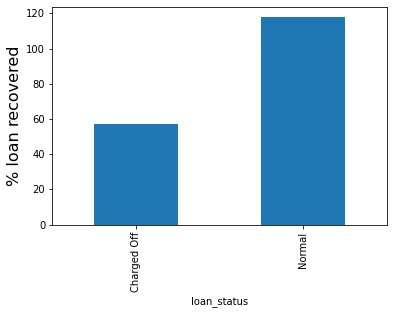

In [76]:
grouped_by_total_payment = df.groupby('loan_status').total_pymnt.sum()
grouped_by_loan_amount =  df.groupby('loan_status').loan_amnt.sum()
profit_loss_rec = ((grouped_by_total_payment/grouped_by_loan_amount)*100).round(2)
ax = profit_loss_rec.plot(kind="bar")
ax.set_ylabel('% loan recovered', fontsize=16)

In [77]:
profit_loss_rec

loan_status
Charged Off     56.92
Normal         117.68
dtype: float64

## So from above charts , only 57% of loans are recovered and out of fully recovered loans 17% is the profit from above plot

In [78]:
#So Max offender % bisuness can afford with out loss
print(profit_loss_rec) 
maxOffenderPerBusinessCanAfford = offenderPercentage + (offenderPercentage * (profit_loss_rec[1] - 100)/100)
maxOffenderPerBusinessCanAfford = maxOffenderPerBusinessCanAfford.round(2)
print("Max offenders business can afford {0}".format(maxOffenderPerBusinessCanAfford))

loan_status
Charged Off     56.92
Normal         117.68
dtype: float64
Max offenders business can afford 16.49


#### From Above its clear that business can afford 16.49% of offernders any variable which increases % of offenders would lead to loss of business

In [79]:
df.offender.describe()

count    39641.000000
mean         0.140133
std          0.347129
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: offender, dtype: float64

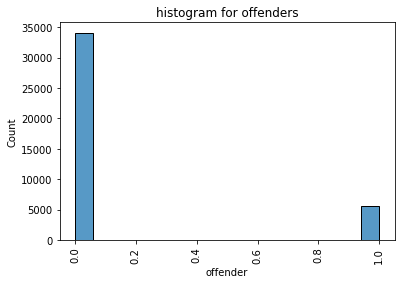

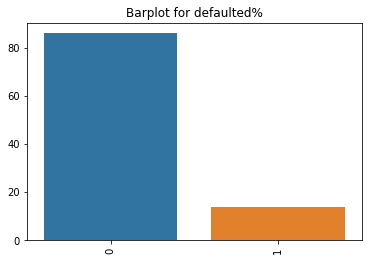

In [80]:

sns.histplot(df.offender) #hue -> TODO
plt.title("histogram for offenders")
plt.xticks(rotation=90)
plt.show()

OffenderPercentage=df[df.offender == True].offender.count()/df.offender.count()*100
NonOfferderPercentage=df[df.offender == False].offender.count()/df.offender.count()*100

sns.barplot(y = [OffenderPercentage,NonOfferderPercentage],orient="v",x=[1,0])
plt.title("Barplot for defaulted%")
plt.xticks(rotation=90)
plt.show()


######################################################################################### 
Name of col annual_inc


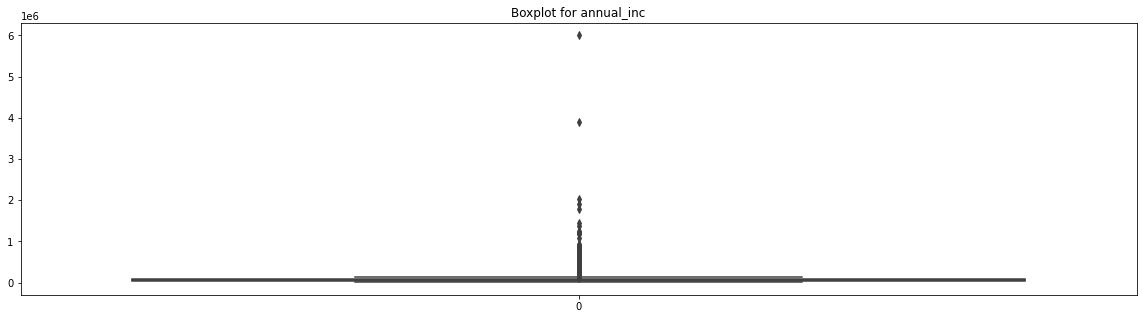

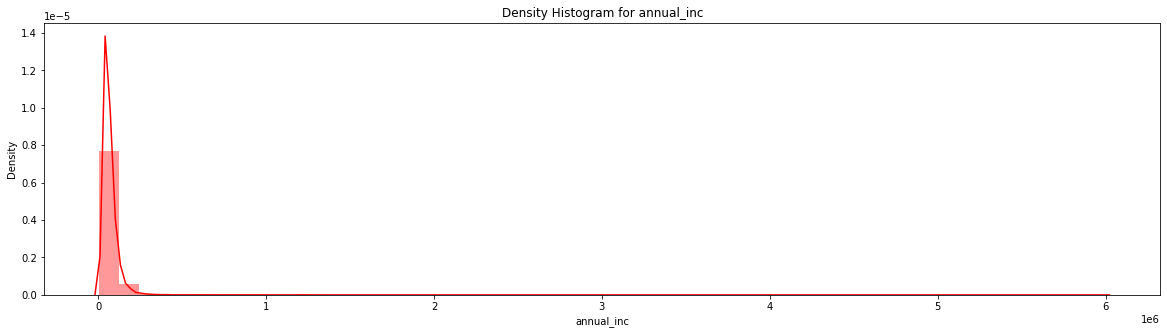

count    3.964100e+04
mean     6.900744e+04
std      6.383609e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.240000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


Now drop outliers from the col series and check the plots




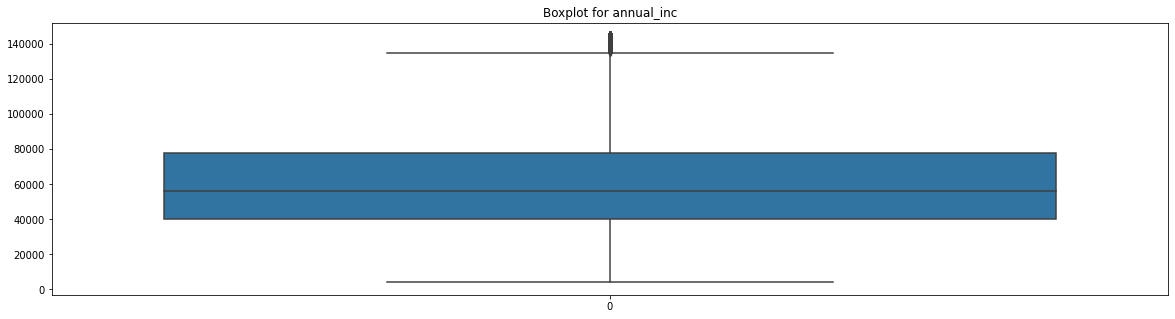

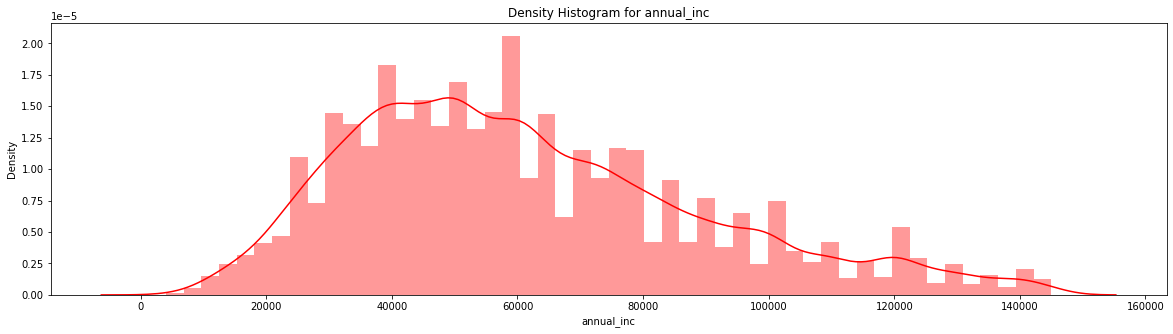

count     37798.000000
mean      61385.128805
std       28202.763649
min        4000.000000
25%       40000.000000
50%       56400.000000
75%       78000.000000
max      145008.000000
Name: annual_inc, dtype: float64
Borrowers Annual_inc ranges between 40500.0 and 82400.0

######################################################################################### 
######################################################################################### 
Name of col loan_amnt


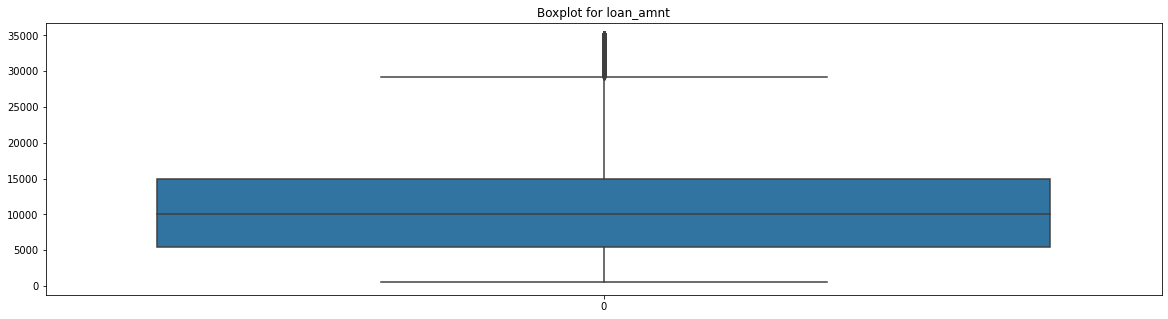

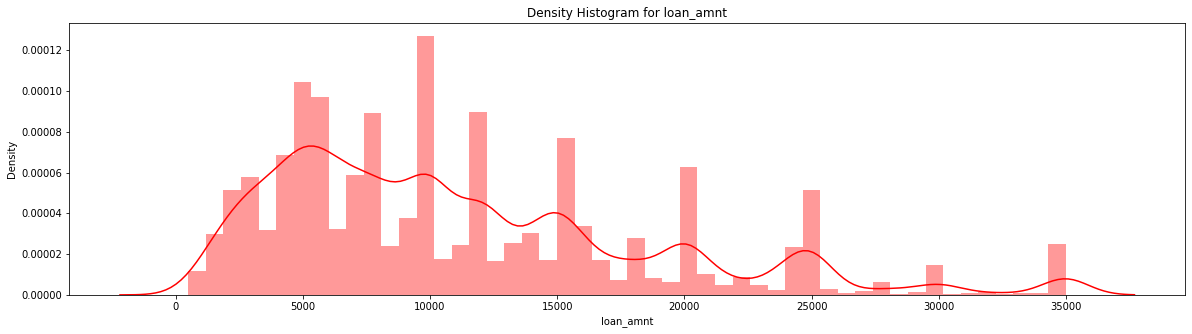

count    39641.000000
mean     11225.498852
std       7455.269125
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


Now drop outliers from the col series and check the plots




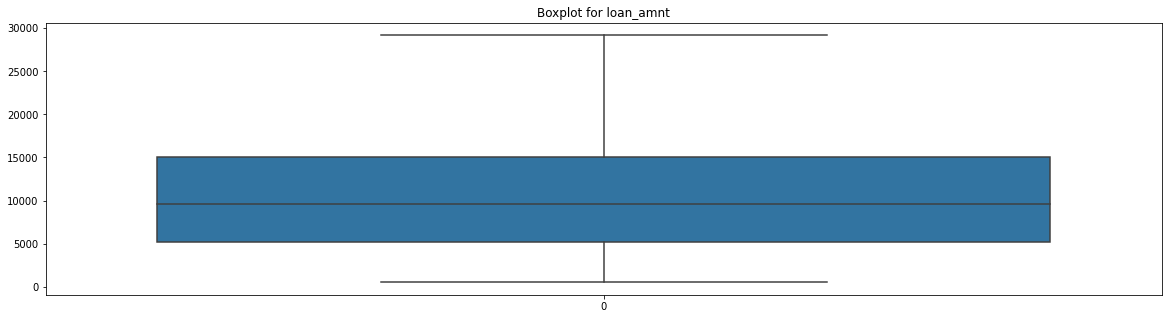

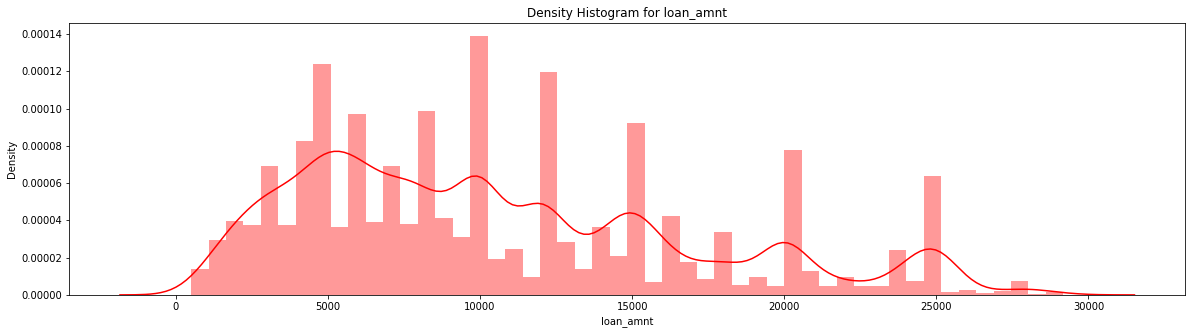

count    38413.000000
mean     10527.762737
std       6439.659873
min        500.000000
25%       5175.000000
50%       9600.000000
75%      15000.000000
max      29175.000000
Name: loan_amnt, dtype: float64
Borrowers Loan_amnt ranges between 5500.0 and 15000.0

######################################################################################### 
######################################################################################### 
Name of col installment


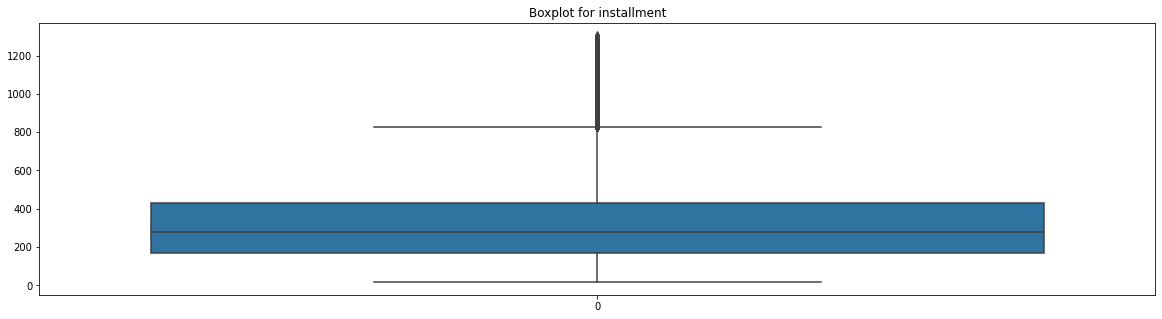

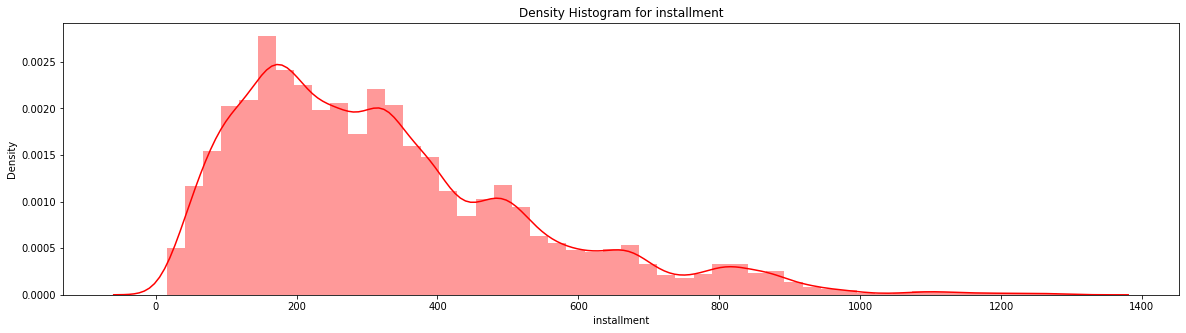

count    39641.000000
mean       324.710421
std        208.821132
min         15.690000
25%        167.080000
50%        280.530000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64


Now drop outliers from the col series and check the plots




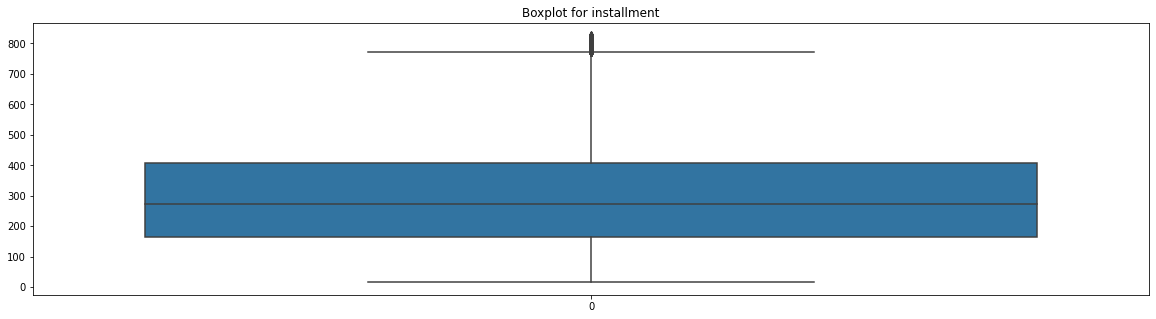

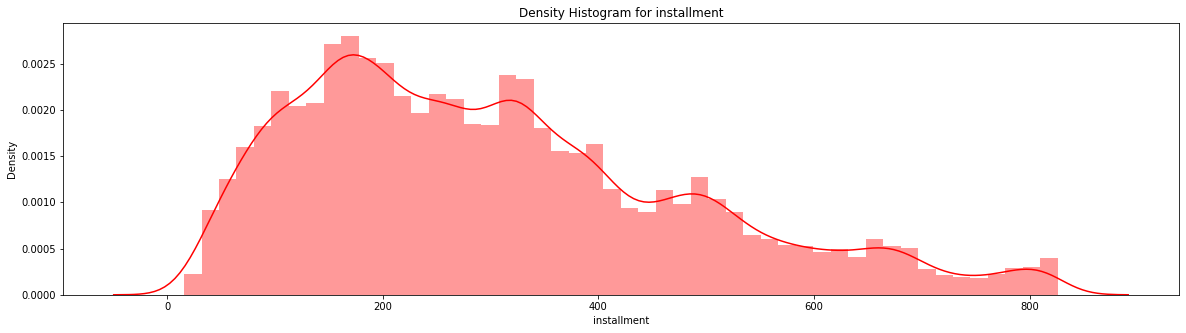

count    38398.000000
mean       305.041967
std        179.654936
min         15.690000
25%        164.510000
50%        273.000000
75%        407.170000
max        826.310000
Name: installment, dtype: float64
Borrowers Installment ranges between 167.08 and 430.78

######################################################################################### 
######################################################################################### 
Name of col int_rate


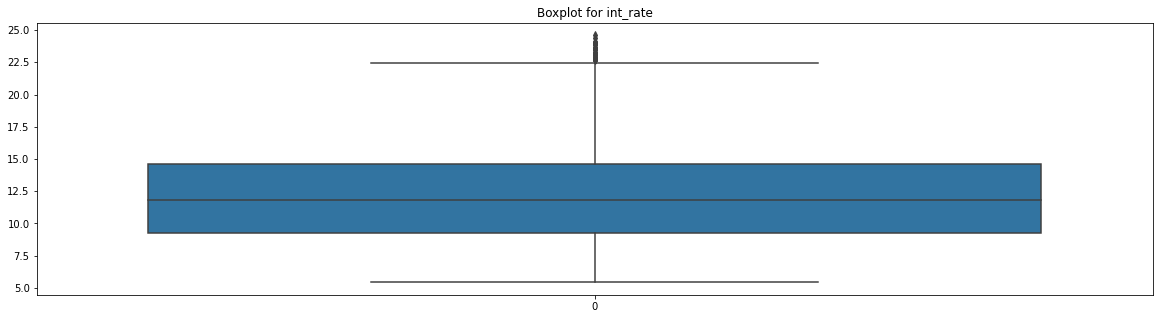

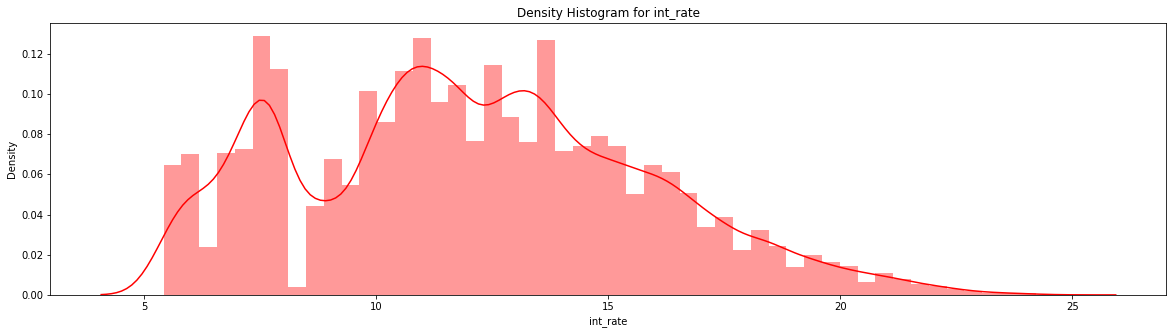

count    39641.000000
mean        12.017970
std          3.724742
min          5.420000
25%          9.250000
50%         11.830000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


Now drop outliers from the col series and check the plots




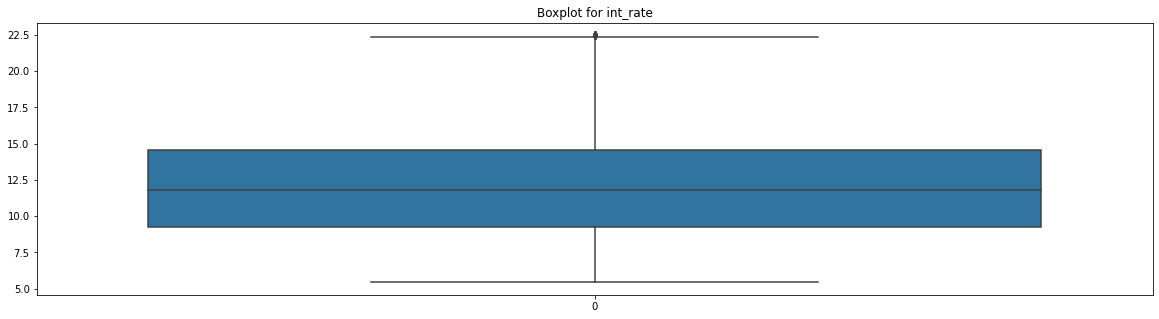

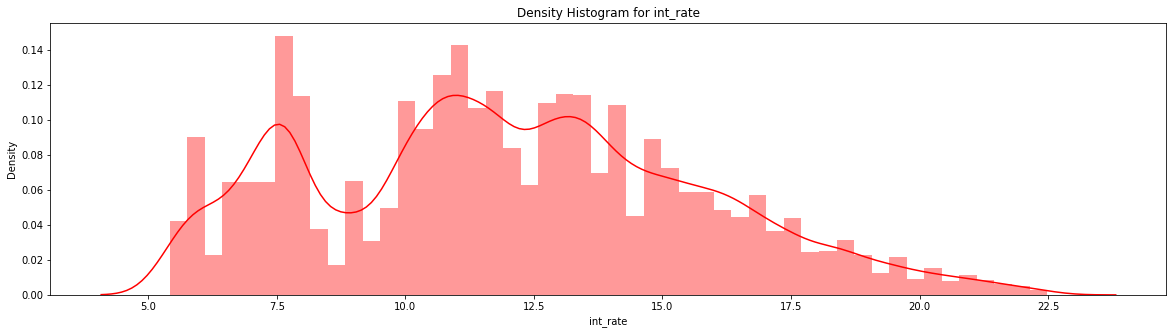

count    39563.000000
mean        11.995822
std          3.694765
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         22.480000
Name: int_rate, dtype: float64
Borrowers Int_rate ranges between 9.25 and 14.59

######################################################################################### 
######################################################################################### 
Name of col emp_length


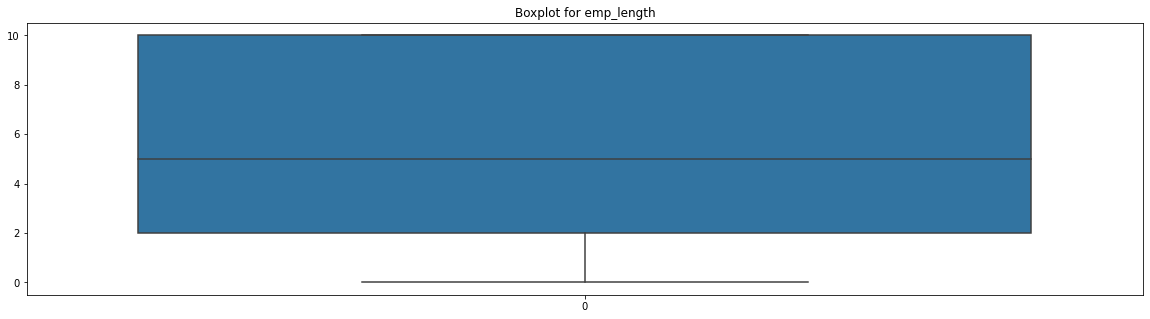

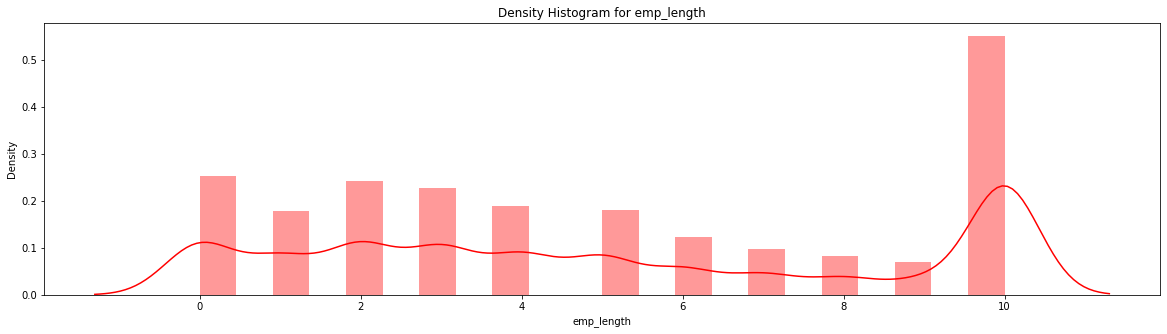

count    39641.000000
mean         5.110845
std          3.607492
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64


Now drop outliers from the col series and check the plots




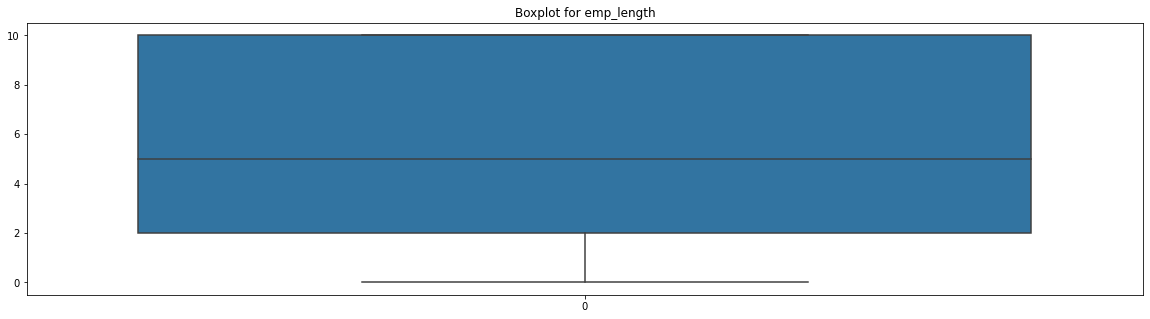

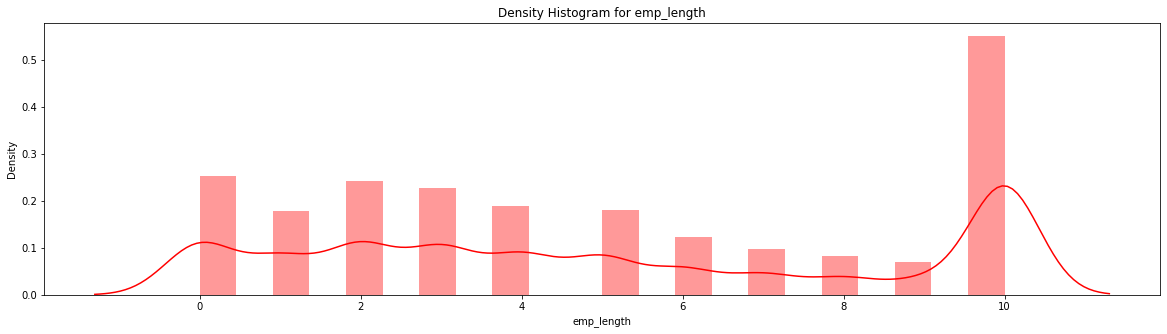

count    39641.000000
mean         5.110845
std          3.607492
min          0.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         10.000000
Name: emp_length, dtype: float64
Borrowers Emp_length ranges between 2.0 and 10.0

######################################################################################### 
######################################################################################### 
Name of col dti


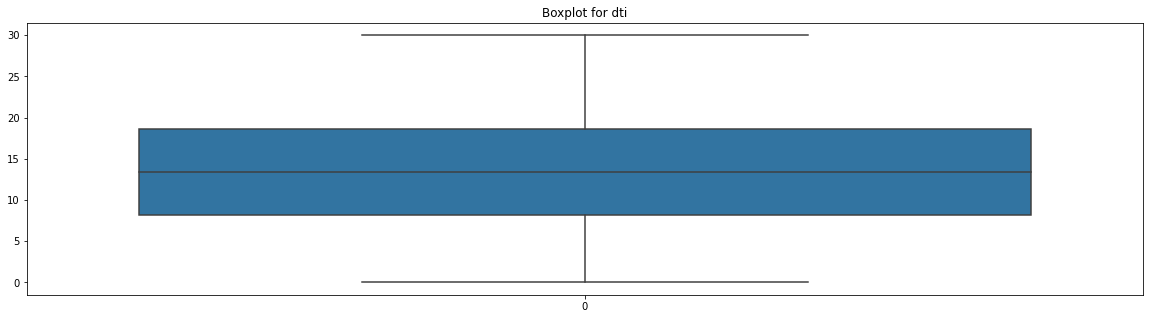

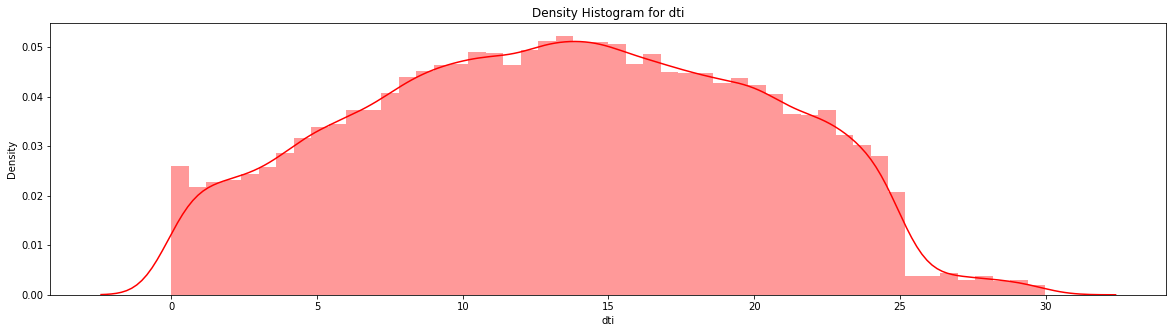

count    39641.000000
mean        13.317871
std          6.677430
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64


Now drop outliers from the col series and check the plots




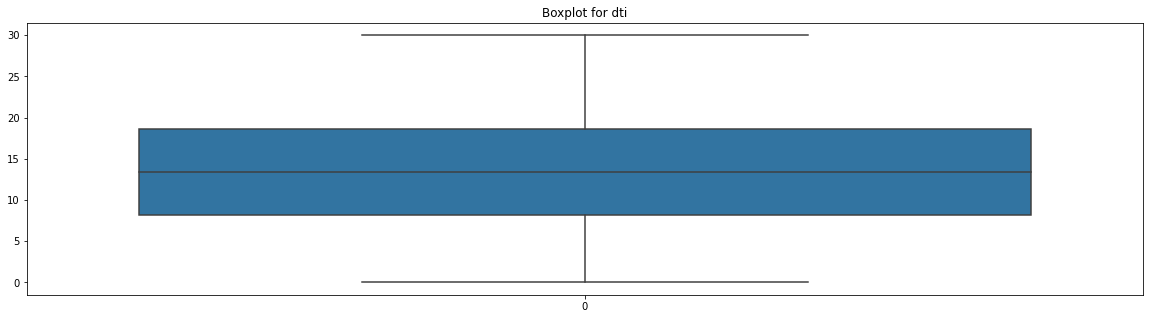

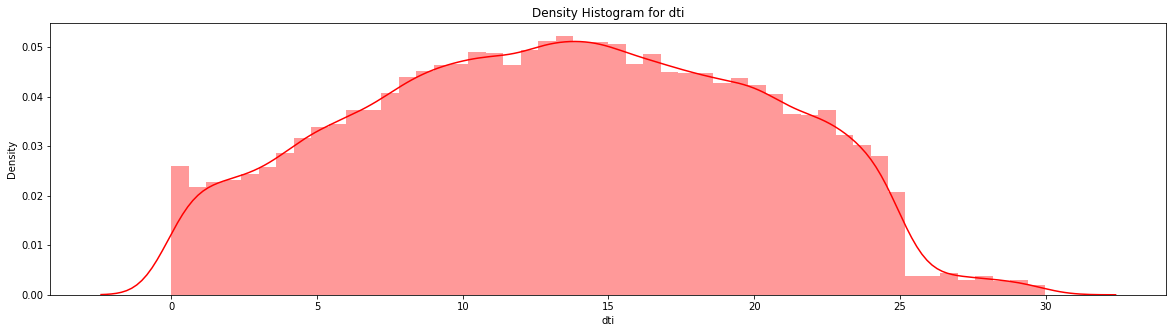

count    39641.000000
mean        13.317871
std          6.677430
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64
Borrowers Dti ranges between 8.18 and 18.6

######################################################################################### 
######################################################################################### 
Name of col inq_last_6mths


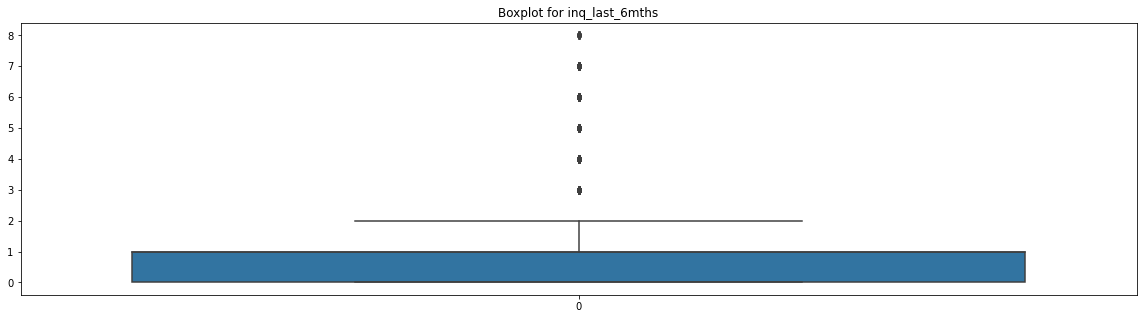

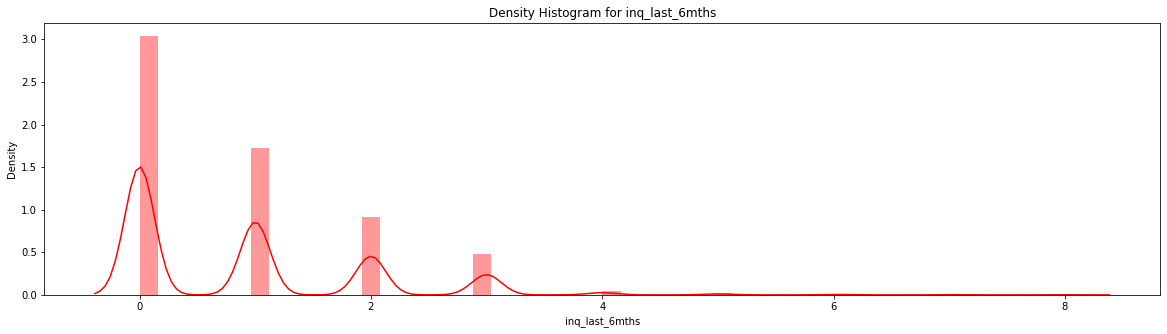

count    39641.000000
mean         0.868470
std          1.069792
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


Now drop outliers from the col series and check the plots




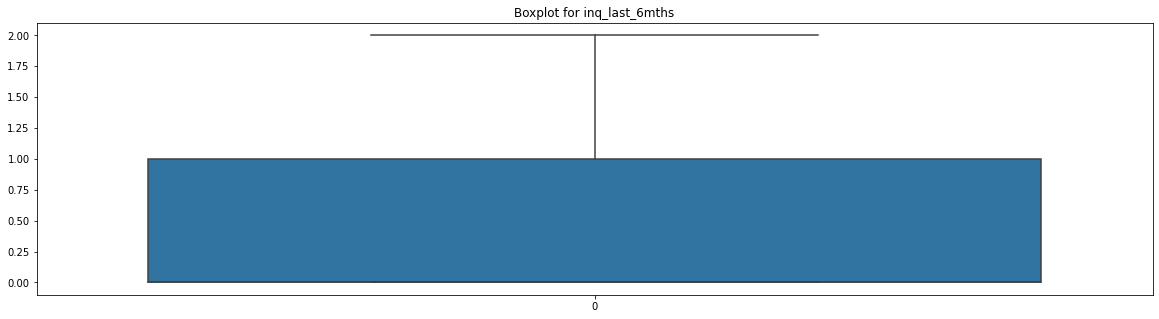

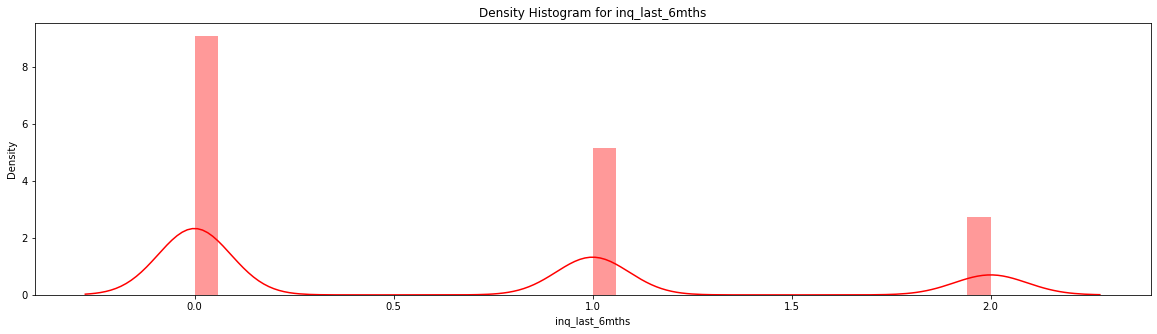

count    36024.000000
mean         0.626055
std          0.745781
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: inq_last_6mths, dtype: float64
Borrowers Inq_last_6mths ranges between 0.0 and 1.0

######################################################################################### 
######################################################################################### 
Name of col mths_since_last_delinq


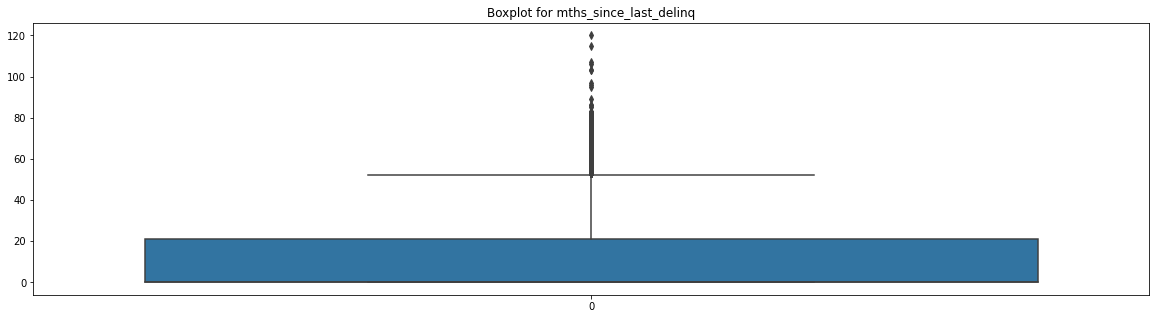

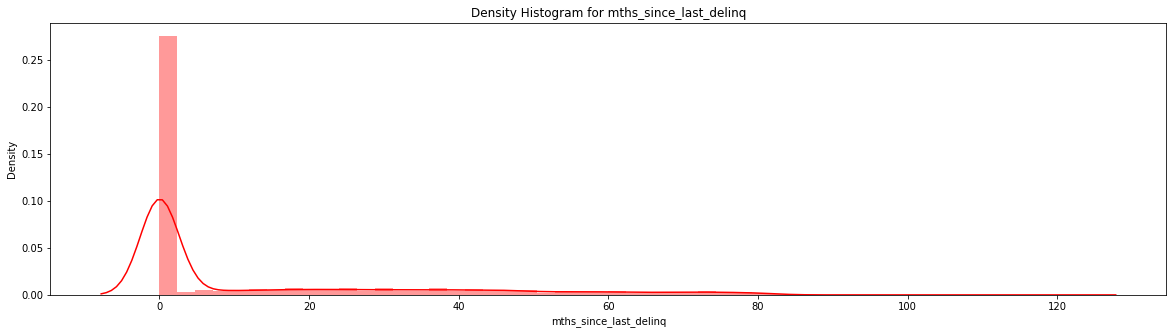

count    39641.000000
mean        12.691330
std         21.589147
min          0.000000
25%          0.000000
50%          0.000000
75%         21.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64


Now drop outliers from the col series and check the plots




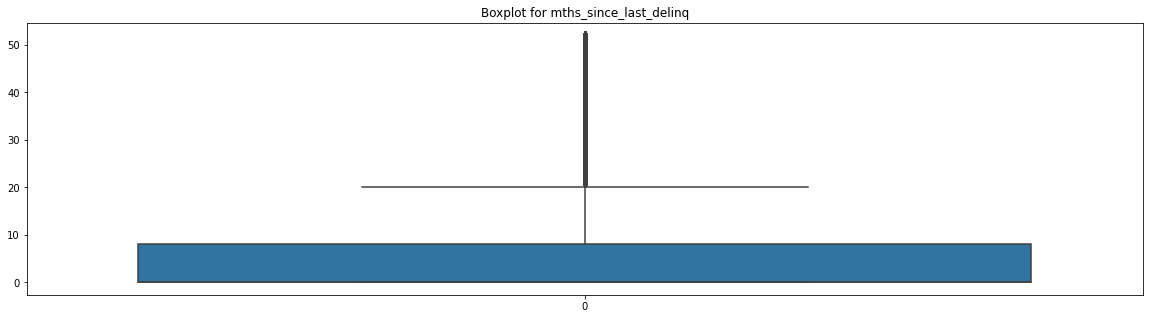

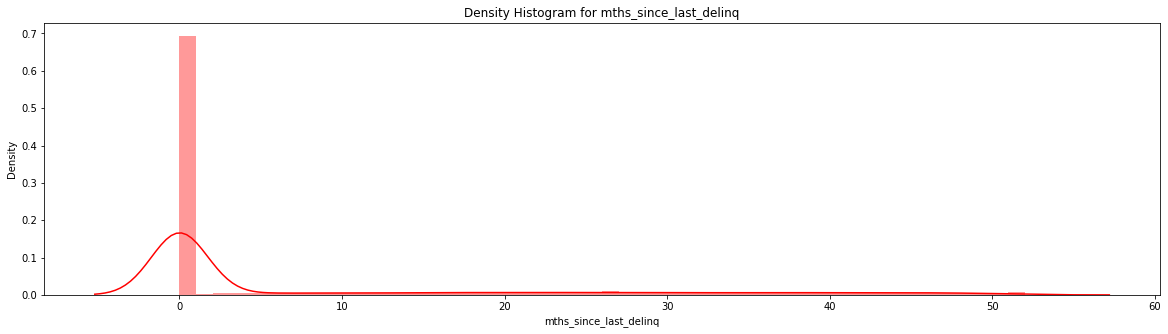

count    36212.000000
mean         7.580167
std         14.176250
min          0.000000
25%          0.000000
50%          0.000000
75%          8.000000
max         52.000000
Name: mths_since_last_delinq, dtype: float64
Borrowers Mths_since_last_delinq ranges between 0.0 and 21.0

######################################################################################### 
######################################################################################### 
Name of col open_acc


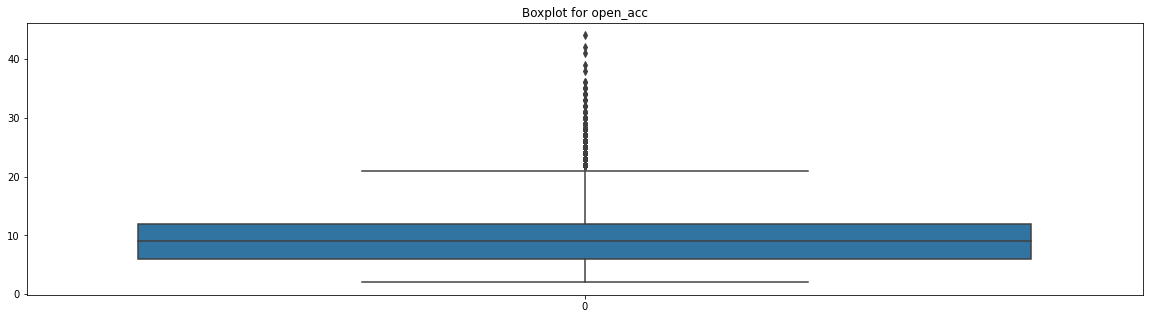

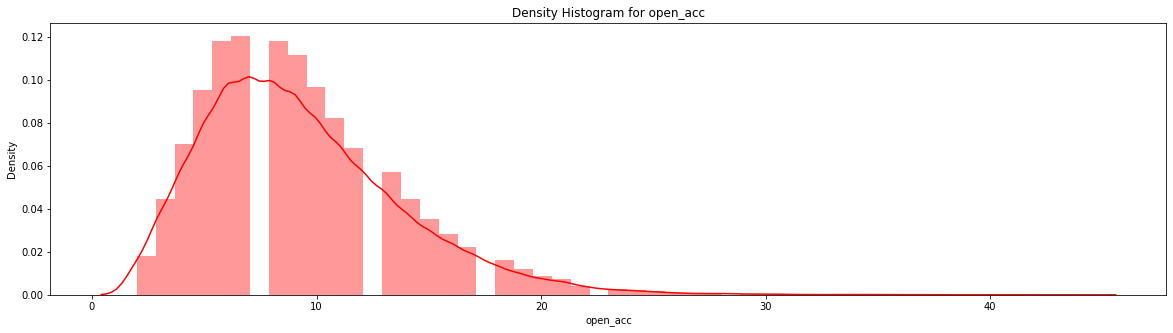

count    39641.000000
mean         9.298504
std          4.400626
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64


Now drop outliers from the col series and check the plots




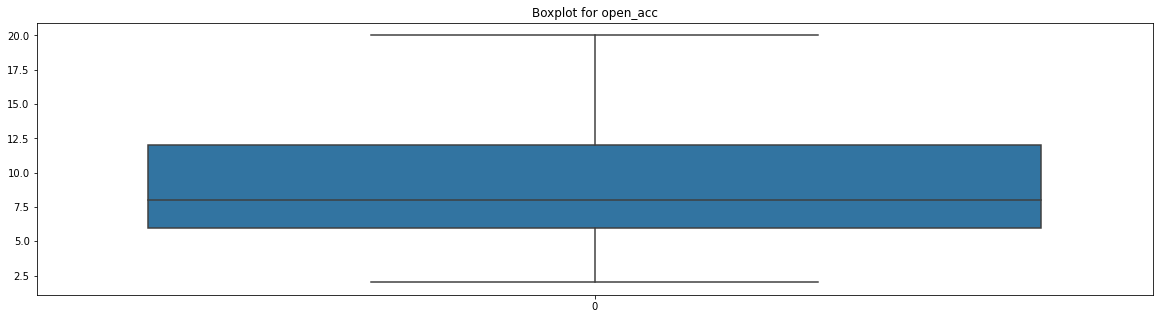

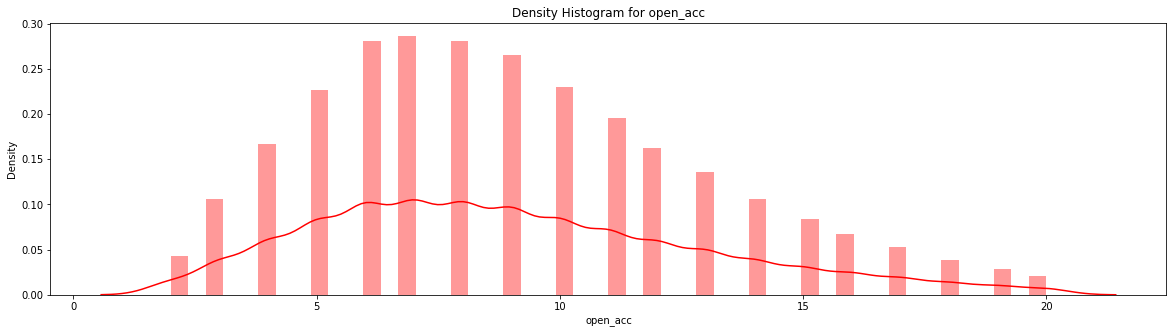

count    38883.000000
mean         9.021166
std          3.939213
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max         20.000000
Name: open_acc, dtype: float64
Borrowers Open_acc ranges between 6.0 and 12.0

######################################################################################### 
######################################################################################### 
Name of col revol_bal


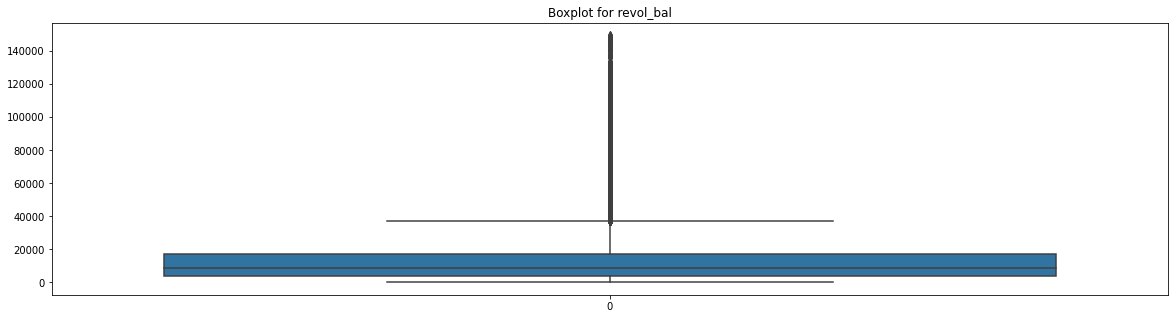

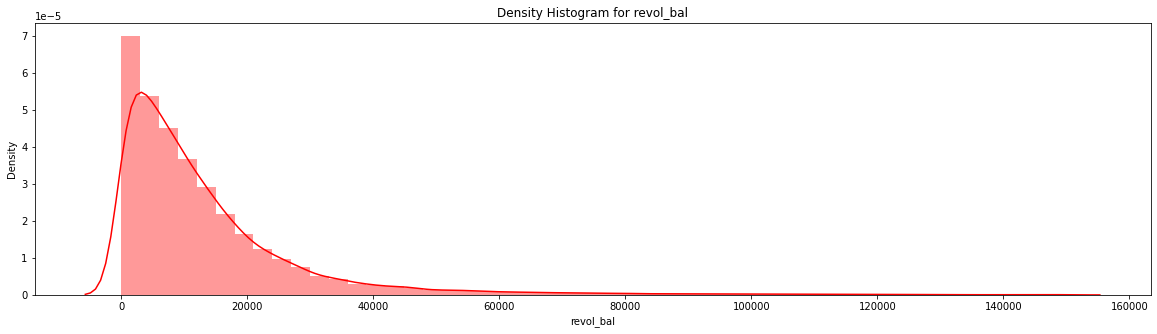

count     39641.000000
mean      13395.457758
std       15893.510254
min           0.000000
25%        3710.000000
50%        8860.000000
75%       17072.000000
max      149588.000000
Name: revol_bal, dtype: float64


Now drop outliers from the col series and check the plots




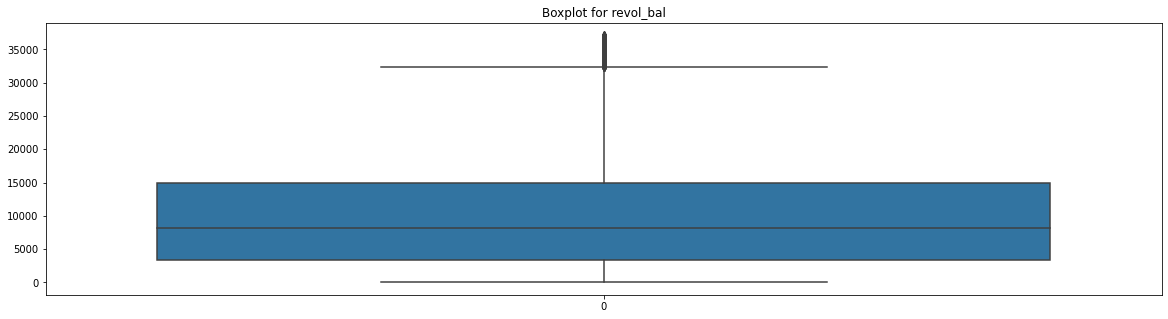

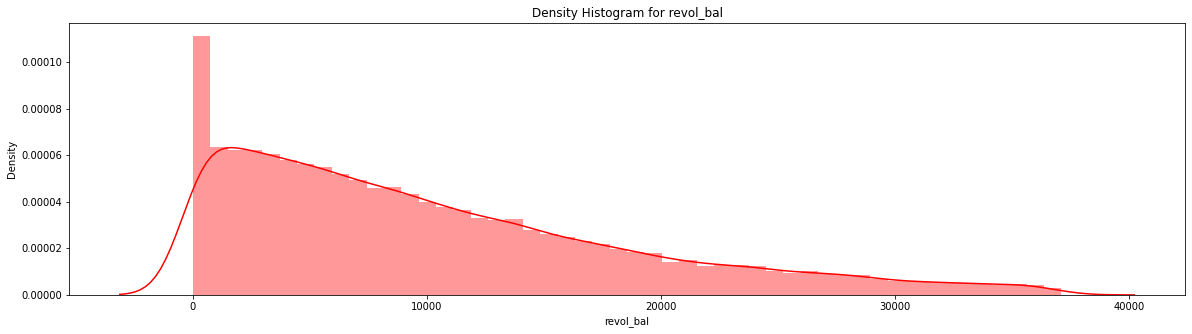

count    37148.000000
mean     10237.928852
std       8526.850290
min          0.000000
25%       3415.000000
50%       8132.000000
75%      14992.000000
max      37101.000000
Name: revol_bal, dtype: float64
Borrowers Revol_bal ranges between 3710.0 and 17072.0

######################################################################################### 
######################################################################################### 
Name of col total_acc


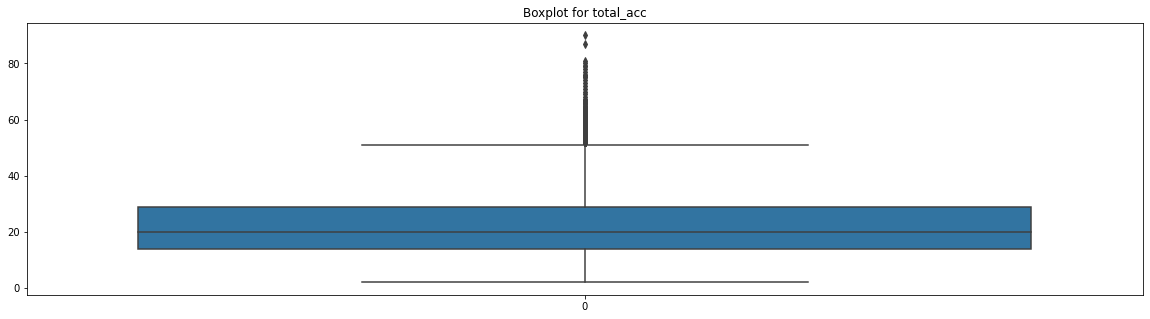

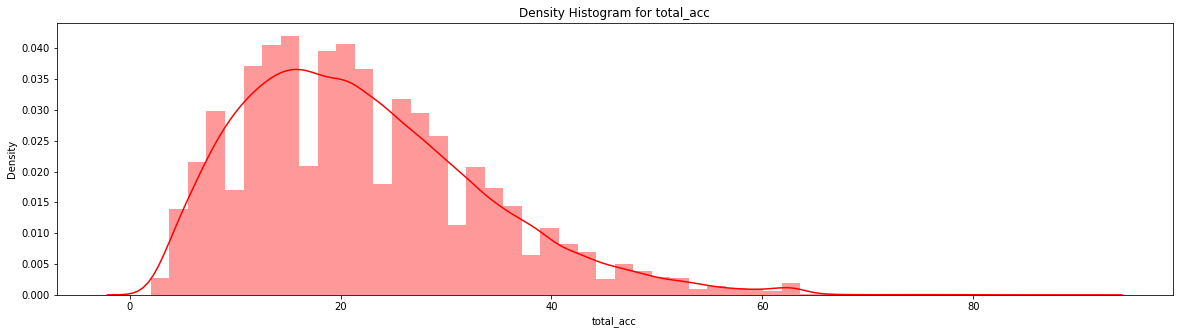

count    39641.000000
mean        22.100981
std         11.400897
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


Now drop outliers from the col series and check the plots




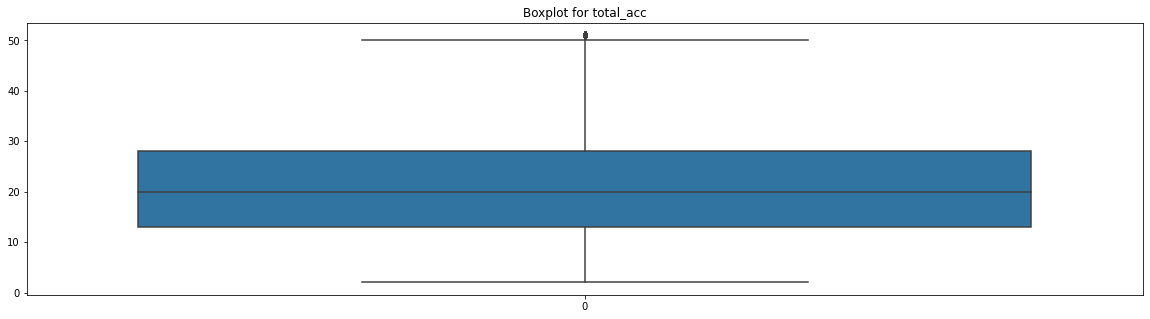

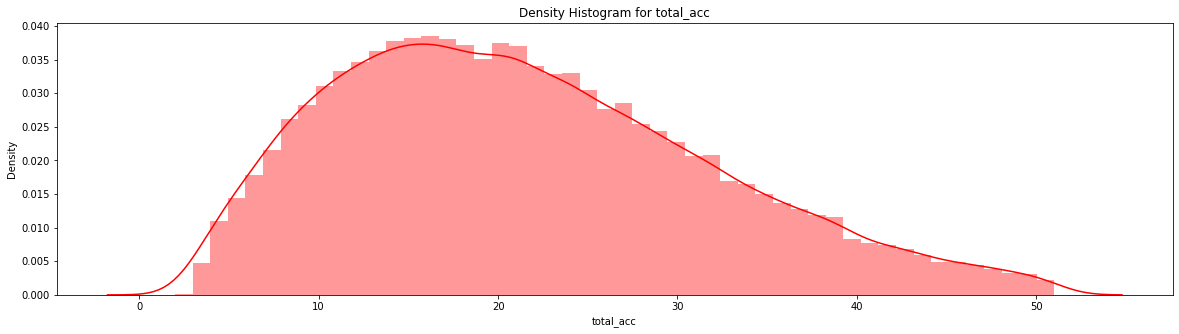

count    38929.000000
mean        21.452156
std         10.413182
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         51.000000
Name: total_acc, dtype: float64
Borrowers Total_acc ranges between 14.0 and 29.0

######################################################################################### 
######################################################################################### 
Name of col total_pymnt


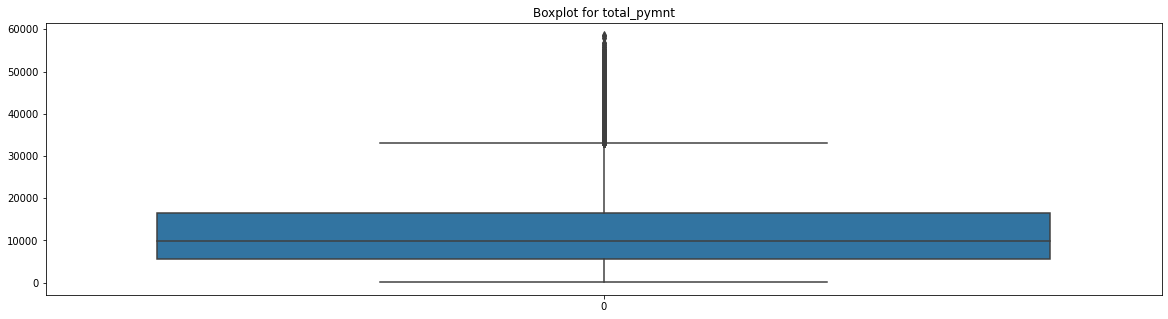

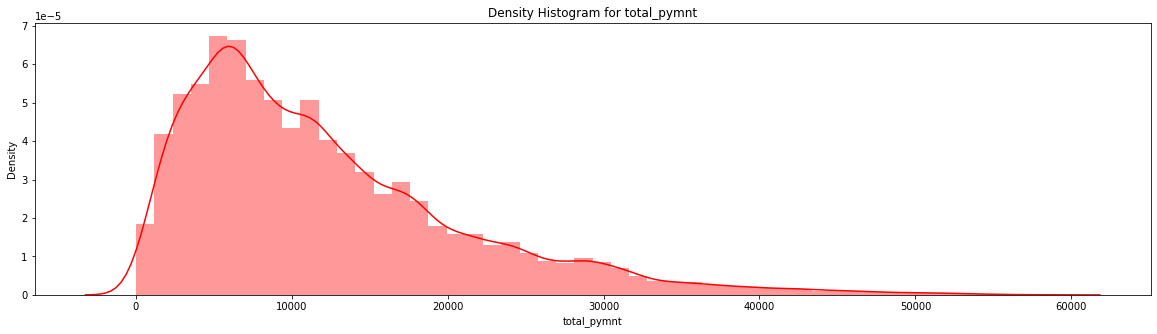

count    39641.000000
mean     12175.197630
std       9036.764922
min         33.730000
25%       5594.008440
50%       9928.752197
75%      16553.741870
max      58563.679930
Name: total_pymnt, dtype: float64


Now drop outliers from the col series and check the plots




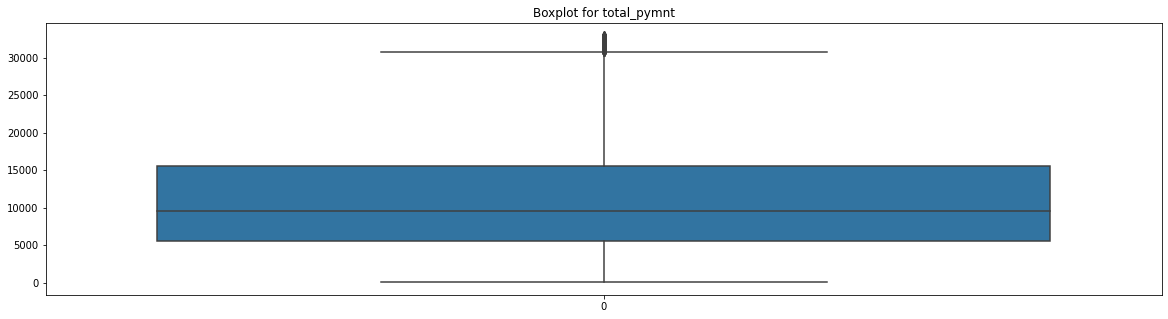

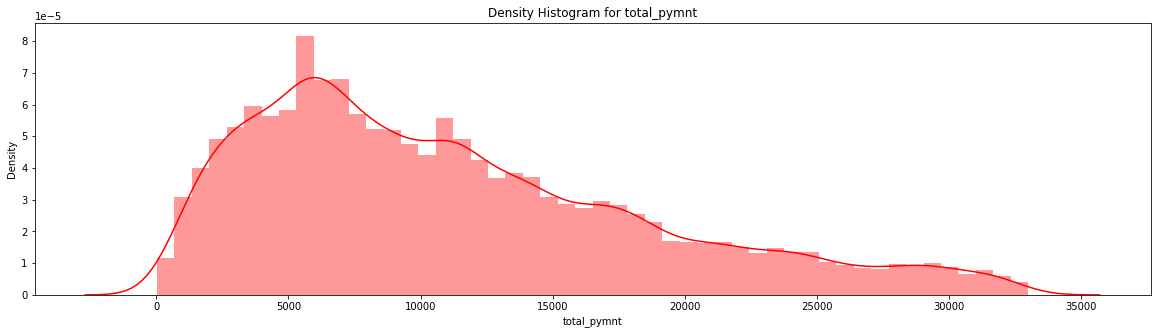

count    38311.000000
mean     11211.581499
std       7468.691101
min         33.730000
25%       5496.713512
50%       9536.300000
75%      15612.720250
max      32981.380000
Name: total_pymnt, dtype: float64
Borrowers Total_pymnt ranges between 5594.00844 and 16553.74187

######################################################################################### 
######################################################################################### 
Name of col total_pymnt_inv


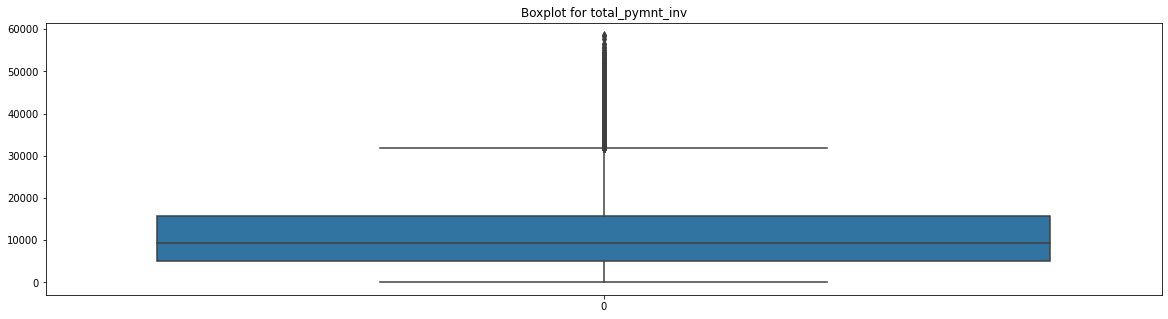

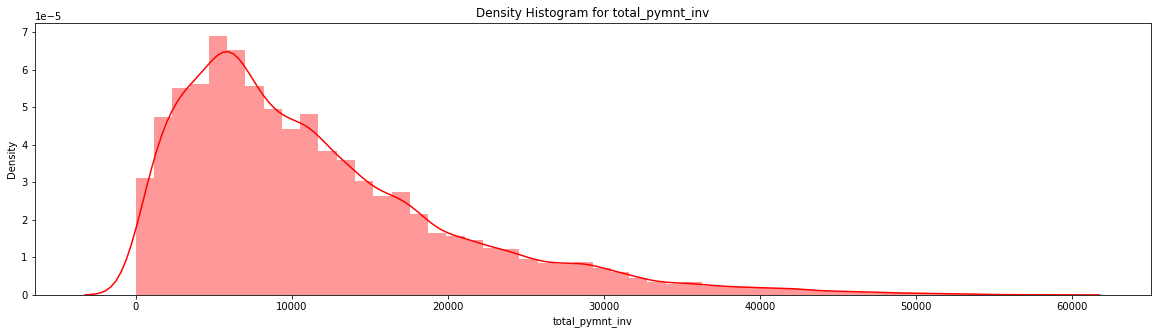

count    39641.000000
mean     11588.084286
std       8938.174184
min          0.000000
25%       5138.680000
50%       9307.780000
75%      15815.910000
max      58563.680000
Name: total_pymnt_inv, dtype: float64


Now drop outliers from the col series and check the plots




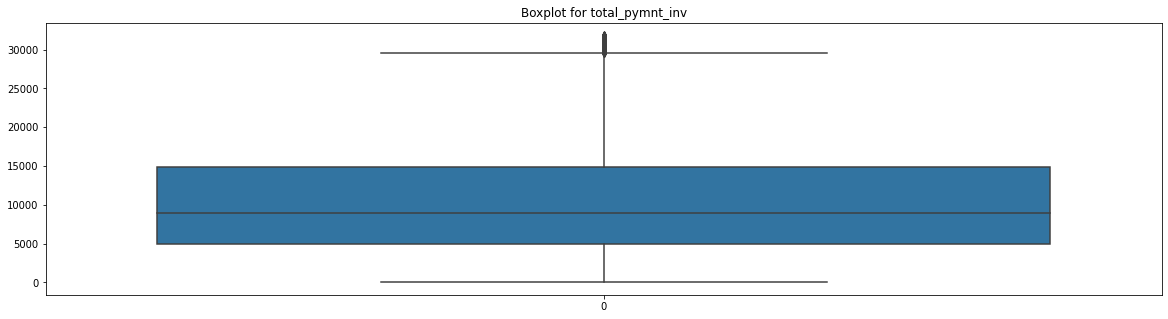

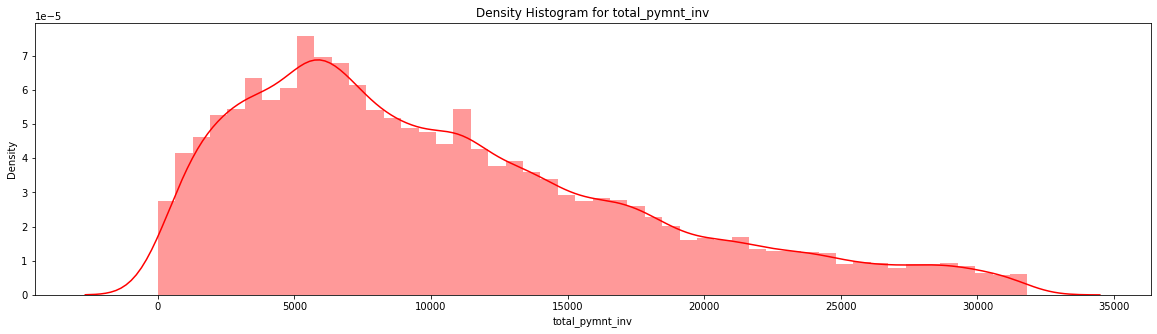

count    38200.000000
mean     10569.071424
std       7295.106964
min          0.000000
25%       4989.305000
50%       8925.395000
75%      14830.130000
max      31827.920000
Name: total_pymnt_inv, dtype: float64
Borrowers Total_pymnt_inv ranges between 5138.68 and 15815.91

######################################################################################### 
######################################################################################### 
Name of col total_rec_prncp


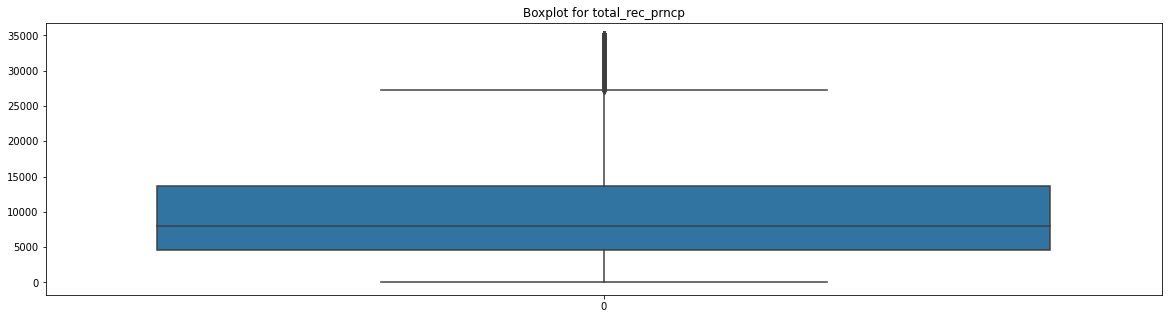

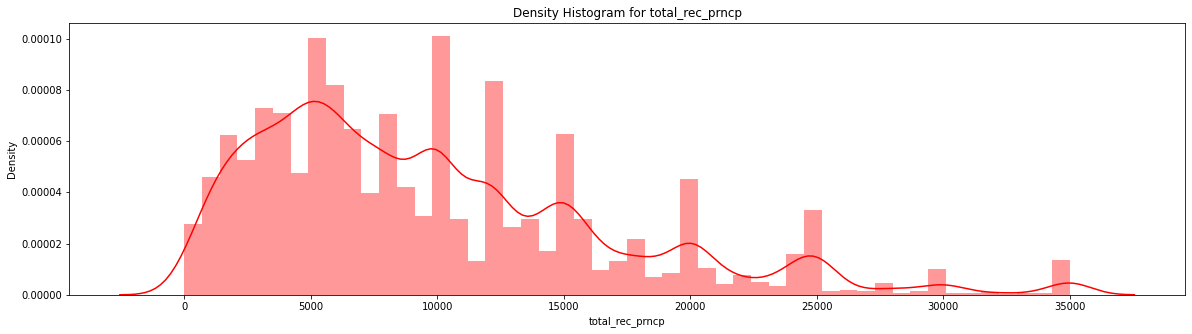

count    39641.000000
mean      9811.611243
std       7059.733824
min          0.000000
25%       4648.890000
50%       8000.000000
75%      13703.960000
max      35000.020000
Name: total_rec_prncp, dtype: float64


Now drop outliers from the col series and check the plots




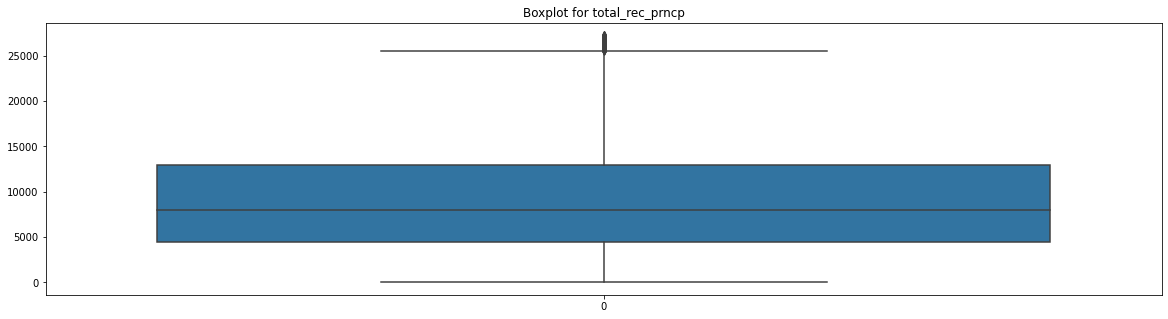

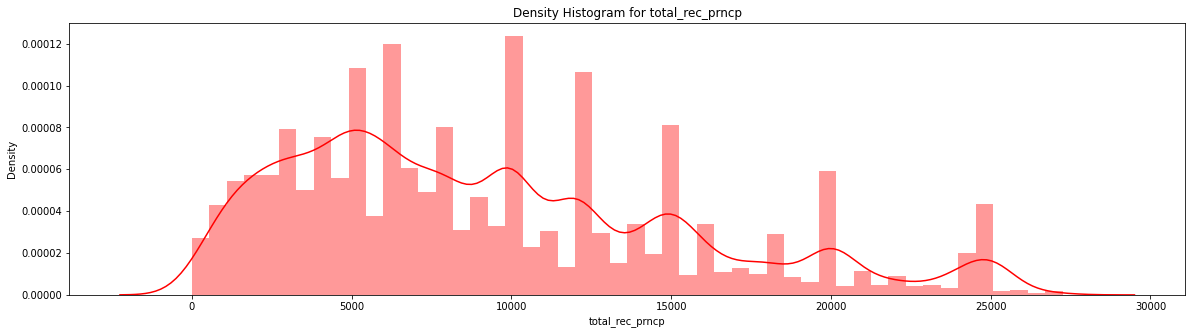

count    38672.000000
mean      9259.401108
std       6198.230760
min          0.000000
25%       4500.000000
50%       8000.000000
75%      12925.397500
max      27250.000000
Name: total_rec_prncp, dtype: float64
Borrowers Total_rec_prncp ranges between 4648.89 and 13703.96

######################################################################################### 
######################################################################################### 
Name of col total_rec_int


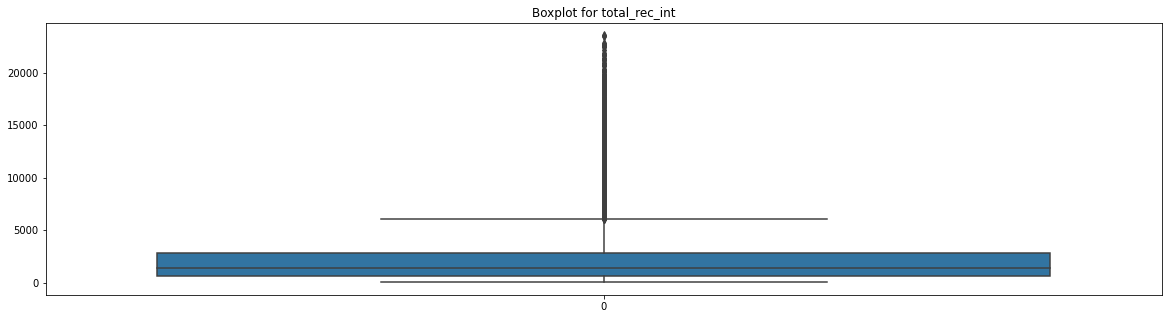

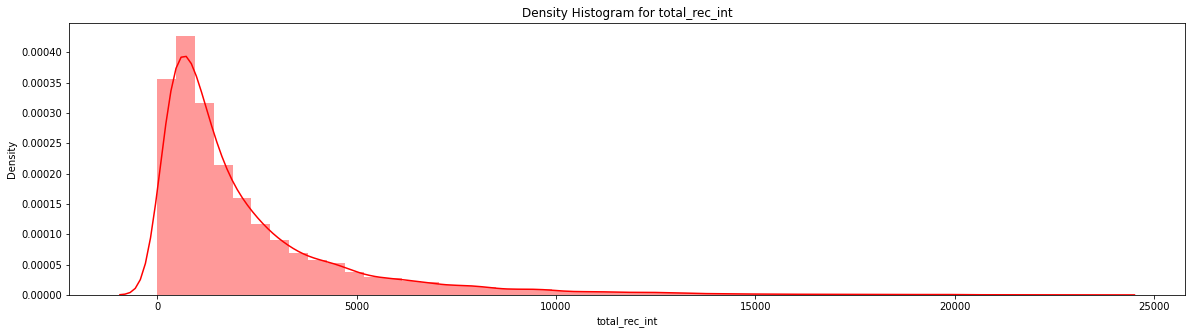

count    39641.000000
mean      2267.925724
std       2608.779836
min          6.220000
25%        665.160000
50%       1353.290000
75%       2838.130000
max      23563.680000
Name: total_rec_int, dtype: float64


Now drop outliers from the col series and check the plots




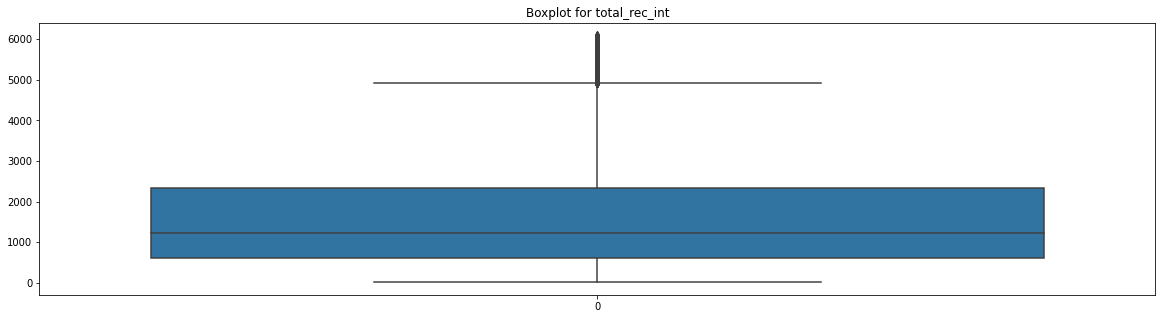

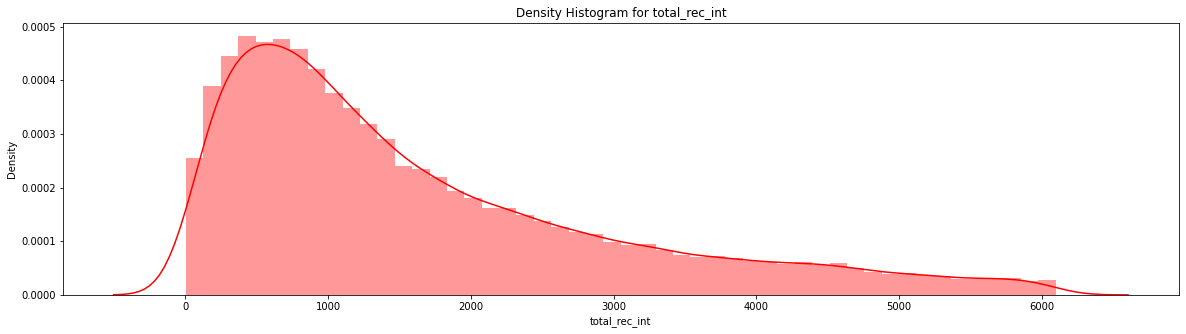

count    36487.000000
mean      1660.631051
std       1383.226722
min          6.220000
25%        617.710000
50%       1215.540000
75%       2336.215000
max       6095.860000
Name: total_rec_int, dtype: float64
Borrowers Total_rec_int ranges between 665.16 and 2838.13

######################################################################################### 


In [81]:
file = open("Univariate_Analysis.txt", "w")

#Invoke the function for all col in num_variables:
for num in num_variables:
    print("######################################################################################### ")
    print(f"Name of col {num}")
    create_boxplot_and_distplot(num)
    
    print("\n\nNow drop outliers from the col series and check the plots\n\n")
    
    df_new,q1,q3 = drop_outliers_from_series(num)
    
    
    file.write(f"Borrowers {num.capitalize()} ranges between {q1} and {q3}\n")

    create_boxplot_and_distplot(num, df_new)
    
    print(f"Borrowers {num.capitalize()} ranges between {q1} and {q3}\n")
    print("######################################################################################### ")

file.close()

<p>&nbsp;</p><p><strong><span style="color: #0000ff;">/***************************** END UNI VARIATE ANALYSIS ********************************/</span></strong></p>

<p>&nbsp;</p>
<h2><span style="color: #0000ff;"><strong>Bivariate Analysis, without and with removal of outliers</strong></span></h2>

In [82]:

# for num_col in num_variables:
#     chart_with_and_without_outliers(col_1, num_col, data=df):


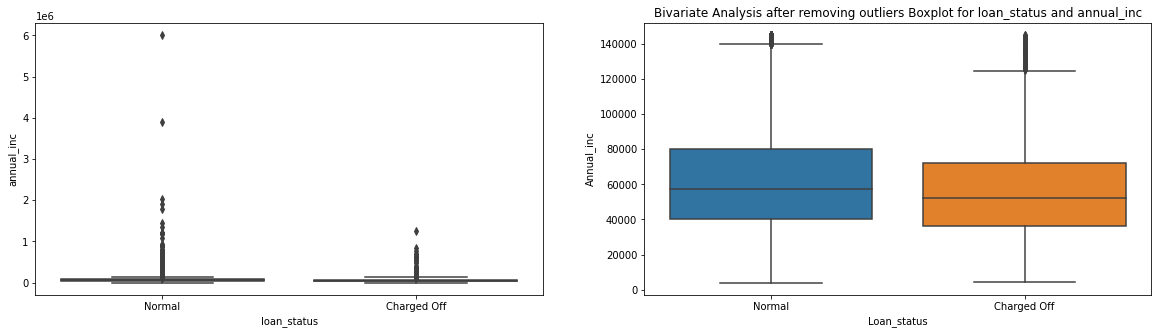

######################################################################################### 
Quantile details for Charged Off Borrower's has annual_inc ranging between Q1 = 36502.0 and Q3 = 72000.0

Quantile details for all Borrower's with annual_inc ranging between Q1 = 40500.0 and Q3 = 82400.0



In [83]:
file = open("Bivariate_Analysis.txt", "w")
file.close()

chart_with_and_without_outliers('loan_status', 'annual_inc')


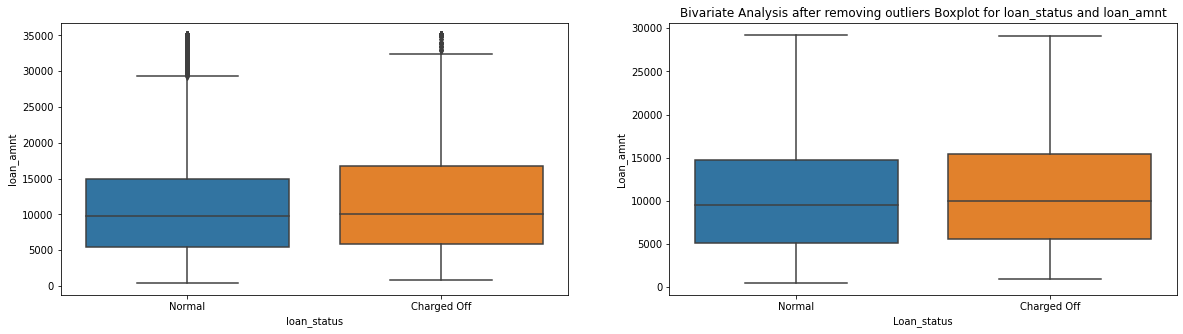

######################################################################################### 
Quantile details for Charged Off Borrower's has loan_amnt ranging between Q1 = 5500.0 and Q3 = 15400.0

Quantile details for all Borrower's with loan_amnt ranging between Q1 = 5500.0 and Q3 = 15000.0



In [84]:
# sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# plt.show()
chart_with_and_without_outliers('loan_status', 'loan_amnt')


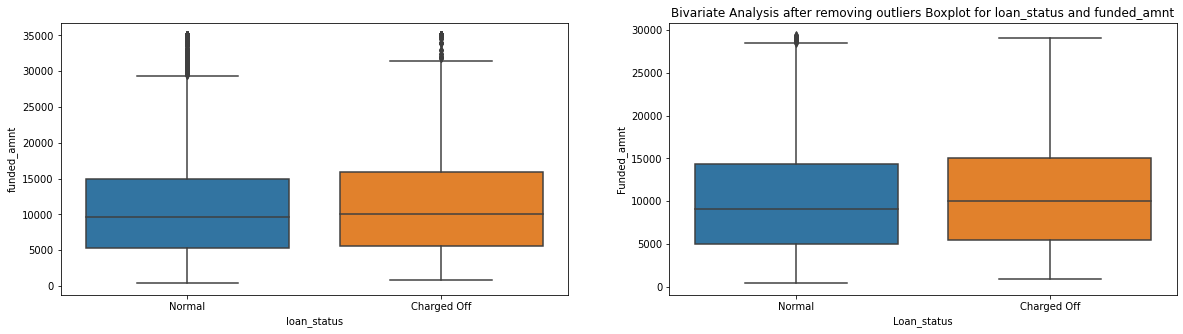

######################################################################################### 
Quantile details for Charged Off Borrower's has funded_amnt ranging between Q1 = 5425.0 and Q3 = 15000.0

Quantile details for all Borrower's with funded_amnt ranging between Q1 = 5400.0 and Q3 = 15000.0



In [85]:
# sns.boxplot(x='loan_status',y='funded_amnt',data=df)
# plt.show()
chart_with_and_without_outliers('loan_status', 'funded_amnt')



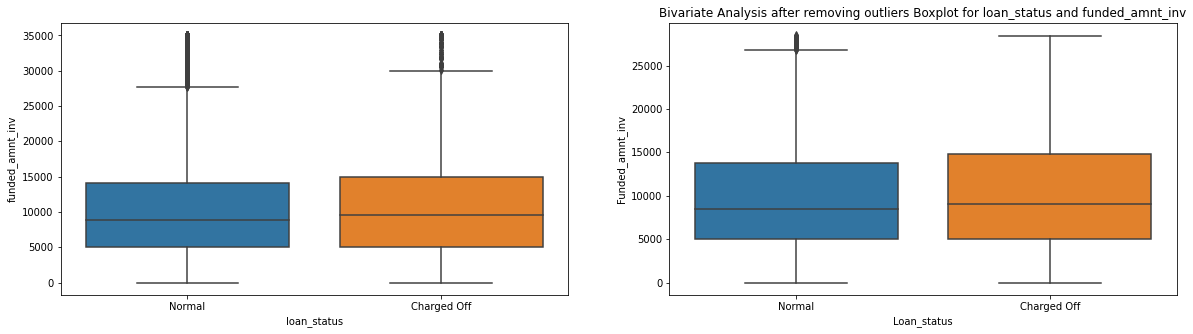

######################################################################################### 
Quantile details for Charged Off Borrower's has funded_amnt_inv ranging between Q1 = 4994.492297 and Q3 = 14839.3938

Quantile details for all Borrower's with funded_amnt_inv ranging between Q1 = 5000.0 and Q3 = 14400.0



In [86]:
chart_with_and_without_outliers('loan_status', 'funded_amnt_inv')



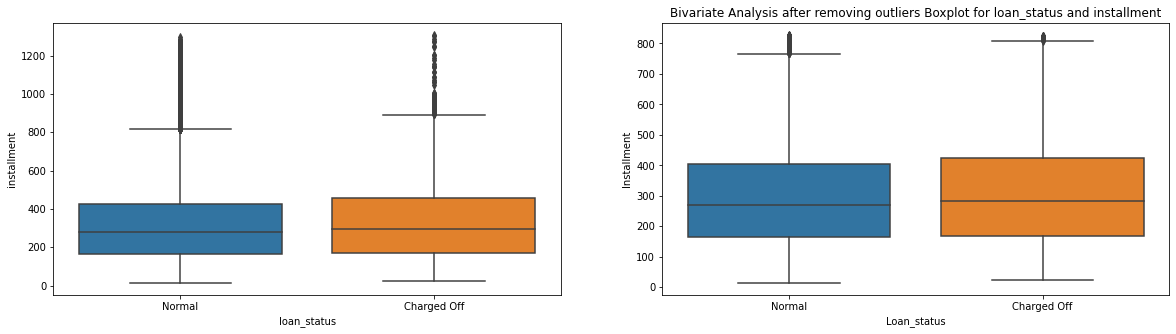

######################################################################################### 
Quantile details for Charged Off Borrower's has installment ranging between Q1 = 167.06 and Q3 = 423.78

Quantile details for all Borrower's with installment ranging between Q1 = 167.08 and Q3 = 430.78



In [87]:
chart_with_and_without_outliers('loan_status', 'installment')

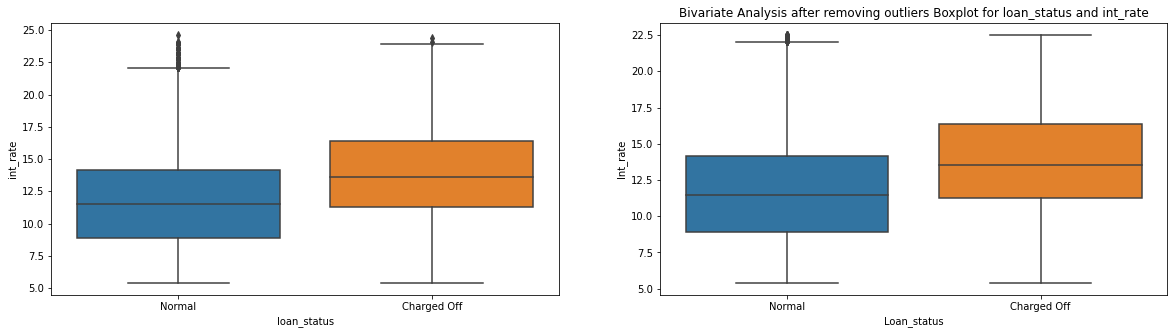

######################################################################################### 
Quantile details for Charged Off Borrower's has int_rate ranging between Q1 = 11.26 and Q3 = 16.4

Quantile details for all Borrower's with int_rate ranging between Q1 = 9.25 and Q3 = 14.59



In [88]:
chart_with_and_without_outliers('loan_status', 'int_rate')


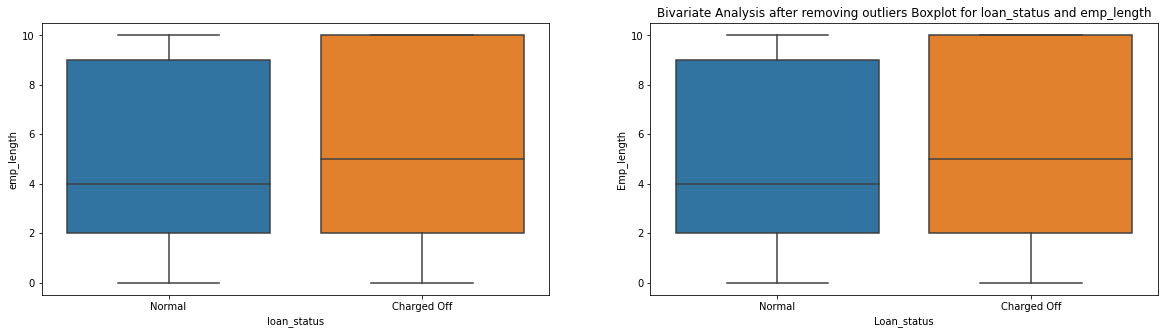

######################################################################################### 
Quantile details for Charged Off Borrower's has emp_length ranging between Q1 = 2.0 and Q3 = 10.0

Quantile details for all Borrower's with emp_length ranging between Q1 = 2.0 and Q3 = 10.0



In [89]:
chart_with_and_without_outliers('loan_status', 'emp_length')



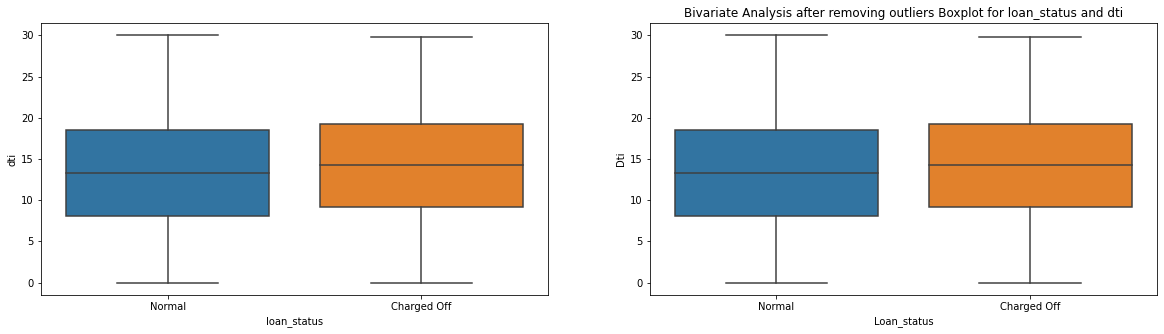

######################################################################################### 
Quantile details for Charged Off Borrower's has dti ranging between Q1 = 9.13 and Q3 = 19.295

Quantile details for all Borrower's with dti ranging between Q1 = 8.18 and Q3 = 18.6



In [90]:
chart_with_and_without_outliers('loan_status', 'dti')

mths_since_last_delinq
0.0      26074
15.0       252
30.0       247
23.0       246
24.0       241
         ...  
89.0         1
107.0        1
85.0         1
97.0         1
95.0         1
Name: count, Length: 95, dtype: int64


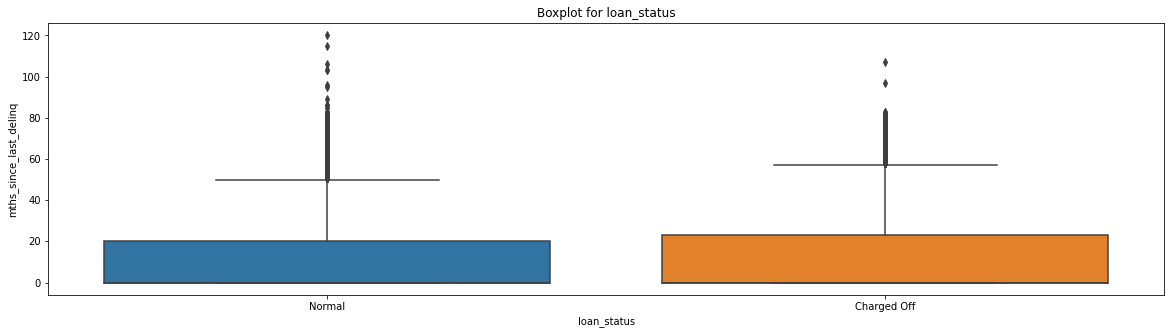

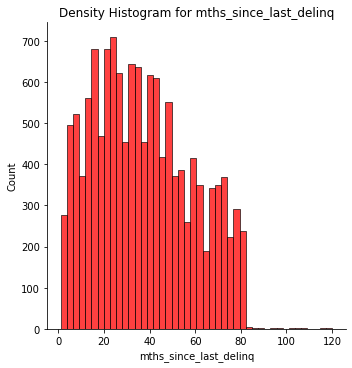

In [91]:
print(df.mths_since_last_delinq.value_counts())
temp_df = df[df.mths_since_last_delinq > 0]
temp_df.mths_since_last_delinq.describe()
create_boxplot_and_distplot_bivariate('loan_status', 'mths_since_last_delinq', temp_df)


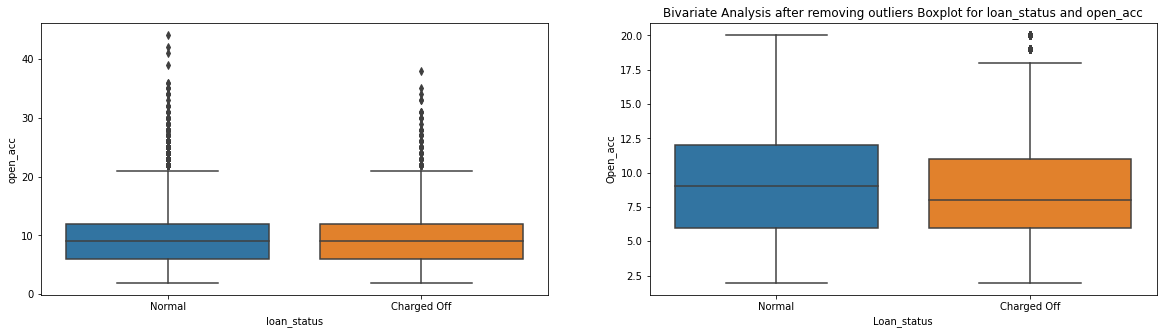

######################################################################################### 
Quantile details for Charged Off Borrower's has open_acc ranging between Q1 = 6.0 and Q3 = 11.0

Quantile details for all Borrower's with open_acc ranging between Q1 = 6.0 and Q3 = 12.0



In [92]:
chart_with_and_without_outliers('loan_status', 'open_acc')


In [93]:
df.revol_bal.describe().T

count     39641.000000
mean      13395.457758
std       15893.510254
min           0.000000
25%        3710.000000
50%        8860.000000
75%       17072.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [94]:
#chart_with_and_without_outliers('loan_status', 'revol_bal')


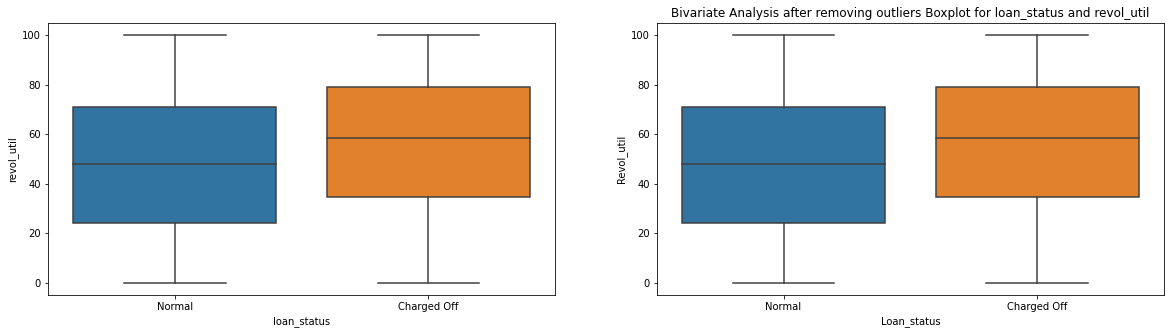

######################################################################################### 
Quantile details for Charged Off Borrower's has revol_util ranging between Q1 = 34.4 and Q3 = 79.0

Quantile details for all Borrower's with revol_util ranging between Q1 = 25.3 and Q3 = 72.3



In [95]:
chart_with_and_without_outliers('loan_status', 'revol_util')

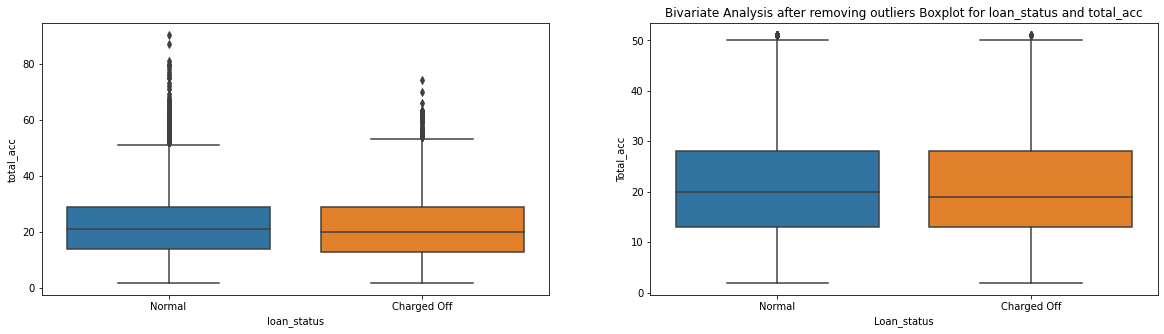

######################################################################################### 
Quantile details for Charged Off Borrower's has total_acc ranging between Q1 = 13.0 and Q3 = 28.0

Quantile details for all Borrower's with total_acc ranging between Q1 = 14.0 and Q3 = 29.0



In [96]:
chart_with_and_without_outliers('loan_status', 'total_acc')

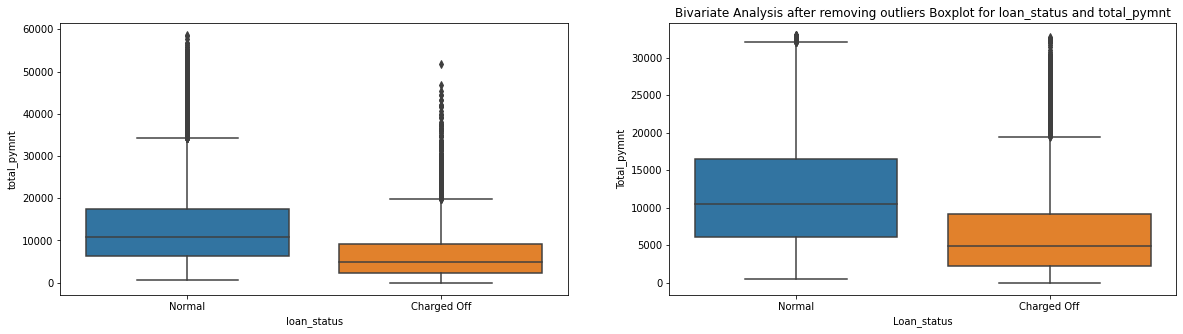

######################################################################################### 
Quantile details for Charged Off Borrower's has total_pymnt ranging between Q1 = 2271.96 and Q3 = 9158.715

Quantile details for all Borrower's with total_pymnt ranging between Q1 = 5594.00844 and Q3 = 16553.74187



In [97]:

chart_with_and_without_outliers('loan_status', 'total_pymnt')

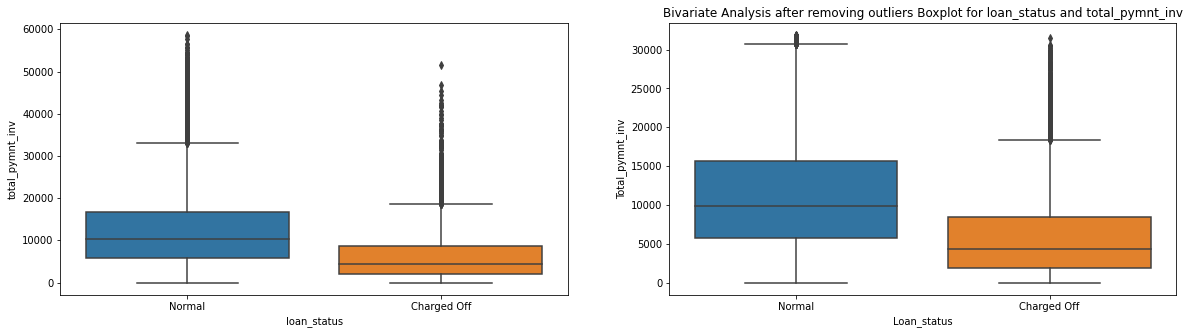

######################################################################################### 
Quantile details for Charged Off Borrower's has total_pymnt_inv ranging between Q1 = 1914.7975000000001 and Q3 = 8485.97

Quantile details for all Borrower's with total_pymnt_inv ranging between Q1 = 5138.68 and Q3 = 15815.91



In [98]:
chart_with_and_without_outliers('loan_status', 'total_pymnt_inv')

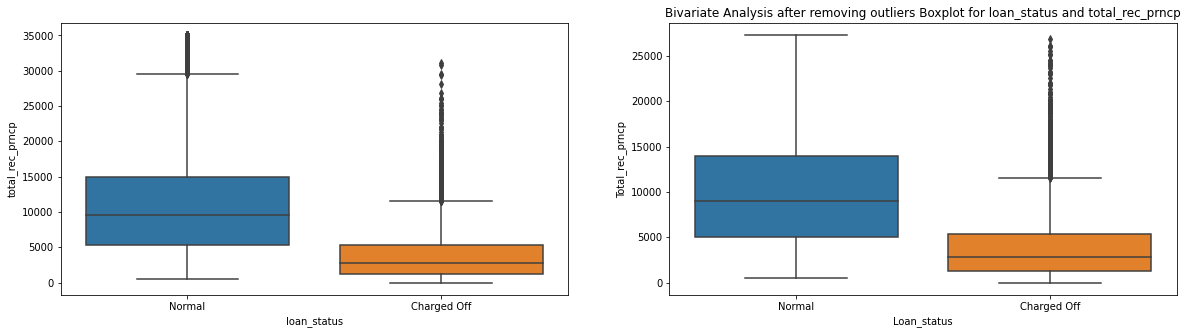

######################################################################################### 
Quantile details for Charged Off Borrower's has total_rec_prncp ranging between Q1 = 1250.315 and Q3 = 5375.99

Quantile details for all Borrower's with total_rec_prncp ranging between Q1 = 4648.89 and Q3 = 13703.96



In [99]:
chart_with_and_without_outliers('loan_status', 'total_rec_prncp')

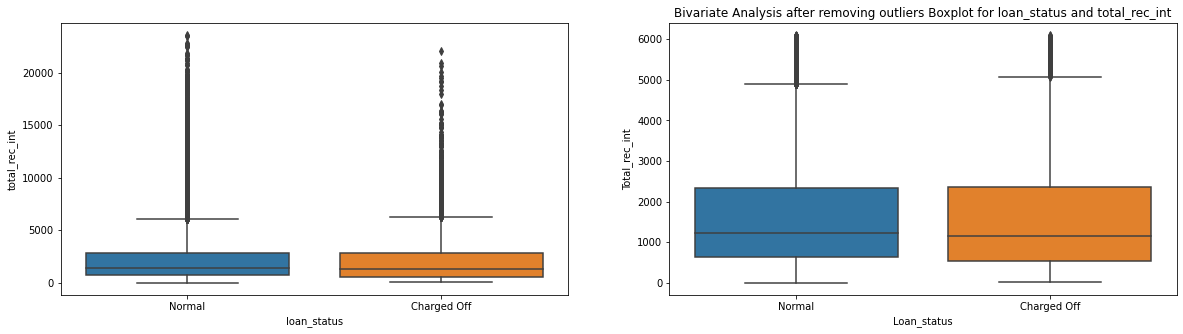

######################################################################################### 
Quantile details for Charged Off Borrower's has total_rec_int ranging between Q1 = 534.63 and Q3 = 2352.955

Quantile details for all Borrower's with total_rec_int ranging between Q1 = 665.16 and Q3 = 2838.13



In [100]:
chart_with_and_without_outliers('loan_status', 'total_rec_int')

In [101]:
#chart_with_and_without_outliers('loan_status', 'issue_d_month')

<h2><span style="color: #0000ff;">Multivariate Analysis for categorical variables numerical variables</span></h2>

In [102]:
# file = open("Multivariate_Analysis.txt", "w")

# def create_categorical_boxplot(cat, num):
    
#     new_df_num,q1,q3  = drop_outliers_from_series(num)   
#     new_df_num = new_df_num[new_df_num.loan_status != "Current"]

    
#     charged_off = new_df_num[new_df_num.loan_status == "Charged Off"]
    
    
#     charged_off_describe = charged_off[num].describe()
#     q1_charged_off = charged_off_describe["25%"]
#     q3_charged_off = charged_off_describe["75%"]
   
    
#     file.write(f"Charged Off Borrower's {cat} and {num} range between range {q1_charged_off} and {q3_charged_off}\n")
    

# #     print(f"Quantile details for {cat} and {num} are Q1 = {q1} and Q3 = {q3}\n")
# #     print("######################################################################################### ")    
#     file.write(f"Borrower's {cat} and {num} range between {q1} and {q3}\n")
#     print(    new_df_num.home_ownership.value_counts())

# for col in cat_variables:
#     for num in num_variables:
#         create_categorical_boxplot(col, num)
# file.close()


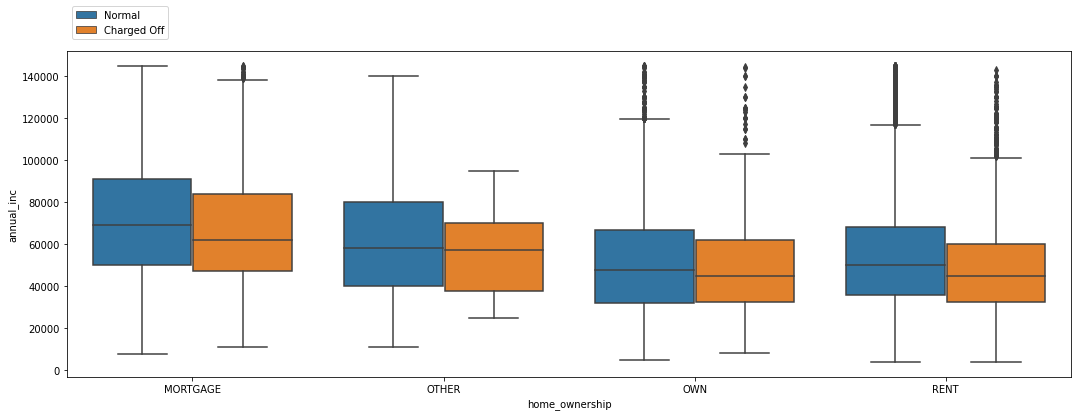

Charged Off Borrower's with home_ownership as RENT have annual_inc ranges between 32400.0 and 60225.0

Charged Off Borrower's with home_ownership as MORTGAGE have annual_inc ranges between 47508.0 and 84000.0

Charged Off Borrower's with home_ownership as OWN have annual_inc ranges between 32500.0 and 62250.0

Charged Off Borrower's with home_ownership as OTHER have annual_inc ranges between 37800.0 and 70000.0



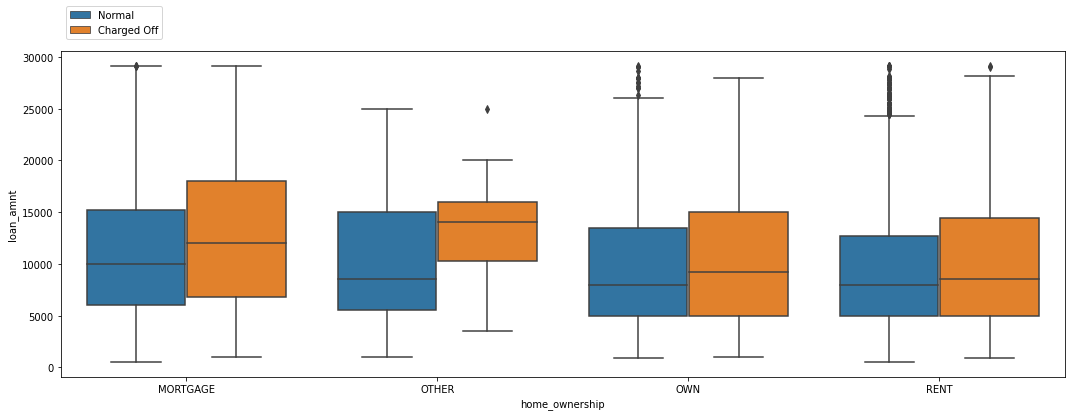

Charged Off Borrower's with home_ownership as RENT have loan_amnt ranges between 5000.0 and 14400.0

Charged Off Borrower's with home_ownership as MORTGAGE have loan_amnt ranges between 6800.0 and 18000.0

Charged Off Borrower's with home_ownership as OWN have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with home_ownership as OTHER have loan_amnt ranges between 10300.0 and 16000.0



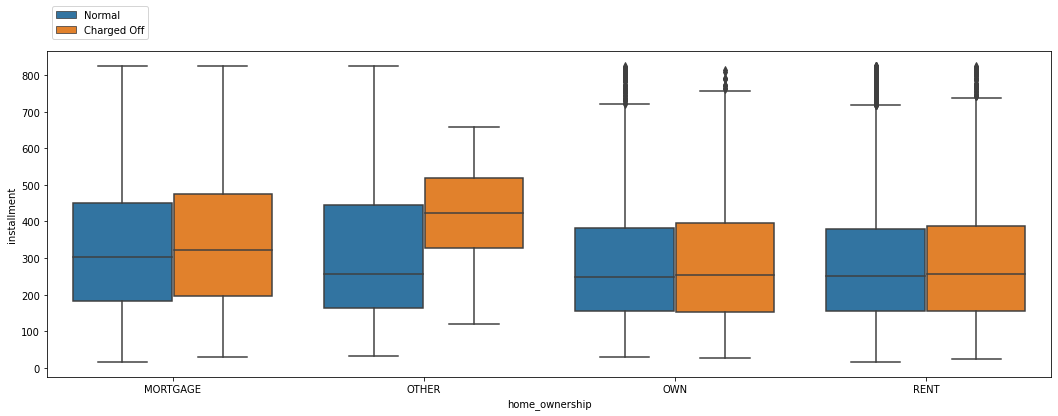

Charged Off Borrower's with home_ownership as RENT have installment ranges between 154.65 and 388.72

Charged Off Borrower's with home_ownership as MORTGAGE have installment ranges between 195.42 and 476.3

Charged Off Borrower's with home_ownership as OWN have installment ranges between 151.38 and 396.02

Charged Off Borrower's with home_ownership as OTHER have installment ranges between 328.14 and 519.94



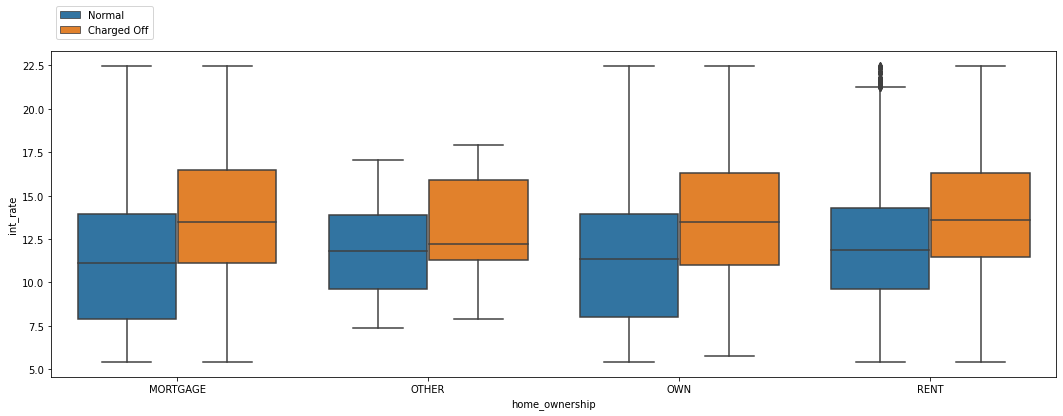

Charged Off Borrower's with home_ownership as RENT have int_rate ranges between 11.49 and 16.32

Charged Off Borrower's with home_ownership as MORTGAGE have int_rate ranges between 11.11 and 16.45

Charged Off Borrower's with home_ownership as OWN have int_rate ranges between 11.03 and 16.29

Charged Off Borrower's with home_ownership as OTHER have int_rate ranges between 11.28 and 15.92



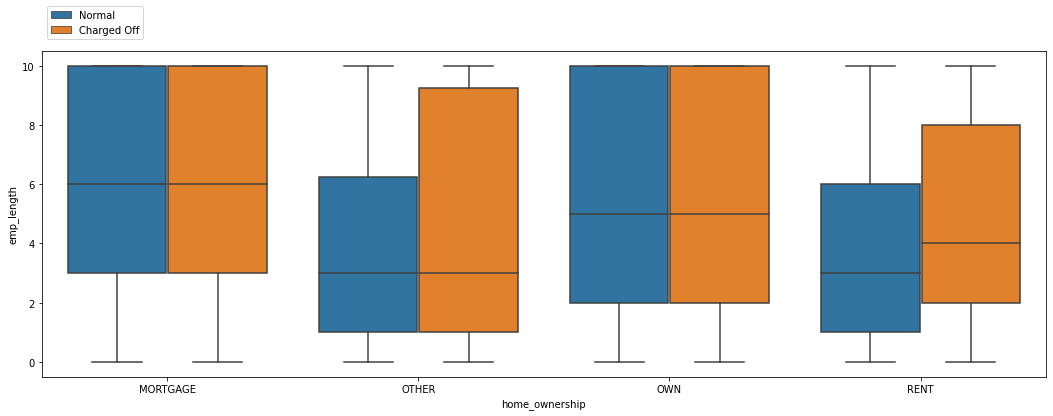

Charged Off Borrower's with home_ownership as RENT have emp_length ranges between 2.0 and 8.0

Charged Off Borrower's with home_ownership as MORTGAGE have emp_length ranges between 3.0 and 10.0

Charged Off Borrower's with home_ownership as OWN have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with home_ownership as OTHER have emp_length ranges between 1.0 and 9.25



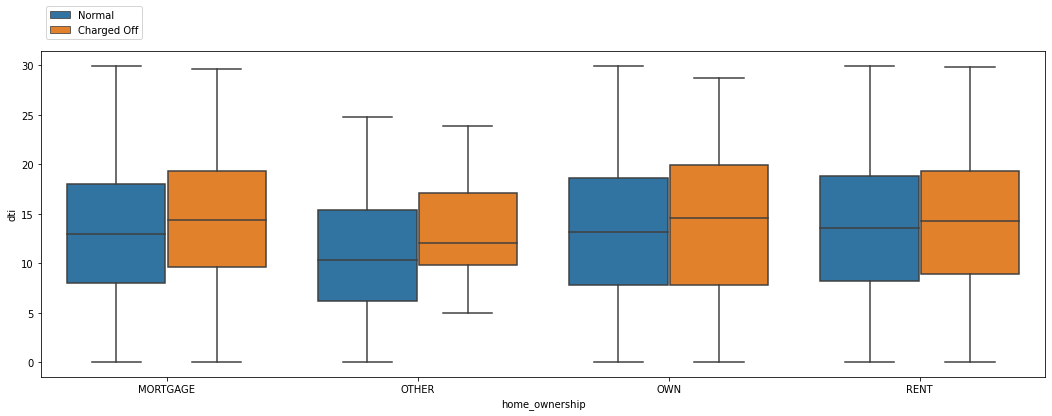

Charged Off Borrower's with home_ownership as RENT have dti ranges between 8.86 and 19.28

Charged Off Borrower's with home_ownership as MORTGAGE have dti ranges between 9.6 and 19.28

Charged Off Borrower's with home_ownership as OWN have dti ranges between 7.77 and 19.98

Charged Off Borrower's with home_ownership as OTHER have dti ranges between 9.82 and 17.11



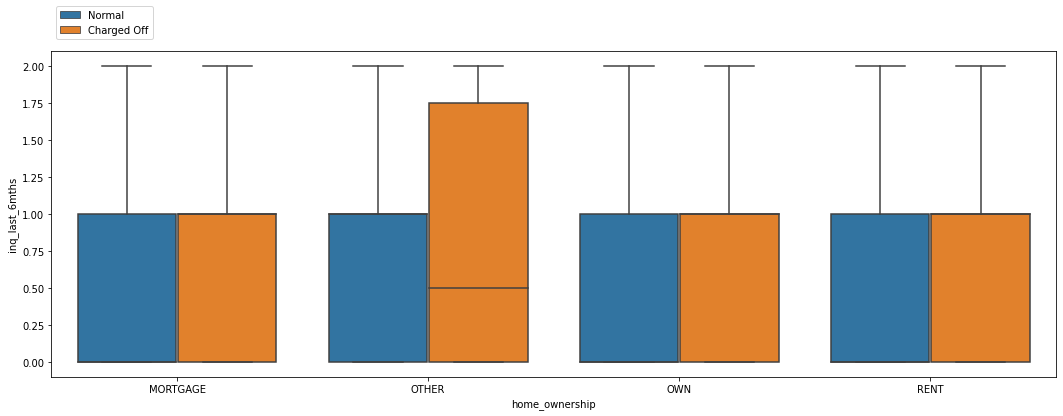

Charged Off Borrower's with home_ownership as RENT have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with home_ownership as MORTGAGE have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with home_ownership as OWN have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with home_ownership as OTHER have inq_last_6mths ranges between 0.0 and 1.75



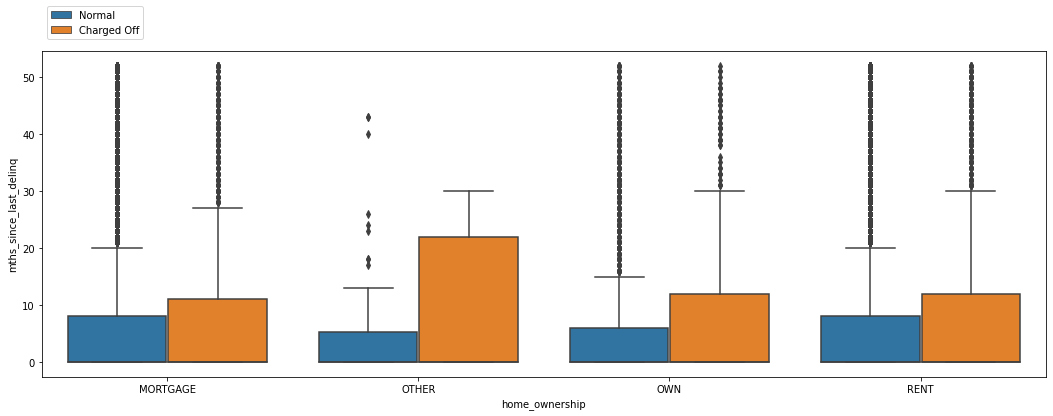

Charged Off Borrower's with home_ownership as RENT have mths_since_last_delinq ranges between 0.0 and 12.0

Charged Off Borrower's with home_ownership as MORTGAGE have mths_since_last_delinq ranges between 0.0 and 11.0

Charged Off Borrower's with home_ownership as OWN have mths_since_last_delinq ranges between 0.0 and 12.0

Charged Off Borrower's with home_ownership as OTHER have mths_since_last_delinq ranges between 0.0 and 22.0



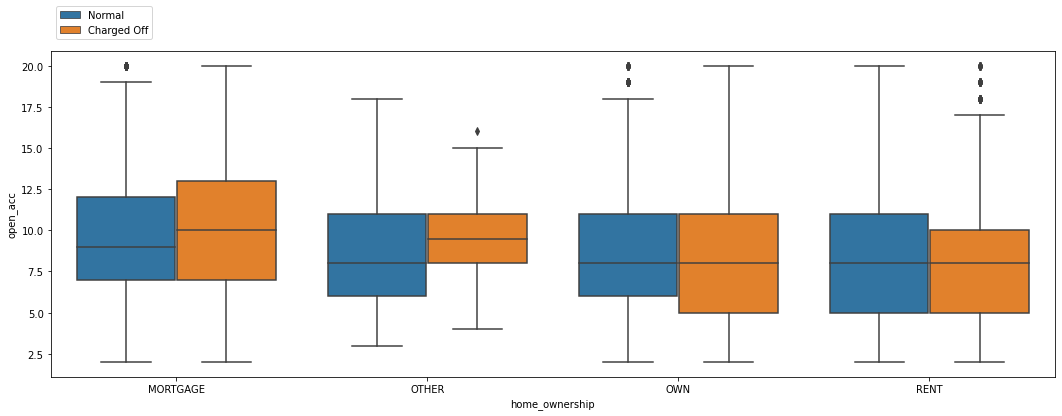

Charged Off Borrower's with home_ownership as RENT have open_acc ranges between 5.0 and 10.0

Charged Off Borrower's with home_ownership as MORTGAGE have open_acc ranges between 7.0 and 13.0

Charged Off Borrower's with home_ownership as OWN have open_acc ranges between 5.0 and 11.0

Charged Off Borrower's with home_ownership as OTHER have open_acc ranges between 8.0 and 11.0



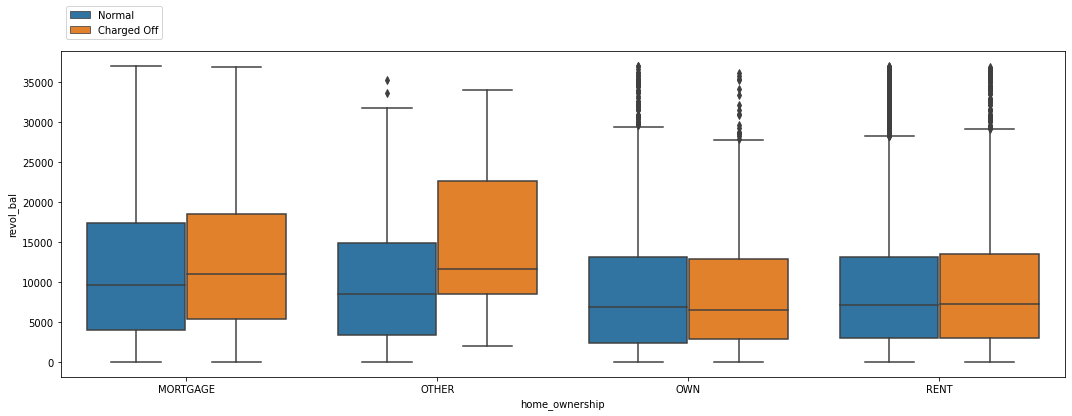

Charged Off Borrower's with home_ownership as RENT have revol_bal ranges between 3060.5 and 13504.0

Charged Off Borrower's with home_ownership as MORTGAGE have revol_bal ranges between 5372.0 and 18486.0

Charged Off Borrower's with home_ownership as OWN have revol_bal ranges between 2845.5 and 12857.5

Charged Off Borrower's with home_ownership as OTHER have revol_bal ranges between 8492.25 and 22602.5



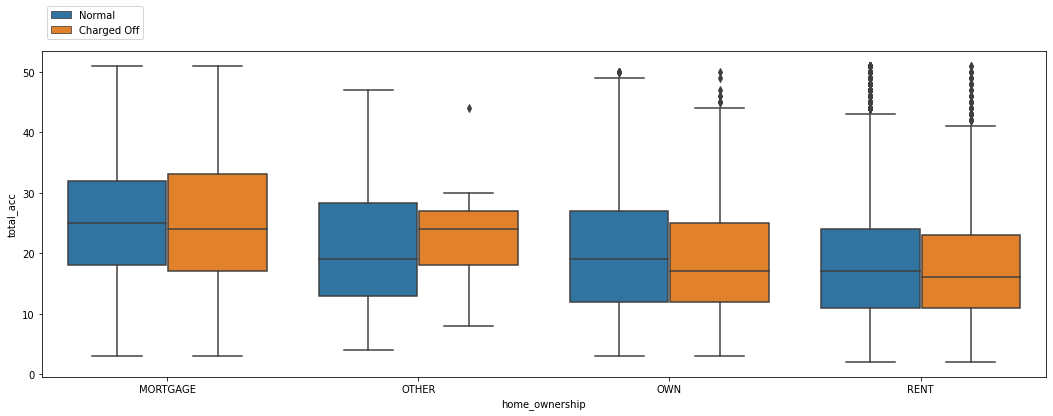

Charged Off Borrower's with home_ownership as RENT have total_acc ranges between 11.0 and 23.0

Charged Off Borrower's with home_ownership as MORTGAGE have total_acc ranges between 17.0 and 33.0

Charged Off Borrower's with home_ownership as OWN have total_acc ranges between 12.0 and 25.0

Charged Off Borrower's with home_ownership as OTHER have total_acc ranges between 18.0 and 27.0



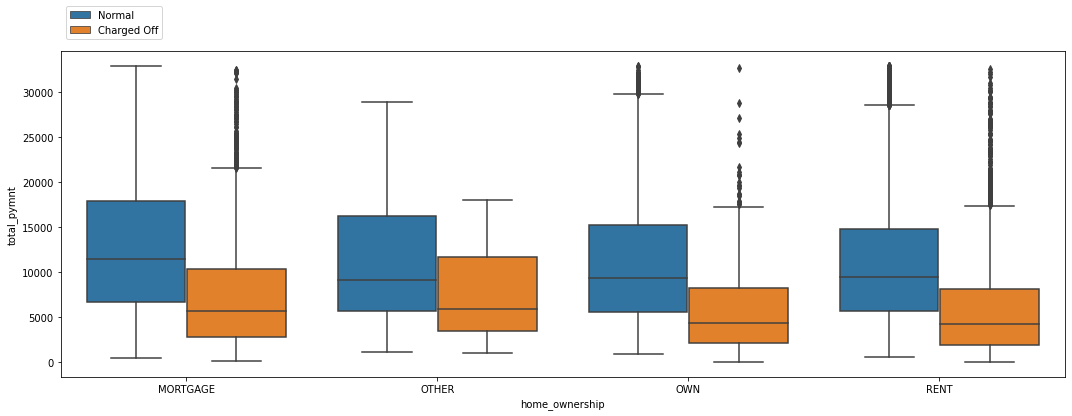

Charged Off Borrower's with home_ownership as RENT have total_pymnt ranges between 1959.26 and 8167.44

Charged Off Borrower's with home_ownership as MORTGAGE have total_pymnt ranges between 2784.93 and 10321.27

Charged Off Borrower's with home_ownership as OWN have total_pymnt ranges between 2131.64 and 8283.28

Charged Off Borrower's with home_ownership as OTHER have total_pymnt ranges between 3515.1 and 11744.48



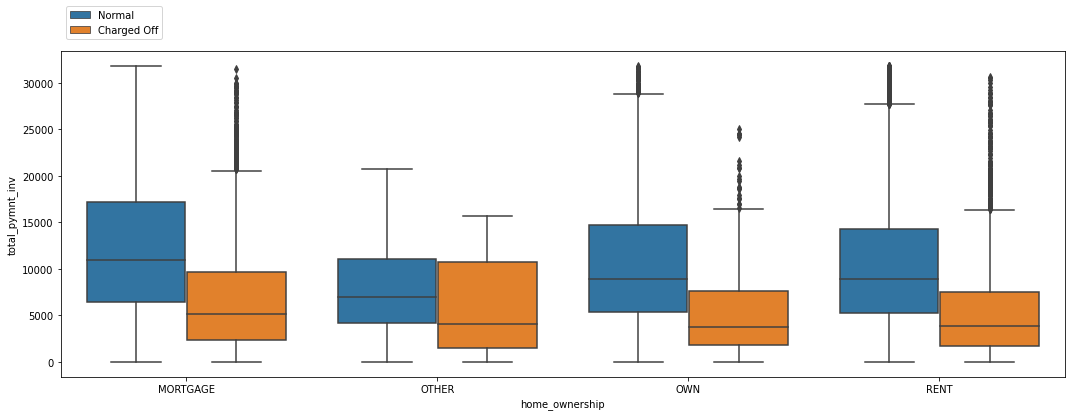

Charged Off Borrower's with home_ownership as RENT have total_pymnt_inv ranges between 1698.16 and 7567.33

Charged Off Borrower's with home_ownership as MORTGAGE have total_pymnt_inv ranges between 2359.78 and 9668.19

Charged Off Borrower's with home_ownership as OWN have total_pymnt_inv ranges between 1838.88 and 7682.1

Charged Off Borrower's with home_ownership as OTHER have total_pymnt_inv ranges between 1481.83 and 10726.96



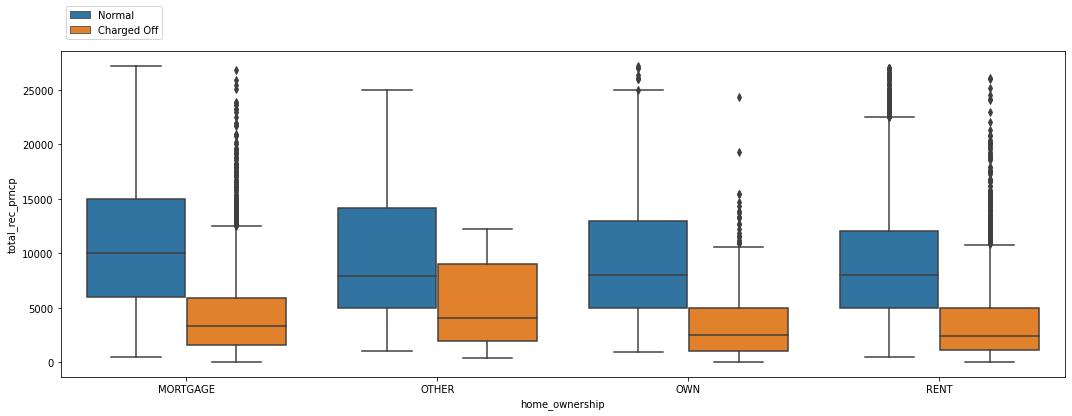

Charged Off Borrower's with home_ownership as RENT have total_rec_prncp ranges between 1084.21 and 4977.74

Charged Off Borrower's with home_ownership as MORTGAGE have total_rec_prncp ranges between 1565.78 and 5932.62

Charged Off Borrower's with home_ownership as OWN have total_rec_prncp ranges between 1044.38 and 4986.39

Charged Off Borrower's with home_ownership as OTHER have total_rec_prncp ranges between 1972.4 and 8991.86



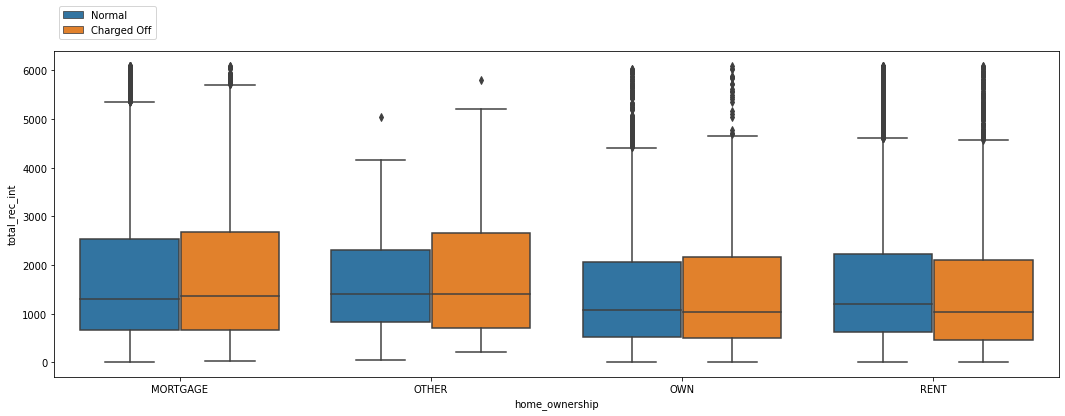

Charged Off Borrower's with home_ownership as RENT have total_rec_int ranges between 465.72 and 2105.08

Charged Off Borrower's with home_ownership as MORTGAGE have total_rec_int ranges between 659.51 and 2678.06

Charged Off Borrower's with home_ownership as OWN have total_rec_int ranges between 495.64 and 2168.77

Charged Off Borrower's with home_ownership as OTHER have total_rec_int ranges between 712.71 and 2664.88



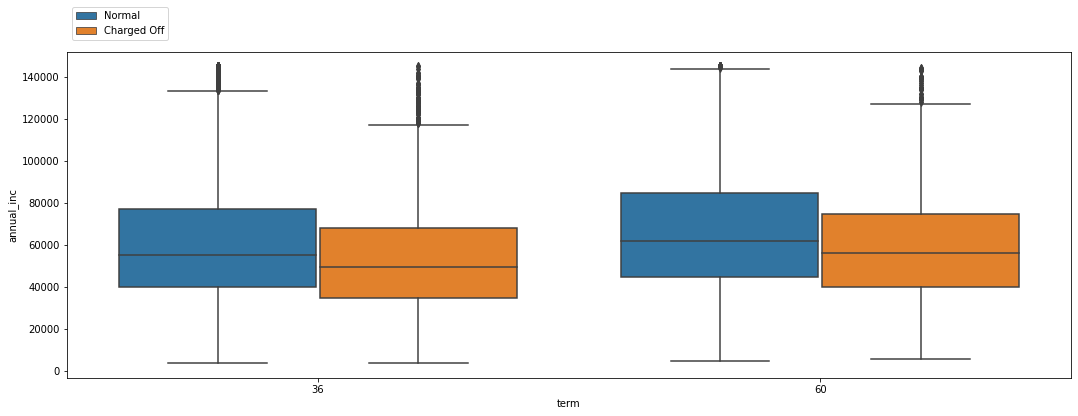

Charged Off Borrower's with term as 36 have annual_inc ranges between 35000.0 and 68000.0

Charged Off Borrower's with term as 60 have annual_inc ranges between 40000.0 and 75000.0



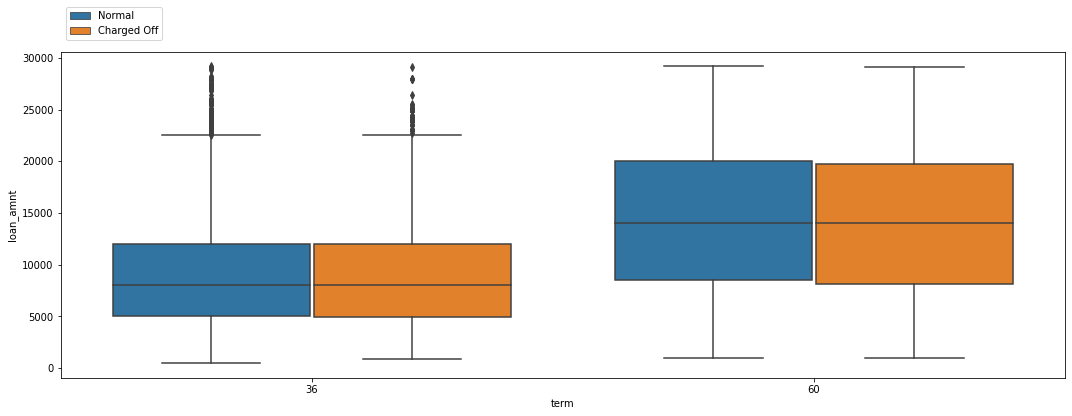

Charged Off Borrower's with term as 36 have loan_amnt ranges between 4956.25 and 12000.0

Charged Off Borrower's with term as 60 have loan_amnt ranges between 8125.0 and 19737.5



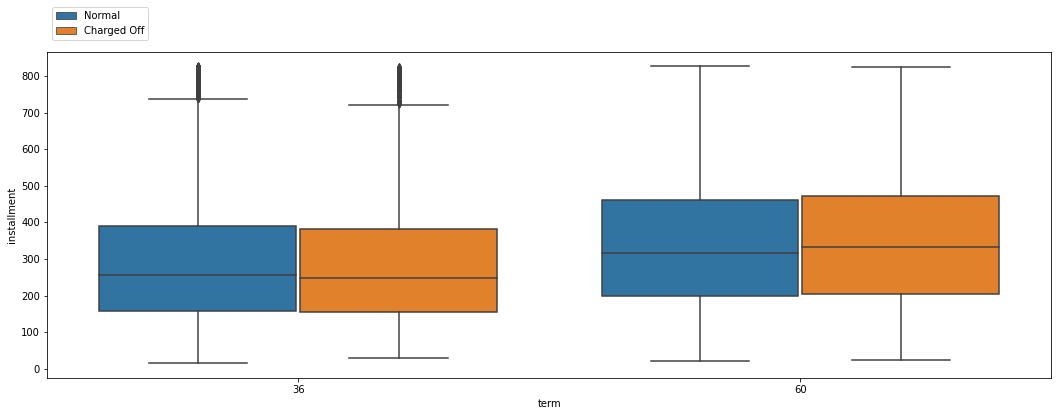

Charged Off Borrower's with term as 36 have installment ranges between 154.25 and 381.04

Charged Off Borrower's with term as 60 have installment ranges between 204.23 and 471.54



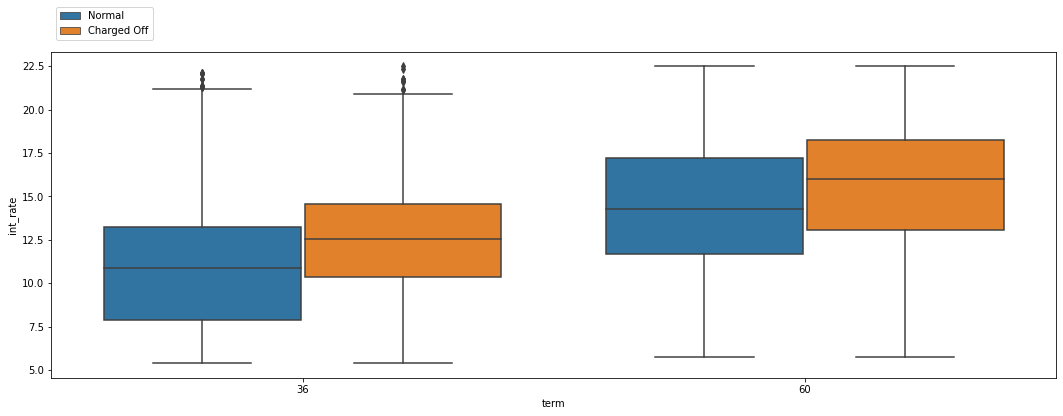

Charged Off Borrower's with term as 36 have int_rate ranges between 10.37 and 14.59

Charged Off Borrower's with term as 60 have int_rate ranges between 13.06 and 18.25



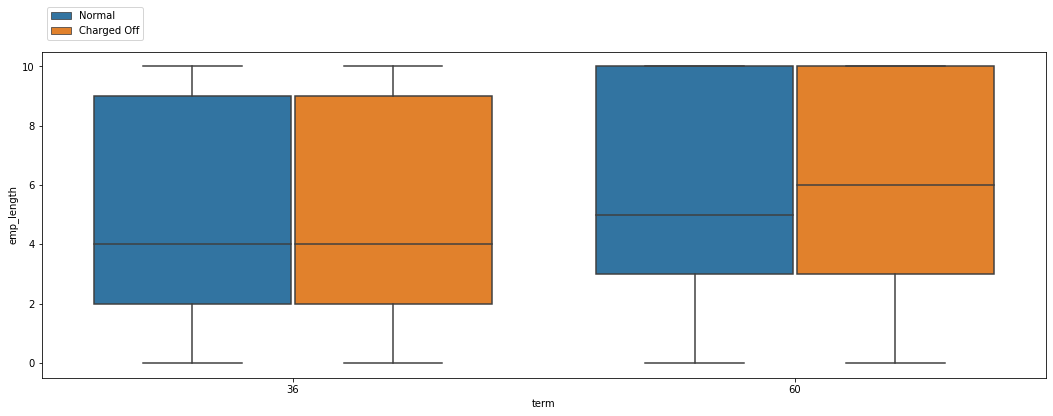

Charged Off Borrower's with term as 36 have emp_length ranges between 2.0 and 9.0

Charged Off Borrower's with term as 60 have emp_length ranges between 3.0 and 10.0



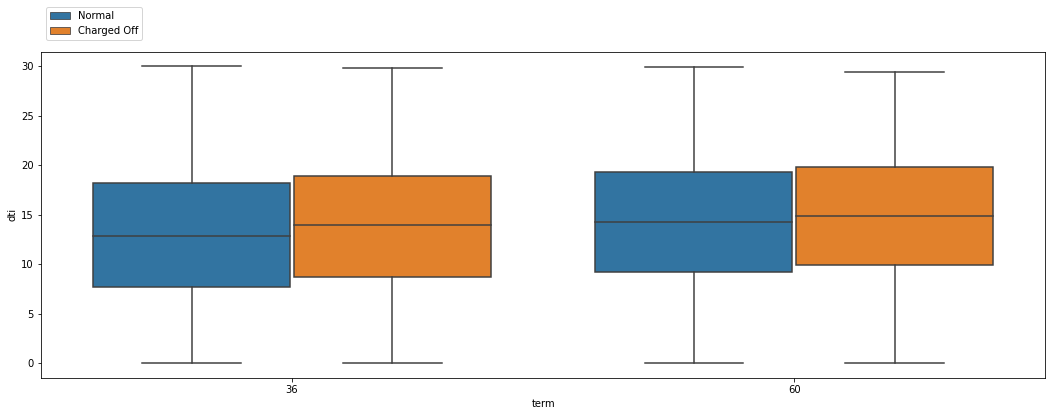

Charged Off Borrower's with term as 36 have dti ranges between 8.67 and 18.93

Charged Off Borrower's with term as 60 have dti ranges between 9.89 and 19.78



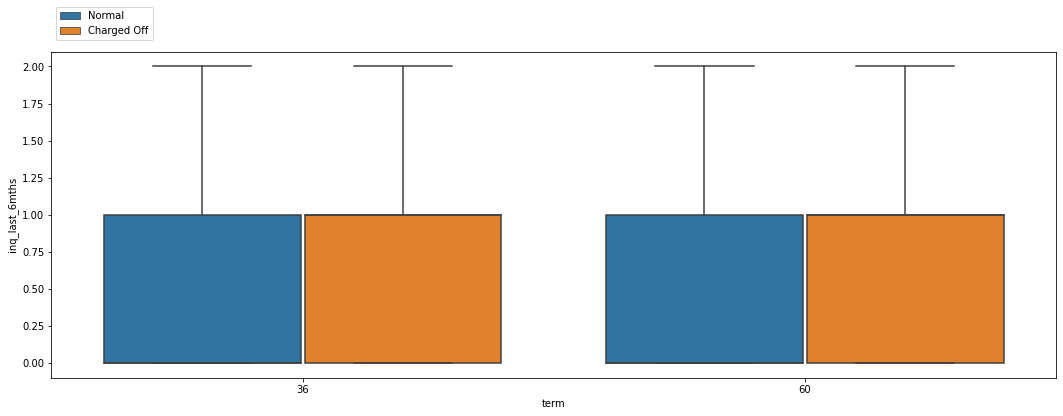

Charged Off Borrower's with term as 36 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with term as 60 have inq_last_6mths ranges between 0.0 and 1.0



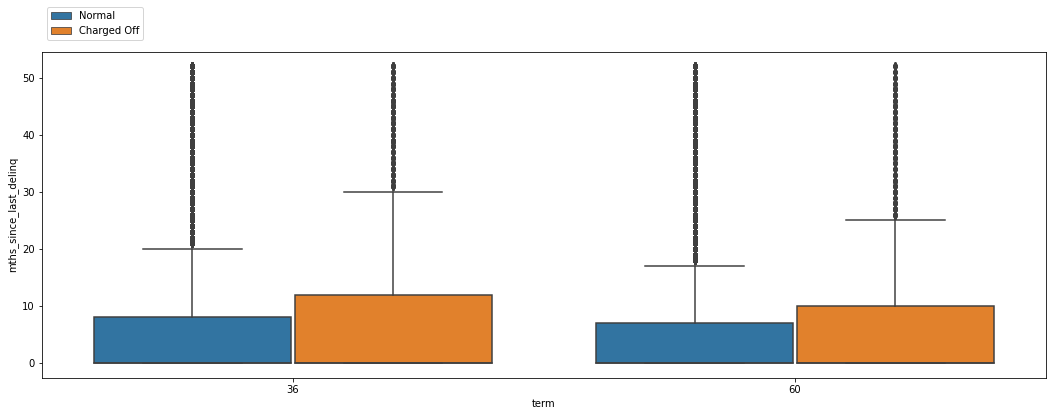

Charged Off Borrower's with term as 36 have mths_since_last_delinq ranges between 0.0 and 12.0

Charged Off Borrower's with term as 60 have mths_since_last_delinq ranges between 0.0 and 10.0



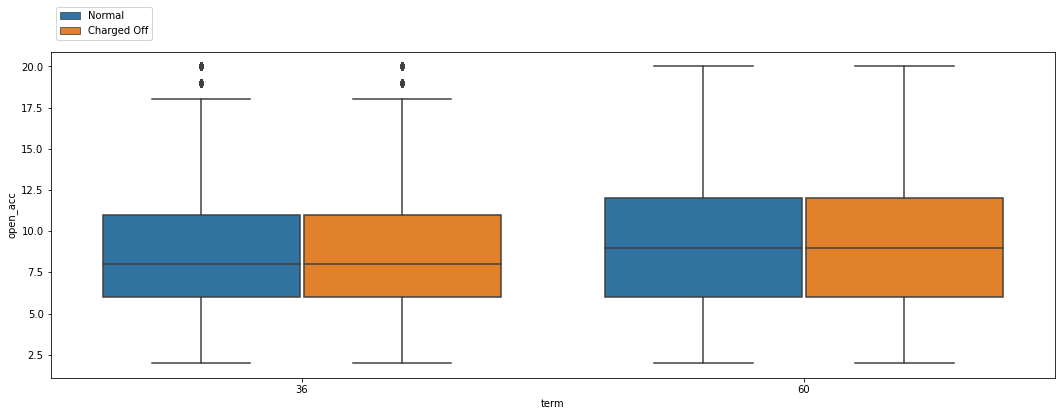

Charged Off Borrower's with term as 36 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with term as 60 have open_acc ranges between 6.0 and 12.0



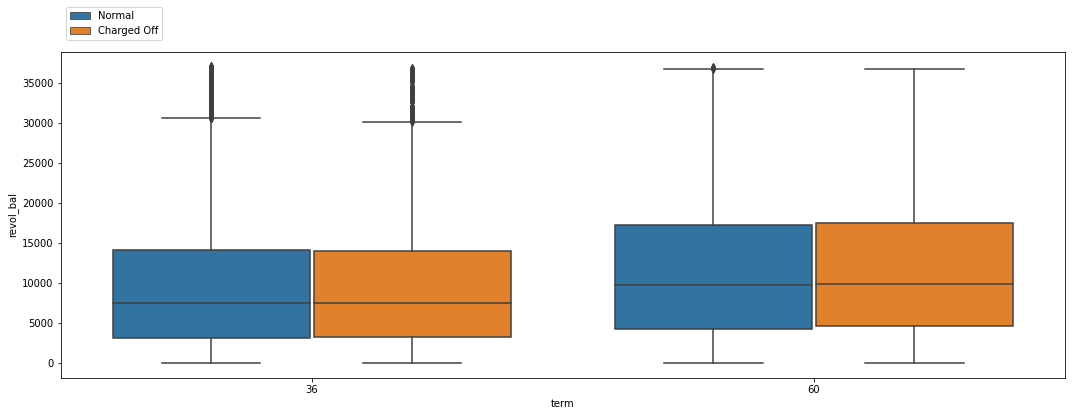

Charged Off Borrower's with term as 36 have revol_bal ranges between 3294.0 and 14022.0

Charged Off Borrower's with term as 60 have revol_bal ranges between 4616.75 and 17559.25



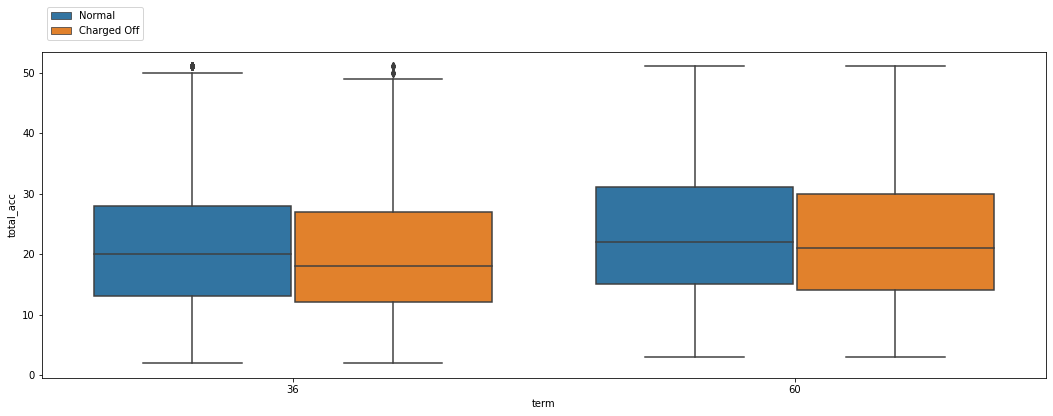

Charged Off Borrower's with term as 36 have total_acc ranges between 12.0 and 27.0

Charged Off Borrower's with term as 60 have total_acc ranges between 14.0 and 30.0



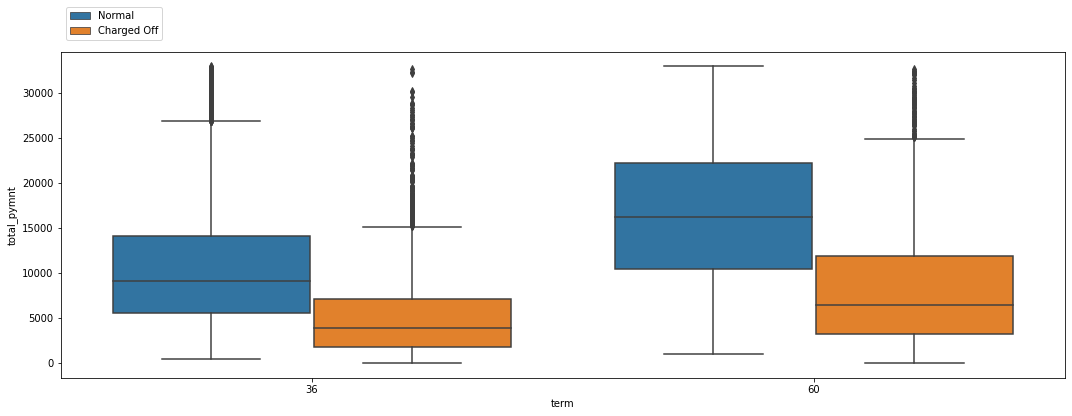

Charged Off Borrower's with term as 36 have total_pymnt ranges between 1815.89 and 7165.0

Charged Off Borrower's with term as 60 have total_pymnt ranges between 3209.39 and 11962.78



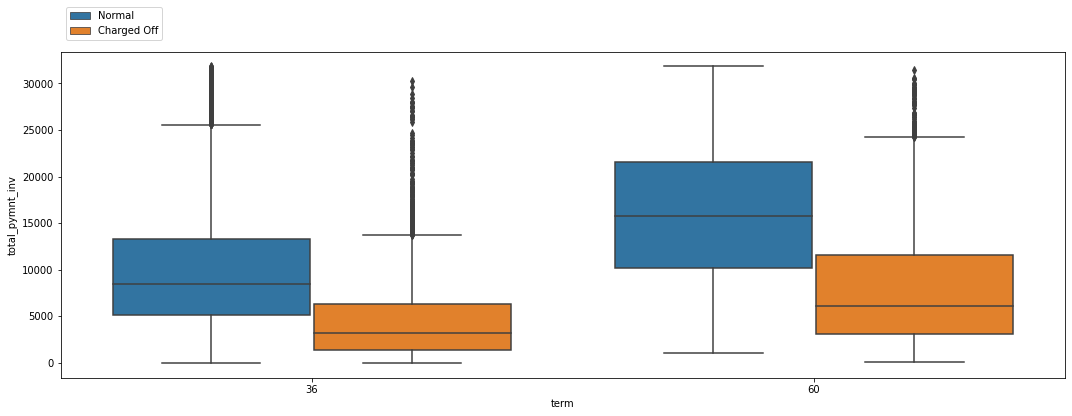

Charged Off Borrower's with term as 36 have total_pymnt_inv ranges between 1442.56 and 6352.98

Charged Off Borrower's with term as 60 have total_pymnt_inv ranges between 3063.12 and 11556.39



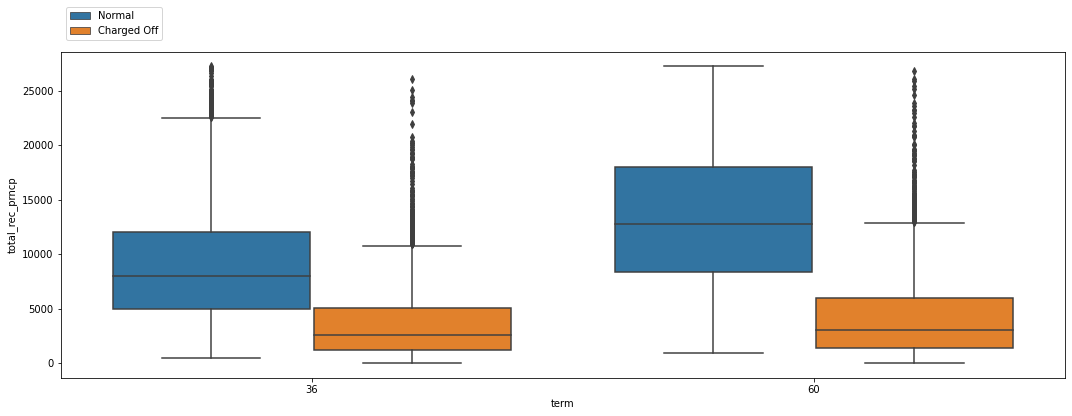

Charged Off Borrower's with term as 36 have total_rec_prncp ranges between 1160.26 and 5019.55

Charged Off Borrower's with term as 60 have total_rec_prncp ranges between 1357.41 and 5973.38



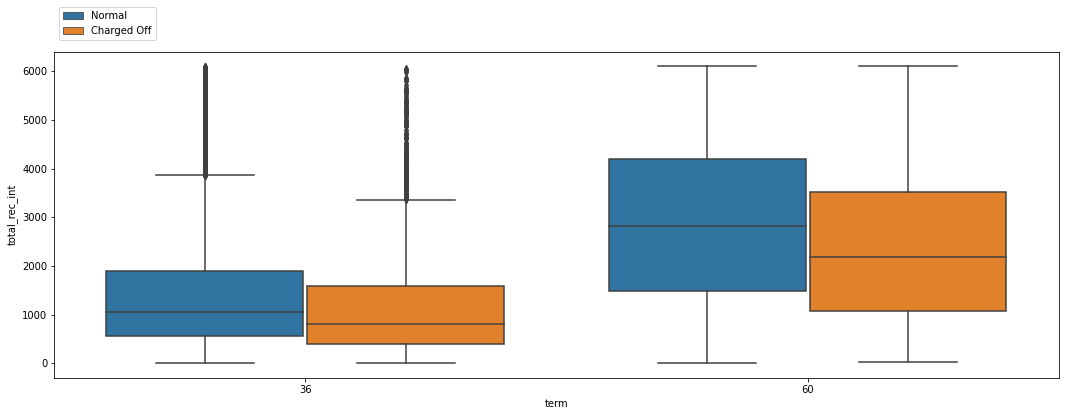

Charged Off Borrower's with term as 36 have total_rec_int ranges between 394.82 and 1578.97

Charged Off Borrower's with term as 60 have total_rec_int ranges between 1072.32 and 3509.14



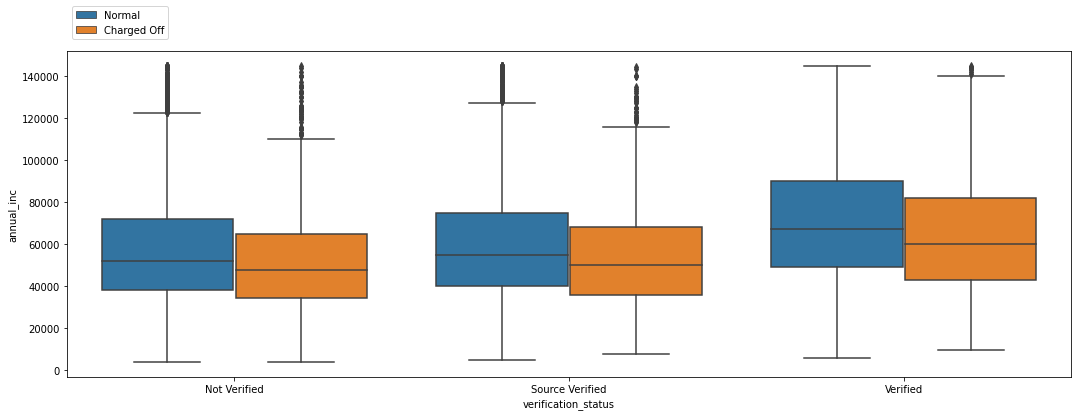

Charged Off Borrower's with verification_status as Not Verified have annual_inc ranges between 34320.0 and 64800.0

Charged Off Borrower's with verification_status as Verified have annual_inc ranges between 42994.0 and 81996.0

Charged Off Borrower's with verification_status as Source Verified have annual_inc ranges between 36000.0 and 68000.0



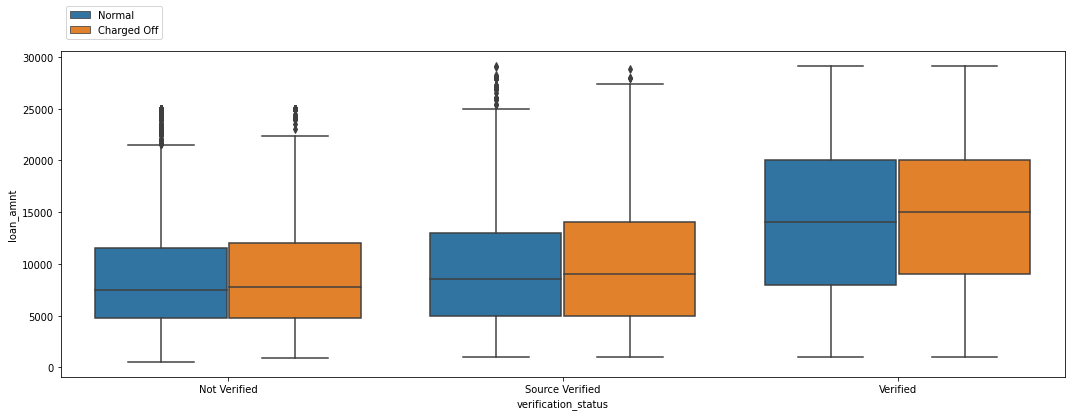

Charged Off Borrower's with verification_status as Not Verified have loan_amnt ranges between 4800.0 and 12000.0

Charged Off Borrower's with verification_status as Verified have loan_amnt ranges between 9000.0 and 20000.0

Charged Off Borrower's with verification_status as Source Verified have loan_amnt ranges between 5000.0 and 14000.0



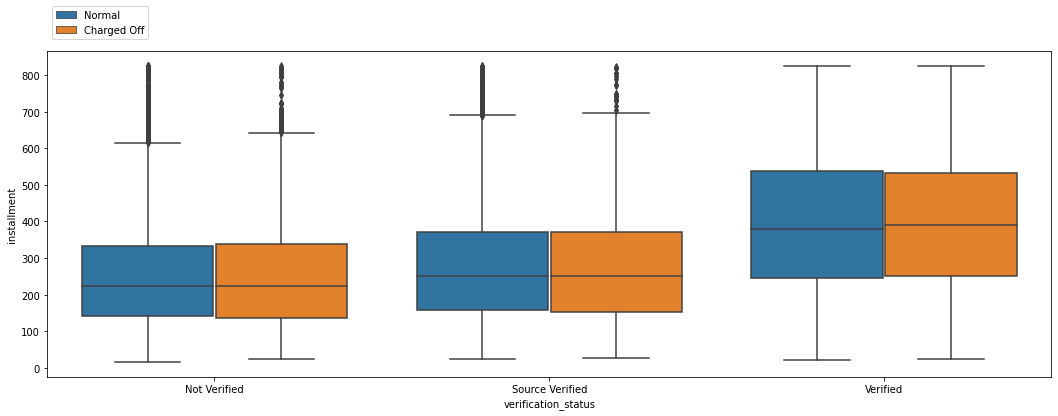

Charged Off Borrower's with verification_status as Not Verified have installment ranges between 136.95 and 339.6

Charged Off Borrower's with verification_status as Verified have installment ranges between 250.58 and 533.23

Charged Off Borrower's with verification_status as Source Verified have installment ranges between 153.48 and 372.22



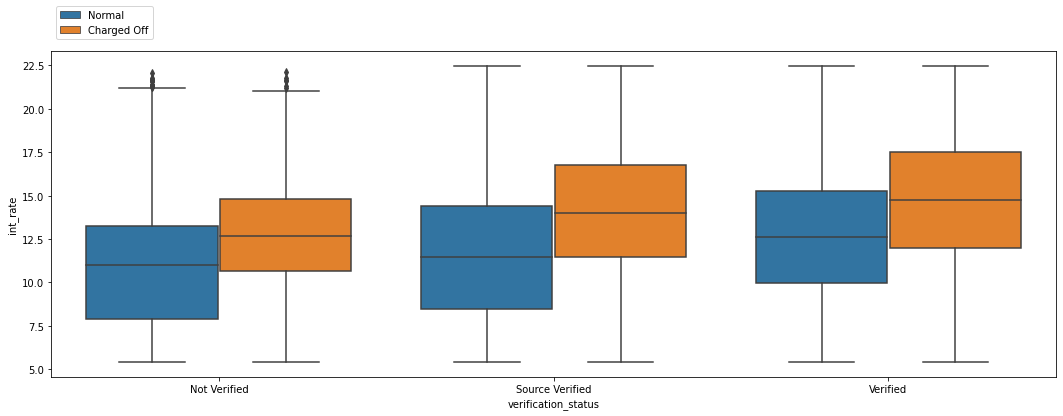

Charged Off Borrower's with verification_status as Not Verified have int_rate ranges between 10.64 and 14.79

Charged Off Borrower's with verification_status as Verified have int_rate ranges between 11.99 and 17.51

Charged Off Borrower's with verification_status as Source Verified have int_rate ranges between 11.49 and 16.77



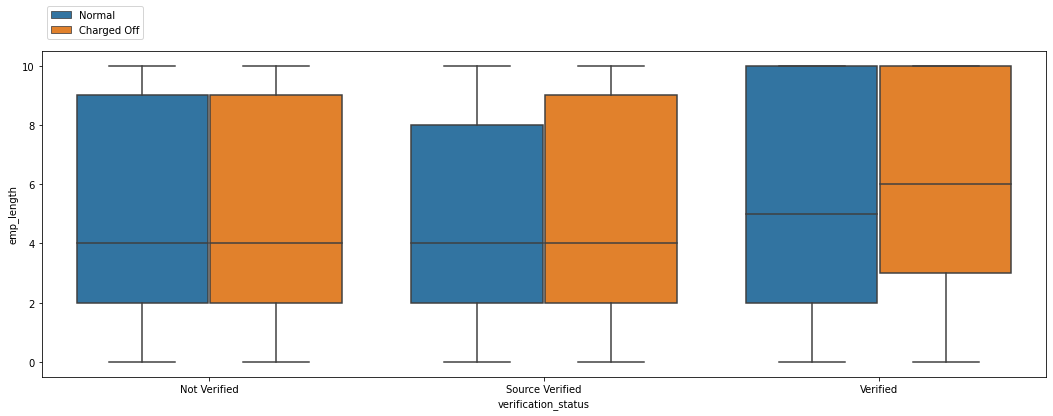

Charged Off Borrower's with verification_status as Not Verified have emp_length ranges between 2.0 and 9.0

Charged Off Borrower's with verification_status as Verified have emp_length ranges between 3.0 and 10.0

Charged Off Borrower's with verification_status as Source Verified have emp_length ranges between 2.0 and 9.0



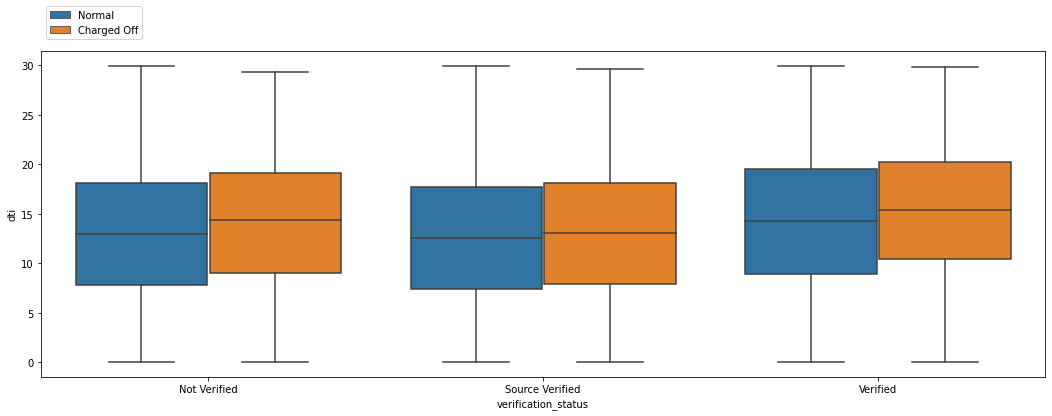

Charged Off Borrower's with verification_status as Not Verified have dti ranges between 8.97 and 19.13

Charged Off Borrower's with verification_status as Verified have dti ranges between 10.38 and 20.22

Charged Off Borrower's with verification_status as Source Verified have dti ranges between 7.93 and 18.07



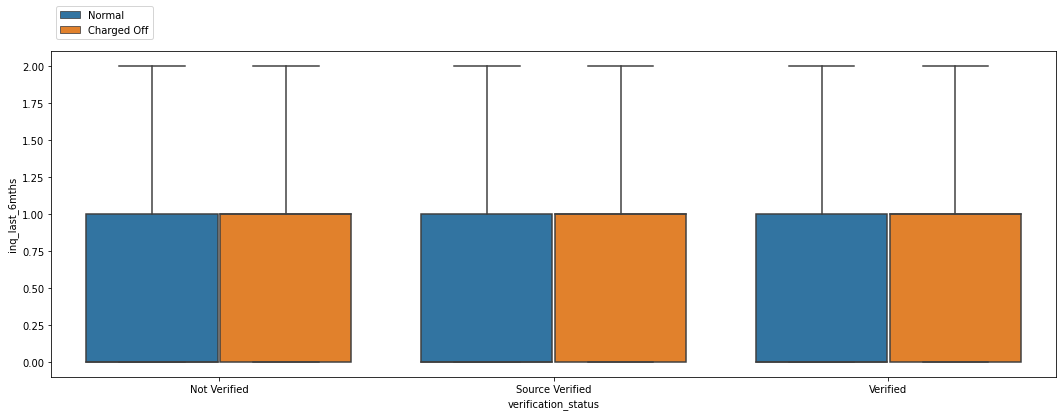

Charged Off Borrower's with verification_status as Not Verified have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with verification_status as Verified have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with verification_status as Source Verified have inq_last_6mths ranges between 0.0 and 1.0



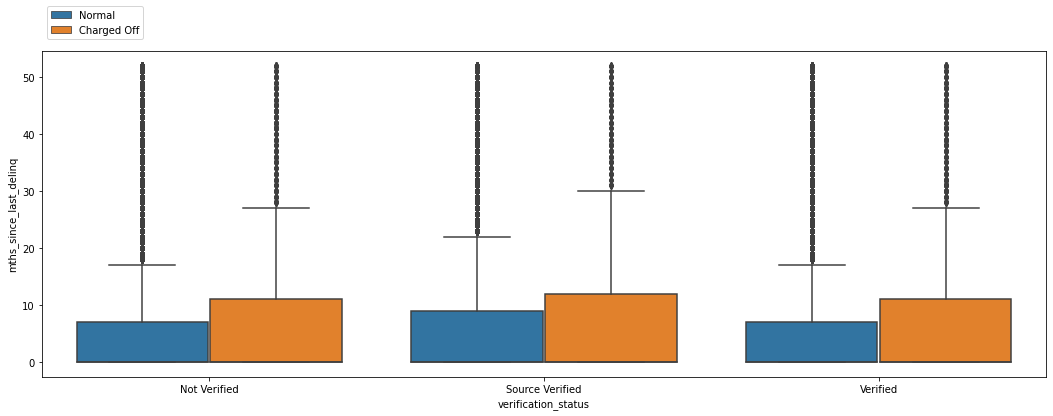

Charged Off Borrower's with verification_status as Not Verified have mths_since_last_delinq ranges between 0.0 and 11.0

Charged Off Borrower's with verification_status as Verified have mths_since_last_delinq ranges between 0.0 and 11.0

Charged Off Borrower's with verification_status as Source Verified have mths_since_last_delinq ranges between 0.0 and 12.0



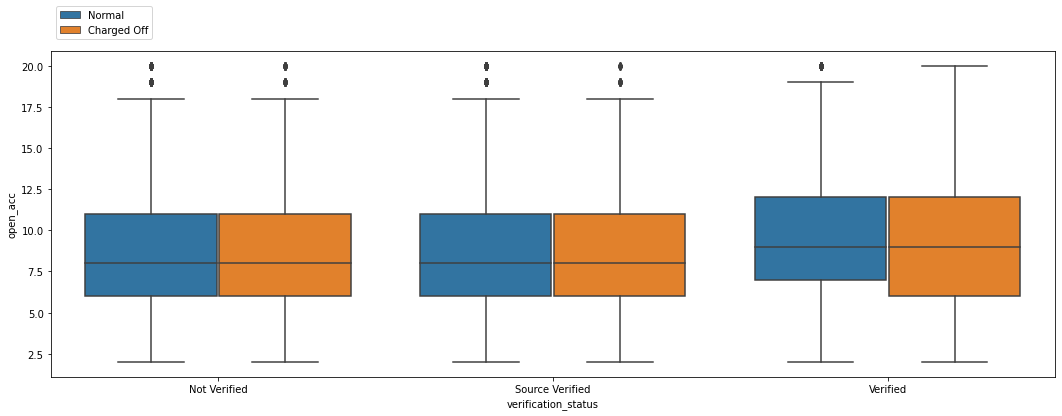

Charged Off Borrower's with verification_status as Not Verified have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with verification_status as Verified have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with verification_status as Source Verified have open_acc ranges between 6.0 and 11.0



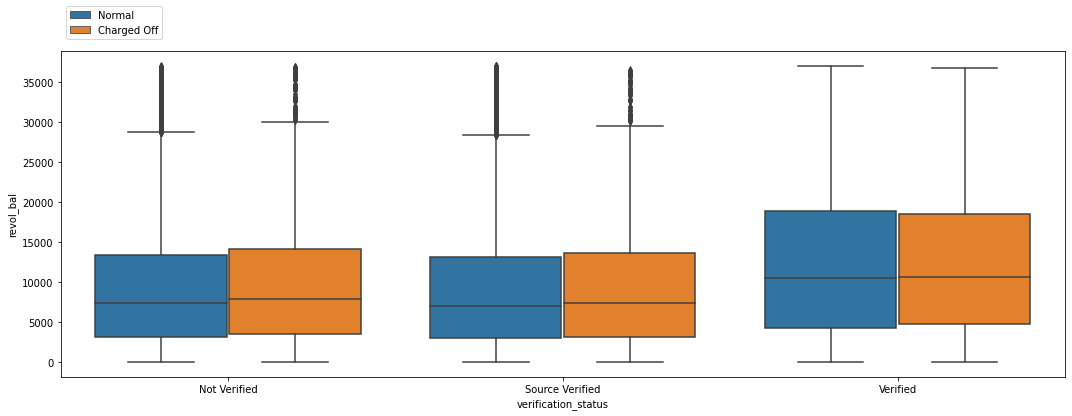

Charged Off Borrower's with verification_status as Not Verified have revol_bal ranges between 3468.0 and 14120.5

Charged Off Borrower's with verification_status as Verified have revol_bal ranges between 4809.0 and 18554.75

Charged Off Borrower's with verification_status as Source Verified have revol_bal ranges between 3119.0 and 13668.25



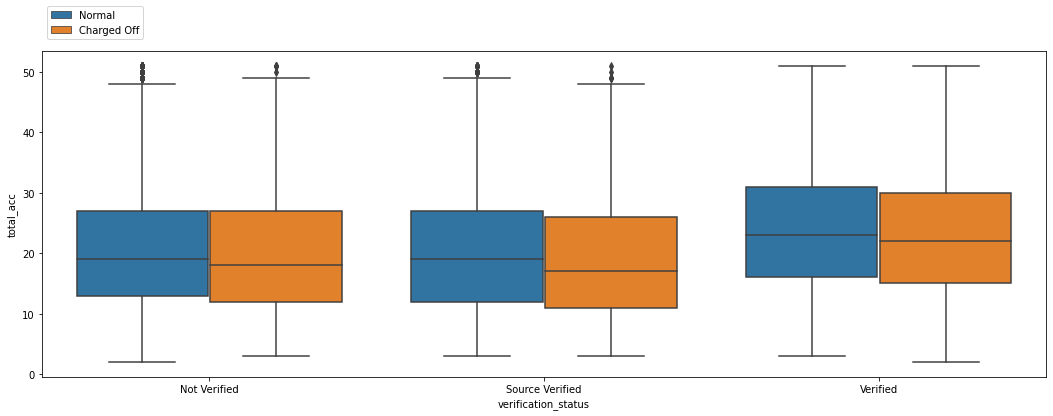

Charged Off Borrower's with verification_status as Not Verified have total_acc ranges between 12.0 and 27.0

Charged Off Borrower's with verification_status as Verified have total_acc ranges between 15.0 and 30.0

Charged Off Borrower's with verification_status as Source Verified have total_acc ranges between 11.0 and 26.0



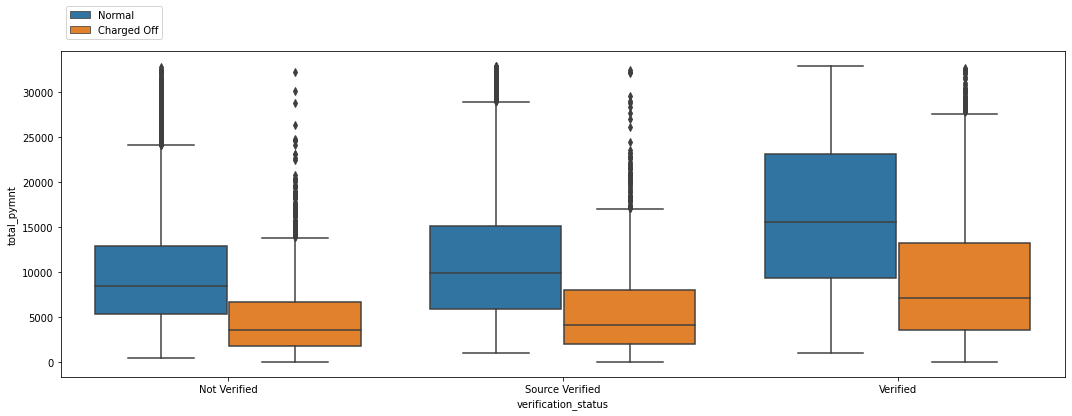

Charged Off Borrower's with verification_status as Not Verified have total_pymnt ranges between 1788.55 and 6658.75

Charged Off Borrower's with verification_status as Verified have total_pymnt ranges between 3560.77 and 13214.21

Charged Off Borrower's with verification_status as Source Verified have total_pymnt ranges between 1985.96 and 8017.99



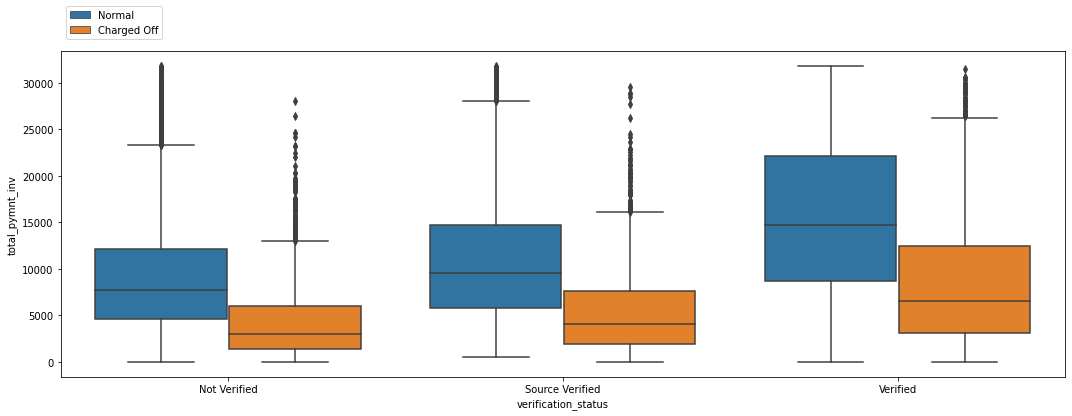

Charged Off Borrower's with verification_status as Not Verified have total_pymnt_inv ranges between 1354.56 and 6008.04

Charged Off Borrower's with verification_status as Verified have total_pymnt_inv ranges between 3108.4 and 12417.57

Charged Off Borrower's with verification_status as Source Verified have total_pymnt_inv ranges between 1914.57 and 7606.72



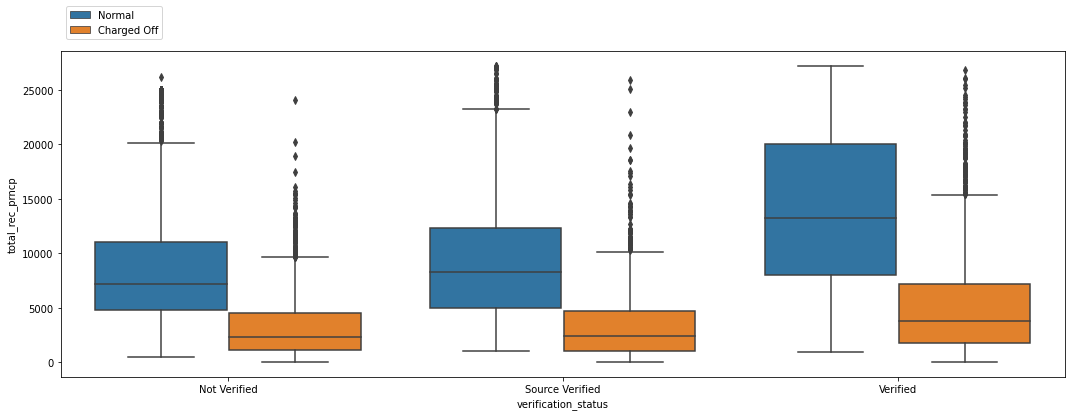

Charged Off Borrower's with verification_status as Not Verified have total_rec_prncp ranges between 1081.41 and 4507.78

Charged Off Borrower's with verification_status as Verified have total_rec_prncp ranges between 1730.12 and 7206.47

Charged Off Borrower's with verification_status as Source Verified have total_rec_prncp ranges between 1040.79 and 4728.98



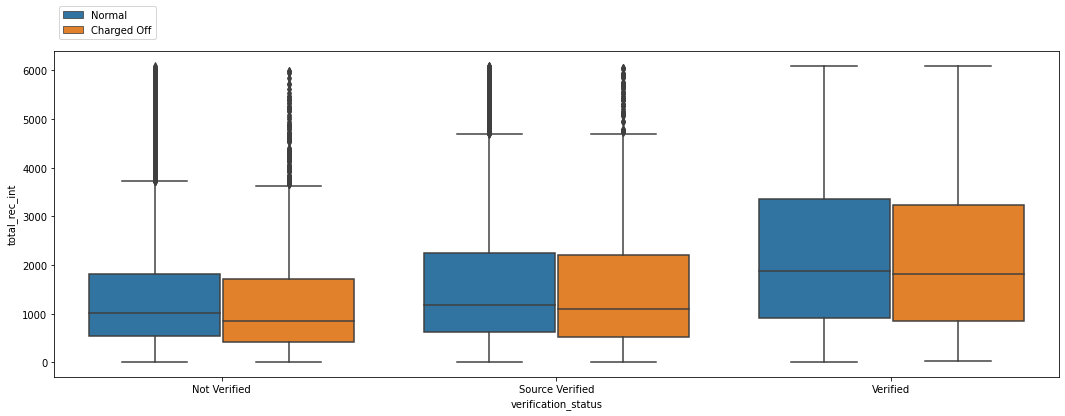

Charged Off Borrower's with verification_status as Not Verified have total_rec_int ranges between 412.8 and 1705.22

Charged Off Borrower's with verification_status as Verified have total_rec_int ranges between 845.93 and 3234.28

Charged Off Borrower's with verification_status as Source Verified have total_rec_int ranges between 523.79 and 2199.17



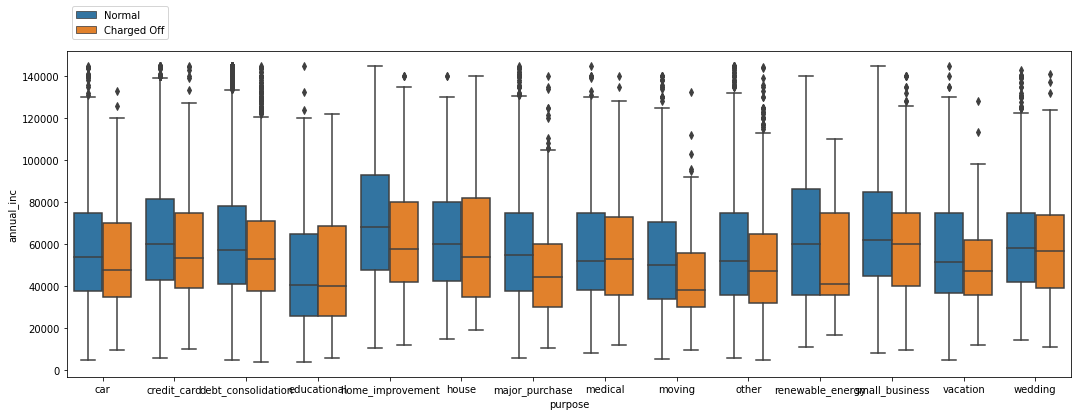

Charged Off Borrower's with purpose as debt_consolidation have annual_inc ranges between 38000.0 and 71241.5

Charged Off Borrower's with purpose as credit_card have annual_inc ranges between 39450.0 and 75000.0

Charged Off Borrower's with purpose as other have annual_inc ranges between 32004.0 and 65004.0

Charged Off Borrower's with purpose as home_improvement have annual_inc ranges between 42000.0 and 80000.0

Charged Off Borrower's with purpose as major_purchase have annual_inc ranges between 30000.0 and 60000.0

Charged Off Borrower's with purpose as small_business have annual_inc ranges between 40000.0 and 75000.0

Charged Off Borrower's with purpose as car have annual_inc ranges between 34900.0 and 69998.0

Charged Off Borrower's with purpose as wedding have annual_inc ranges between 39349.0 and 74087.2

Charged Off Borrower's with purpose as medical have annual_inc ranges between 36000.0 and 72900.0

Charged Off Borrower's with purpose as moving have annual_inc ranges between 

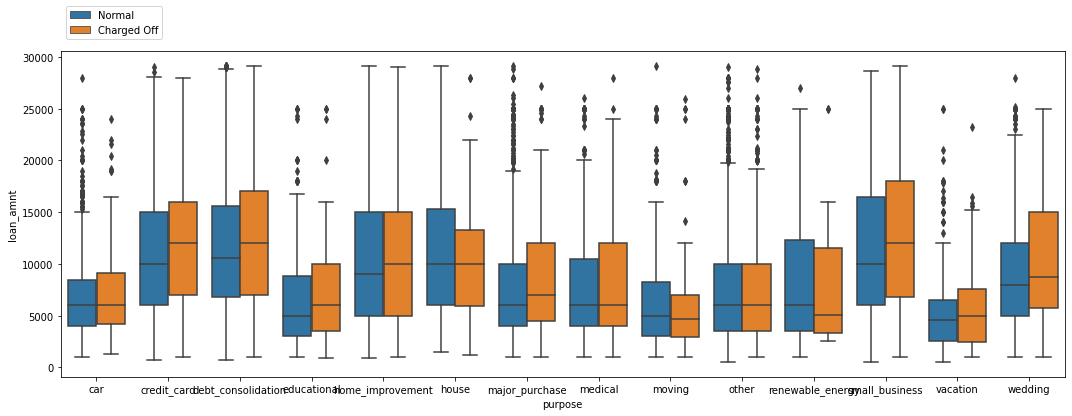

Charged Off Borrower's with purpose as debt_consolidation have loan_amnt ranges between 7000.0 and 17000.0

Charged Off Borrower's with purpose as credit_card have loan_amnt ranges between 7000.0 and 16000.0

Charged Off Borrower's with purpose as other have loan_amnt ranges between 3500.0 and 10000.0

Charged Off Borrower's with purpose as home_improvement have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with purpose as major_purchase have loan_amnt ranges between 4500.0 and 12000.0

Charged Off Borrower's with purpose as small_business have loan_amnt ranges between 6787.5 and 18000.0

Charged Off Borrower's with purpose as car have loan_amnt ranges between 4150.0 and 9150.0

Charged Off Borrower's with purpose as wedding have loan_amnt ranges between 5750.0 and 15000.0

Charged Off Borrower's with purpose as medical have loan_amnt ranges between 3975.0 and 12000.0

Charged Off Borrower's with purpose as moving have loan_amnt ranges between 2968.75 and 7000.0



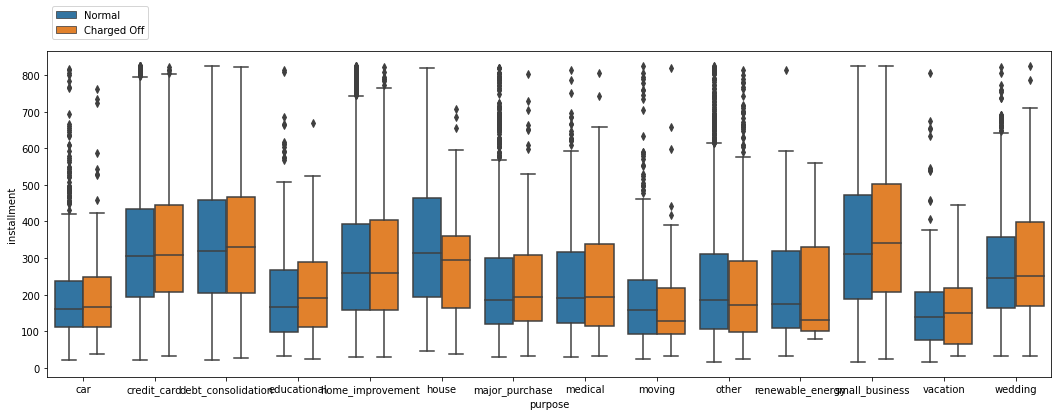

Charged Off Borrower's with purpose as debt_consolidation have installment ranges between 205.86 and 468.17

Charged Off Borrower's with purpose as credit_card have installment ranges between 206.25 and 445.66

Charged Off Borrower's with purpose as other have installment ranges between 97.44 and 291.08

Charged Off Borrower's with purpose as home_improvement have installment ranges between 158.24 and 402.98

Charged Off Borrower's with purpose as major_purchase have installment ranges between 128.02 and 309.53

Charged Off Borrower's with purpose as small_business have installment ranges between 207.46 and 503.14

Charged Off Borrower's with purpose as car have installment ranges between 110.76 and 248.41

Charged Off Borrower's with purpose as wedding have installment ranges between 168.96 and 399.84

Charged Off Borrower's with purpose as medical have installment ranges between 115.6 and 337.66

Charged Off Borrower's with purpose as moving have installment ranges between 91.83 and 

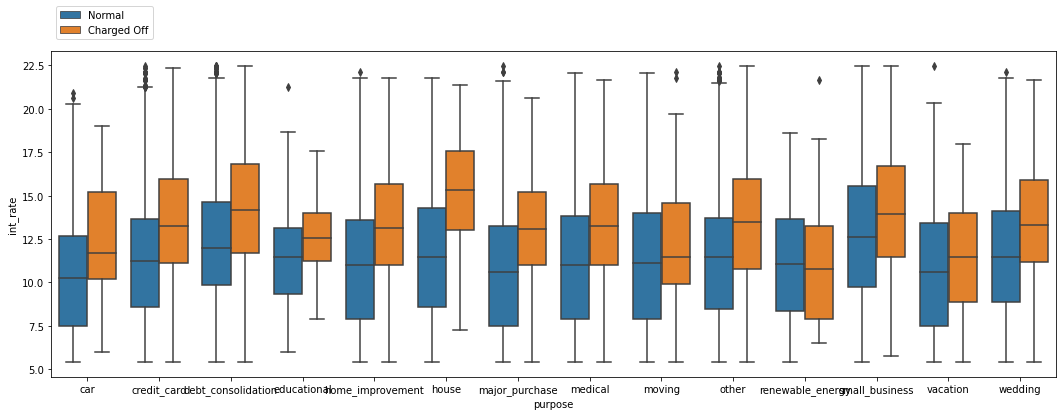

Charged Off Borrower's with purpose as debt_consolidation have int_rate ranges between 11.71 and 16.82

Charged Off Borrower's with purpose as credit_card have int_rate ranges between 11.14 and 15.95

Charged Off Borrower's with purpose as other have int_rate ranges between 10.75 and 15.96

Charged Off Borrower's with purpose as home_improvement have int_rate ranges between 10.99 and 15.66

Charged Off Borrower's with purpose as major_purchase have int_rate ranges between 10.99 and 15.21

Charged Off Borrower's with purpose as small_business have int_rate ranges between 11.49 and 16.7

Charged Off Borrower's with purpose as car have int_rate ranges between 10.18 and 15.22

Charged Off Borrower's with purpose as wedding have int_rate ranges between 11.18 and 15.89

Charged Off Borrower's with purpose as medical have int_rate ranges between 10.99 and 15.65

Charged Off Borrower's with purpose as moving have int_rate ranges between 9.91 and 14.56

Charged Off Borrower's with purpose as va

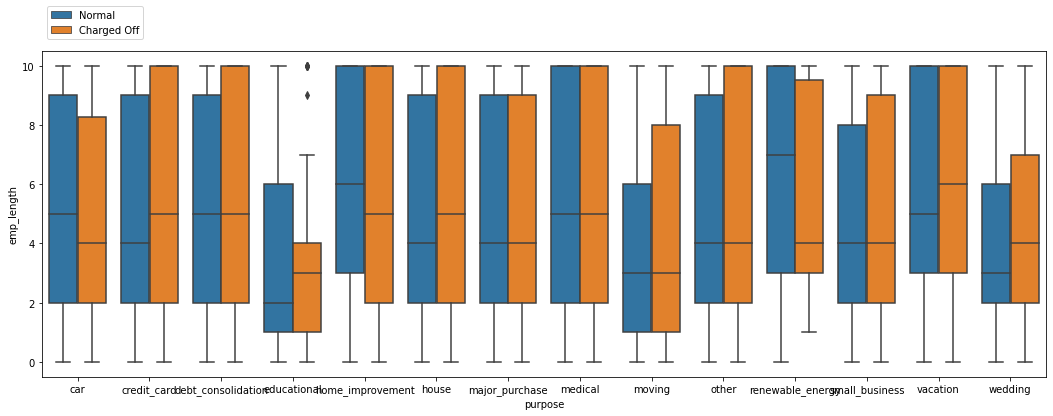

Charged Off Borrower's with purpose as debt_consolidation have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with purpose as credit_card have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with purpose as other have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with purpose as home_improvement have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with purpose as major_purchase have emp_length ranges between 2.0 and 9.0

Charged Off Borrower's with purpose as small_business have emp_length ranges between 2.0 and 9.0

Charged Off Borrower's with purpose as car have emp_length ranges between 2.0 and 8.25

Charged Off Borrower's with purpose as wedding have emp_length ranges between 2.0 and 7.0

Charged Off Borrower's with purpose as medical have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with purpose as moving have emp_length ranges between 1.0 and 8.0

Charged Off Borrower's with purpose as vacation have 

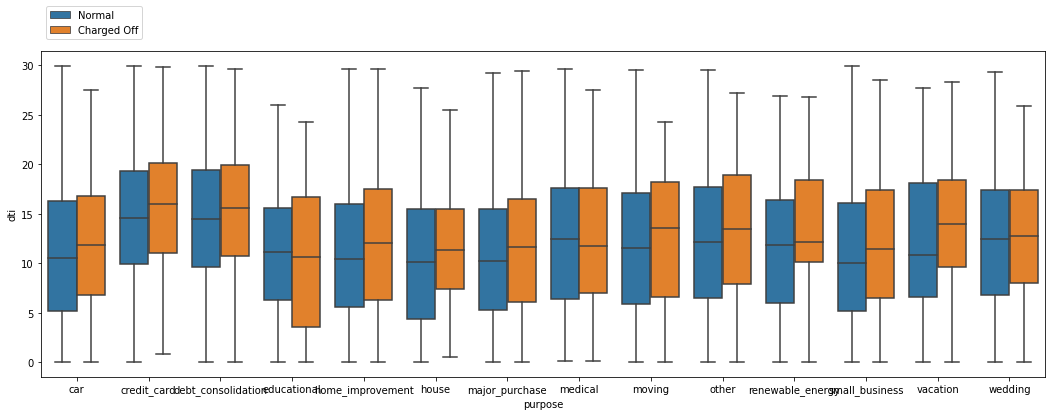

Charged Off Borrower's with purpose as debt_consolidation have dti ranges between 10.77 and 19.96

Charged Off Borrower's with purpose as credit_card have dti ranges between 10.98 and 20.17

Charged Off Borrower's with purpose as other have dti ranges between 7.93 and 18.92

Charged Off Borrower's with purpose as home_improvement have dti ranges between 6.24 and 17.56

Charged Off Borrower's with purpose as major_purchase have dti ranges between 6.12 and 16.49

Charged Off Borrower's with purpose as small_business have dti ranges between 6.52 and 17.44

Charged Off Borrower's with purpose as car have dti ranges between 6.8 and 16.75

Charged Off Borrower's with purpose as wedding have dti ranges between 7.98 and 17.36

Charged Off Borrower's with purpose as medical have dti ranges between 7.0 and 17.6

Charged Off Borrower's with purpose as moving have dti ranges between 6.62 and 18.25

Charged Off Borrower's with purpose as vacation have dti ranges between 9.6 and 18.39

Charged Off B

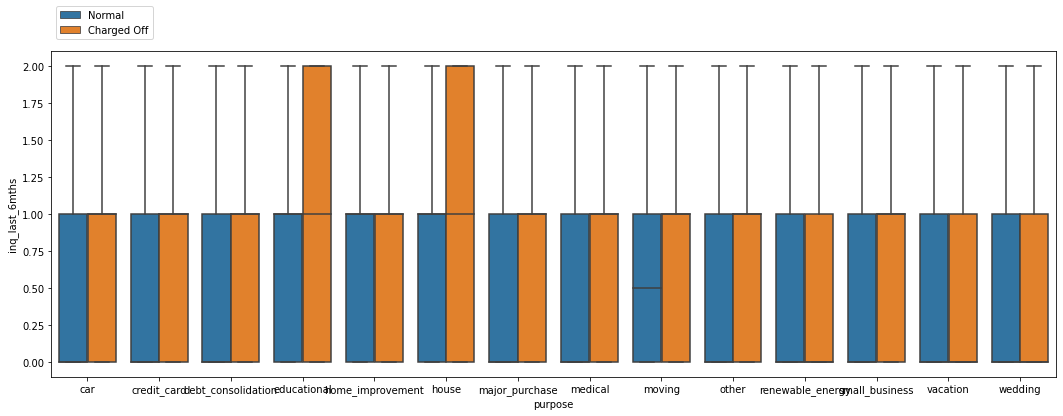

Charged Off Borrower's with purpose as debt_consolidation have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as credit_card have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as other have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as home_improvement have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as major_purchase have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as small_business have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as car have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as wedding have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as medical have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with purpose as moving have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrowe

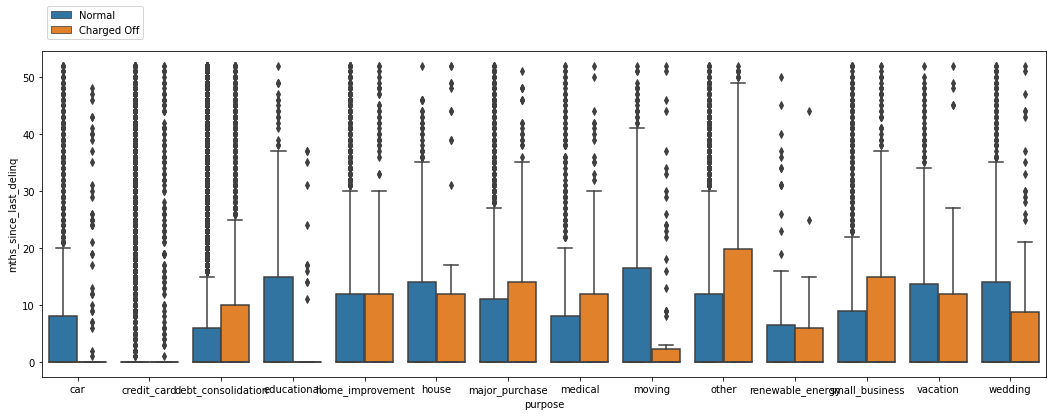

Charged Off Borrower's with purpose as debt_consolidation have mths_since_last_delinq ranges between 0.0 and 10.0

Charged Off Borrower's with purpose as credit_card have mths_since_last_delinq ranges between 0.0 and 0.0

Charged Off Borrower's with purpose as other have mths_since_last_delinq ranges between 0.0 and 19.75

Charged Off Borrower's with purpose as home_improvement have mths_since_last_delinq ranges between 0.0 and 12.0

Charged Off Borrower's with purpose as major_purchase have mths_since_last_delinq ranges between 0.0 and 14.0

Charged Off Borrower's with purpose as small_business have mths_since_last_delinq ranges between 0.0 and 15.0

Charged Off Borrower's with purpose as car have mths_since_last_delinq ranges between 0.0 and 0.0

Charged Off Borrower's with purpose as wedding have mths_since_last_delinq ranges between 0.0 and 8.75

Charged Off Borrower's with purpose as medical have mths_since_last_delinq ranges between 0.0 and 12.0

Charged Off Borrower's with purpo

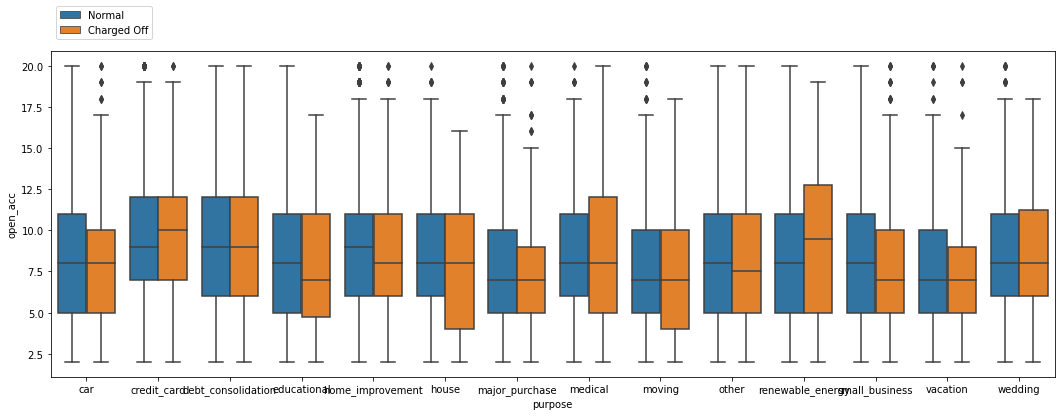

Charged Off Borrower's with purpose as debt_consolidation have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with purpose as credit_card have open_acc ranges between 7.0 and 12.0

Charged Off Borrower's with purpose as other have open_acc ranges between 5.0 and 11.0

Charged Off Borrower's with purpose as home_improvement have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with purpose as major_purchase have open_acc ranges between 5.0 and 9.0

Charged Off Borrower's with purpose as small_business have open_acc ranges between 5.0 and 10.0

Charged Off Borrower's with purpose as car have open_acc ranges between 5.0 and 10.0

Charged Off Borrower's with purpose as wedding have open_acc ranges between 6.0 and 11.25

Charged Off Borrower's with purpose as medical have open_acc ranges between 5.0 and 12.0

Charged Off Borrower's with purpose as moving have open_acc ranges between 4.0 and 10.0

Charged Off Borrower's with purpose as house have open_acc ranges bet

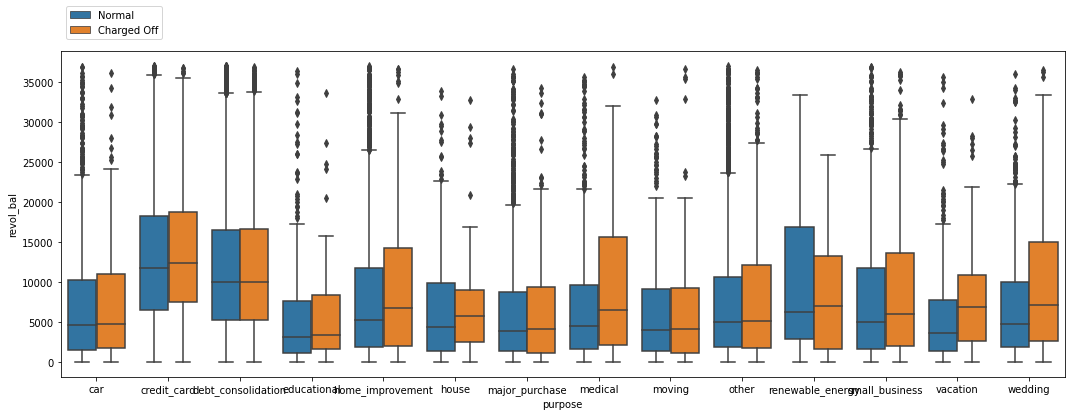

Charged Off Borrower's with purpose as debt_consolidation have revol_bal ranges between 5266.0 and 16696.0

Charged Off Borrower's with purpose as credit_card have revol_bal ranges between 7560.5 and 18800.5

Charged Off Borrower's with purpose as other have revol_bal ranges between 1820.0 and 12169.5

Charged Off Borrower's with purpose as home_improvement have revol_bal ranges between 2054.0 and 14211.25

Charged Off Borrower's with purpose as major_purchase have revol_bal ranges between 1075.0 and 9438.75

Charged Off Borrower's with purpose as small_business have revol_bal ranges between 2066.75 and 13613.75

Charged Off Borrower's with purpose as car have revol_bal ranges between 1808.0 and 10958.0

Charged Off Borrower's with purpose as wedding have revol_bal ranges between 2656.5 and 15044.0

Charged Off Borrower's with purpose as medical have revol_bal ranges between 2126.0 and 15682.0

Charged Off Borrower's with purpose as moving have revol_bal ranges between 1100.5 and 9207.

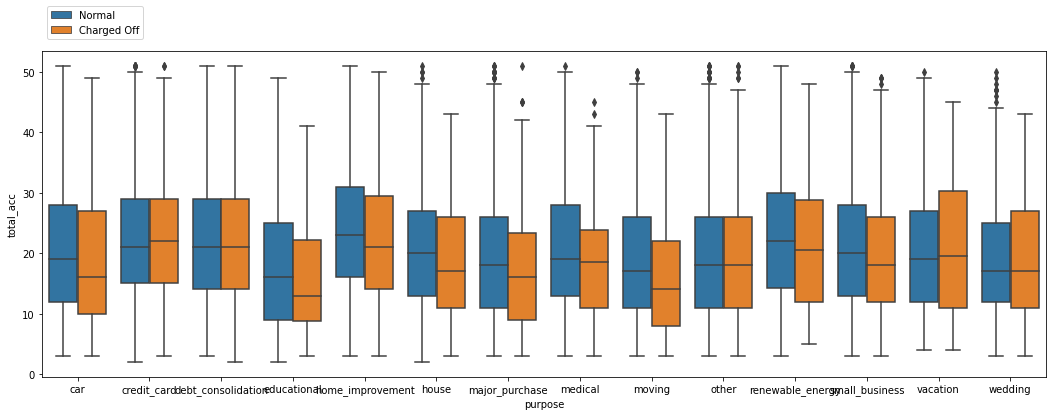

Charged Off Borrower's with purpose as debt_consolidation have total_acc ranges between 14.0 and 29.0

Charged Off Borrower's with purpose as credit_card have total_acc ranges between 15.0 and 29.0

Charged Off Borrower's with purpose as other have total_acc ranges between 11.0 and 26.0

Charged Off Borrower's with purpose as home_improvement have total_acc ranges between 14.0 and 29.5

Charged Off Borrower's with purpose as major_purchase have total_acc ranges between 9.0 and 23.25

Charged Off Borrower's with purpose as small_business have total_acc ranges between 12.0 and 26.0

Charged Off Borrower's with purpose as car have total_acc ranges between 10.0 and 27.0

Charged Off Borrower's with purpose as wedding have total_acc ranges between 11.0 and 27.0

Charged Off Borrower's with purpose as medical have total_acc ranges between 11.0 and 23.75

Charged Off Borrower's with purpose as moving have total_acc ranges between 8.0 and 22.0

Charged Off Borrower's with purpose as vacation h

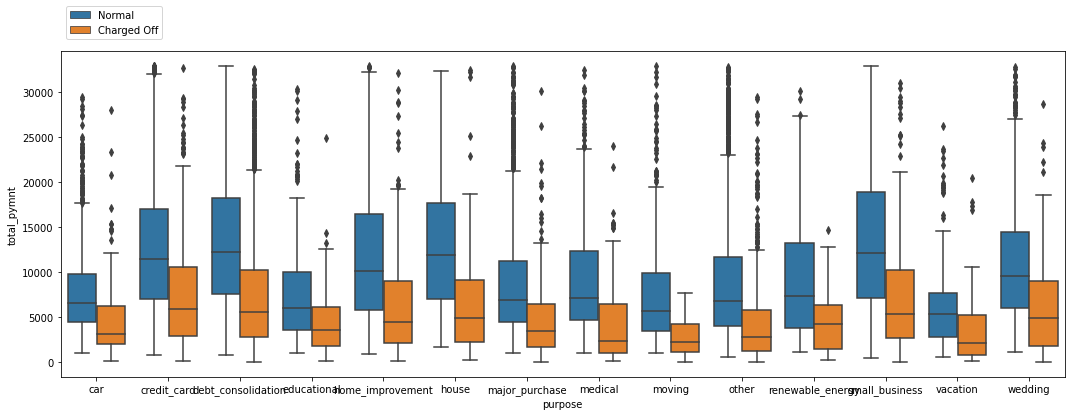

Charged Off Borrower's with purpose as debt_consolidation have total_pymnt ranges between 2790.2 and 10233.17

Charged Off Borrower's with purpose as credit_card have total_pymnt ranges between 2927.11 and 10562.83

Charged Off Borrower's with purpose as other have total_pymnt ranges between 1306.1 and 5830.77

Charged Off Borrower's with purpose as home_improvement have total_pymnt ranges between 2111.44 and 9039.17

Charged Off Borrower's with purpose as major_purchase have total_pymnt ranges between 1753.23 and 6517.47

Charged Off Borrower's with purpose as small_business have total_pymnt ranges between 2719.48 and 10245.8

Charged Off Borrower's with purpose as car have total_pymnt ranges between 2050.12 and 6235.22

Charged Off Borrower's with purpose as wedding have total_pymnt ranges between 1800.9 and 9047.97

Charged Off Borrower's with purpose as medical have total_pymnt ranges between 1004.4 and 6475.98

Charged Off Borrower's with purpose as moving have total_pymnt ranges 

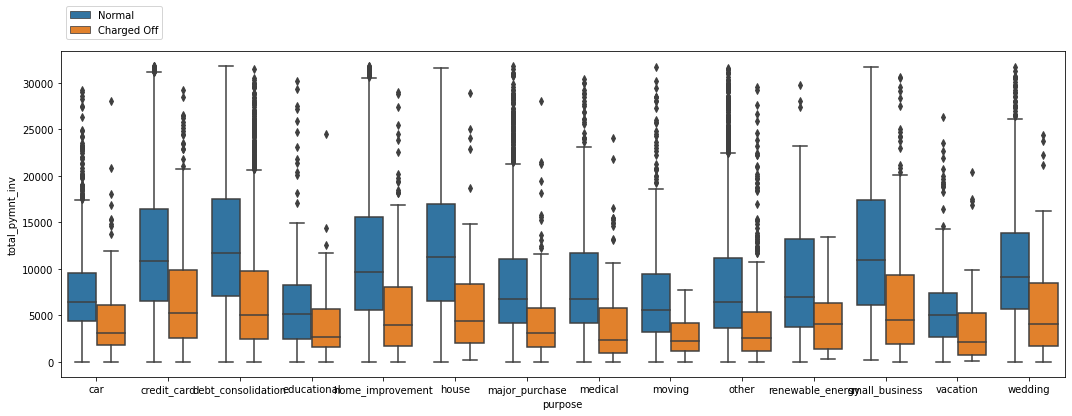

Charged Off Borrower's with purpose as debt_consolidation have total_pymnt_inv ranges between 2446.36 and 9733.96

Charged Off Borrower's with purpose as credit_card have total_pymnt_inv ranges between 2556.69 and 9865.42

Charged Off Borrower's with purpose as other have total_pymnt_inv ranges between 1152.66 and 5322.52

Charged Off Borrower's with purpose as home_improvement have total_pymnt_inv ranges between 1692.09 and 8058.49

Charged Off Borrower's with purpose as major_purchase have total_pymnt_inv ranges between 1576.28 and 5771.15

Charged Off Borrower's with purpose as small_business have total_pymnt_inv ranges between 1989.66 and 9294.7

Charged Off Borrower's with purpose as car have total_pymnt_inv ranges between 1795.65 and 6155.4

Charged Off Borrower's with purpose as wedding have total_pymnt_inv ranges between 1723.88 and 8444.1

Charged Off Borrower's with purpose as medical have total_pymnt_inv ranges between 972.53 and 5787.14

Charged Off Borrower's with purpose 

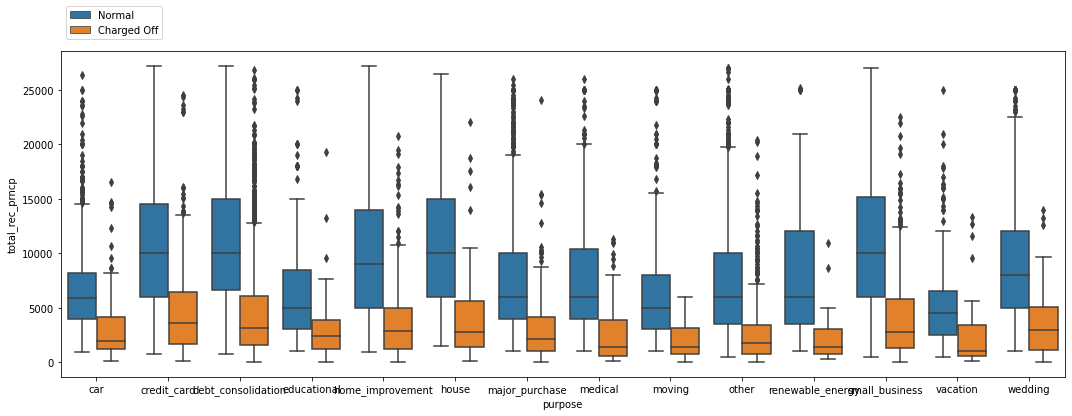

Charged Off Borrower's with purpose as debt_consolidation have total_rec_prncp ranges between 1529.16 and 6046.62

Charged Off Borrower's with purpose as credit_card have total_rec_prncp ranges between 1696.98 and 6417.11

Charged Off Borrower's with purpose as other have total_rec_prncp ranges between 745.14 and 3438.4

Charged Off Borrower's with purpose as home_improvement have total_rec_prncp ranges between 1158.56 and 5008.36

Charged Off Borrower's with purpose as major_purchase have total_rec_prncp ranges between 1010.3 and 4150.75

Charged Off Borrower's with purpose as small_business have total_rec_prncp ranges between 1285.72 and 5758.76

Charged Off Borrower's with purpose as car have total_rec_prncp ranges between 1199.46 and 4171.34

Charged Off Borrower's with purpose as wedding have total_rec_prncp ranges between 1104.89 and 5093.31

Charged Off Borrower's with purpose as medical have total_rec_prncp ranges between 596.81 and 3883.04

Charged Off Borrower's with purpose 

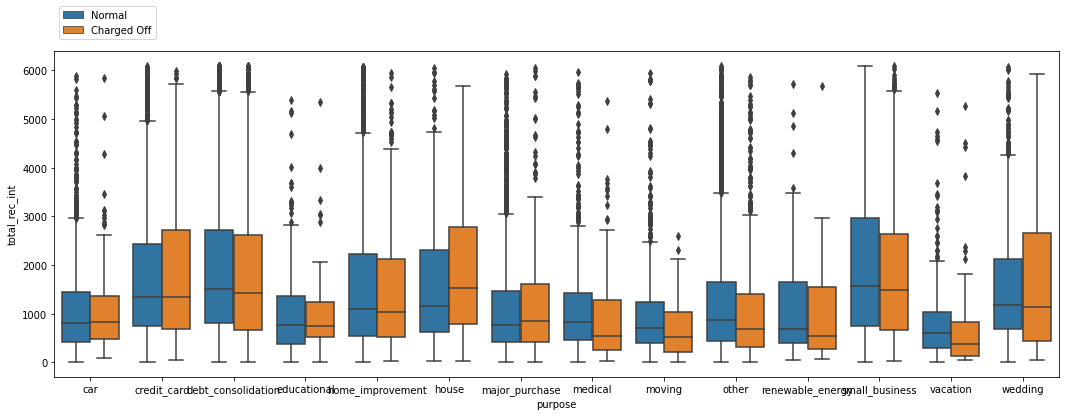

Charged Off Borrower's with purpose as debt_consolidation have total_rec_int ranges between 672.32 and 2623.85

Charged Off Borrower's with purpose as credit_card have total_rec_int ranges between 683.03 and 2718.94

Charged Off Borrower's with purpose as other have total_rec_int ranges between 318.03 and 1404.66

Charged Off Borrower's with purpose as home_improvement have total_rec_int ranges between 530.03 and 2113.6

Charged Off Borrower's with purpose as major_purchase have total_rec_int ranges between 415.76 and 1617.98

Charged Off Borrower's with purpose as small_business have total_rec_int ranges between 660.7 and 2630.42

Charged Off Borrower's with purpose as car have total_rec_int ranges between 478.61 and 1361.75

Charged Off Borrower's with purpose as wedding have total_rec_int ranges between 437.41 and 2659.86

Charged Off Borrower's with purpose as medical have total_rec_int ranges between 244.76 and 1272.82

Charged Off Borrower's with purpose as moving have total_rec_

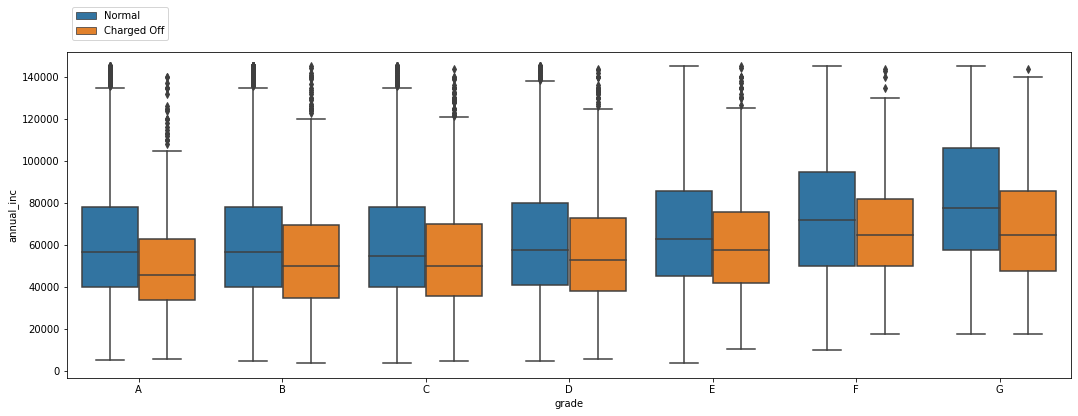

Charged Off Borrower's with grade as B have annual_inc ranges between 35004.0 and 69508.0

Charged Off Borrower's with grade as A have annual_inc ranges between 33804.0 and 63000.0

Charged Off Borrower's with grade as C have annual_inc ranges between 36000.0 and 70000.0

Charged Off Borrower's with grade as D have annual_inc ranges between 38000.0 and 73000.0

Charged Off Borrower's with grade as E have annual_inc ranges between 42000.0 and 75600.0

Charged Off Borrower's with grade as F have annual_inc ranges between 50000.0 and 82000.0

Charged Off Borrower's with grade as G have annual_inc ranges between 47750.0 and 85825.0



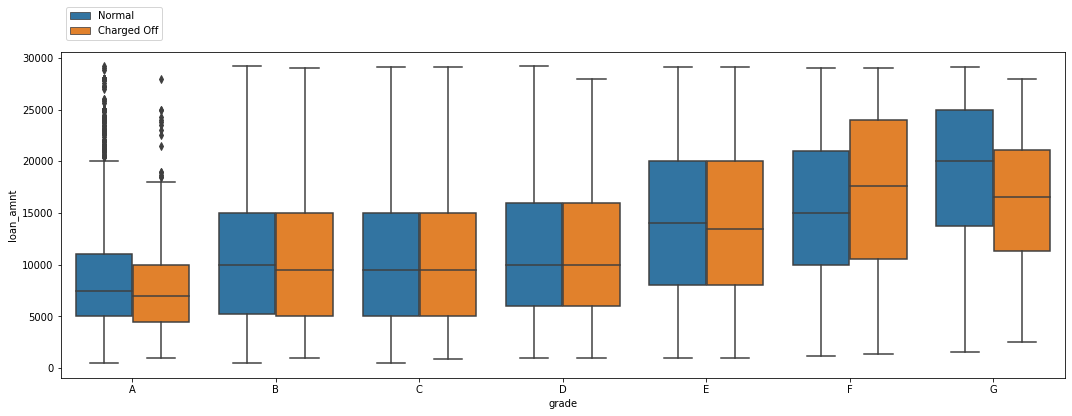

Charged Off Borrower's with grade as B have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with grade as A have loan_amnt ranges between 4500.0 and 10000.0

Charged Off Borrower's with grade as C have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with grade as D have loan_amnt ranges between 6000.0 and 16000.0

Charged Off Borrower's with grade as E have loan_amnt ranges between 8000.0 and 20000.0

Charged Off Borrower's with grade as F have loan_amnt ranges between 10600.0 and 24000.0

Charged Off Borrower's with grade as G have loan_amnt ranges between 11375.0 and 21062.5



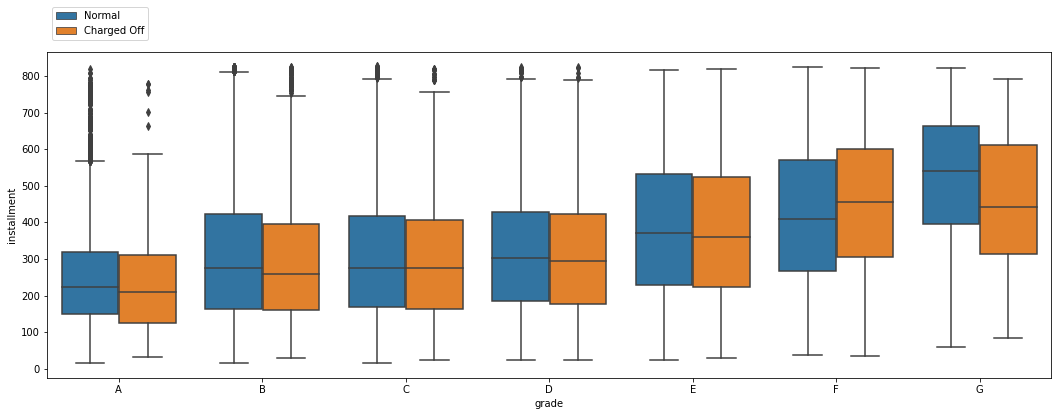

Charged Off Borrower's with grade as B have installment ranges between 161.13 and 395.66

Charged Off Borrower's with grade as A have installment ranges between 124.45 and 311.11

Charged Off Borrower's with grade as C have installment ranges between 162.74 and 407.08

Charged Off Borrower's with grade as D have installment ranges between 176.54 and 421.74

Charged Off Borrower's with grade as E have installment ranges between 222.96 and 522.88

Charged Off Borrower's with grade as F have installment ranges between 304.1 and 601.09

Charged Off Borrower's with grade as G have installment ranges between 312.91 and 611.28



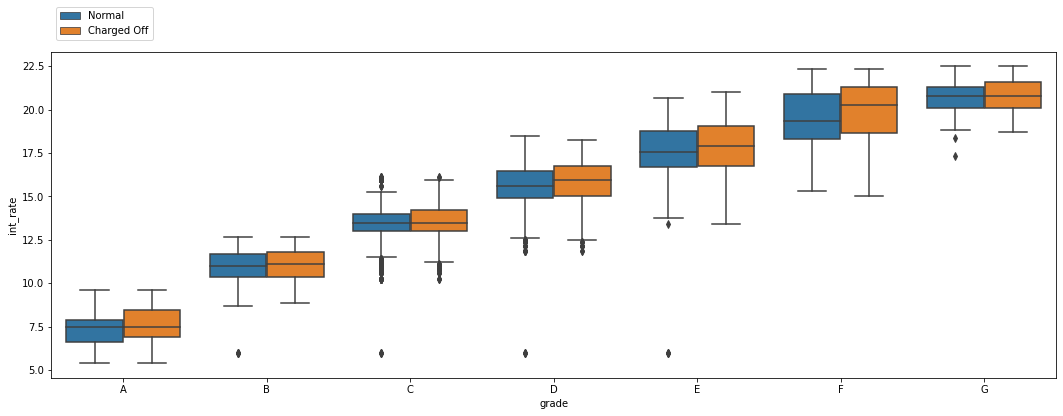

Charged Off Borrower's with grade as B have int_rate ranges between 10.38 and 11.83

Charged Off Borrower's with grade as A have int_rate ranges between 6.91 and 8.49

Charged Off Borrower's with grade as C have int_rate ranges between 12.99 and 14.22

Charged Off Borrower's with grade as D have int_rate ranges between 15.05 and 16.77

Charged Off Borrower's with grade as E have int_rate ranges between 16.77 and 19.03

Charged Off Borrower's with grade as F have int_rate ranges between 18.67 and 21.28

Charged Off Borrower's with grade as G have int_rate ranges between 20.11 and 21.59



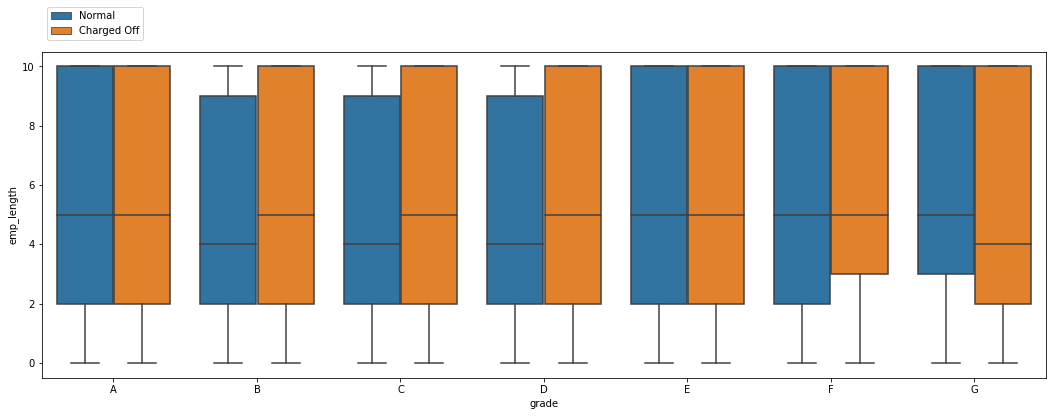

Charged Off Borrower's with grade as B have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with grade as A have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with grade as C have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with grade as D have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with grade as E have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with grade as F have emp_length ranges between 3.0 and 10.0

Charged Off Borrower's with grade as G have emp_length ranges between 2.0 and 10.0



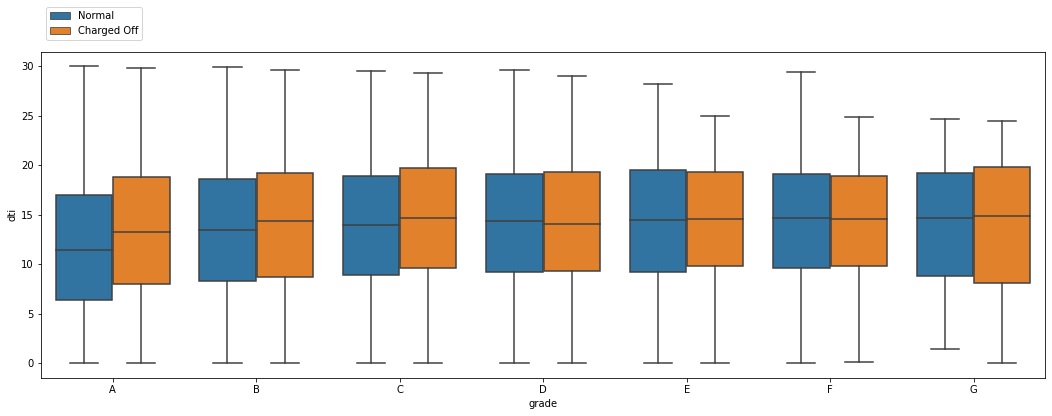

Charged Off Borrower's with grade as B have dti ranges between 8.73 and 19.22

Charged Off Borrower's with grade as A have dti ranges between 8.02 and 18.78

Charged Off Borrower's with grade as C have dti ranges between 9.57 and 19.7

Charged Off Borrower's with grade as D have dti ranges between 9.27 and 19.32

Charged Off Borrower's with grade as E have dti ranges between 9.8 and 19.3

Charged Off Borrower's with grade as F have dti ranges between 9.84 and 18.87

Charged Off Borrower's with grade as G have dti ranges between 8.08 and 19.87



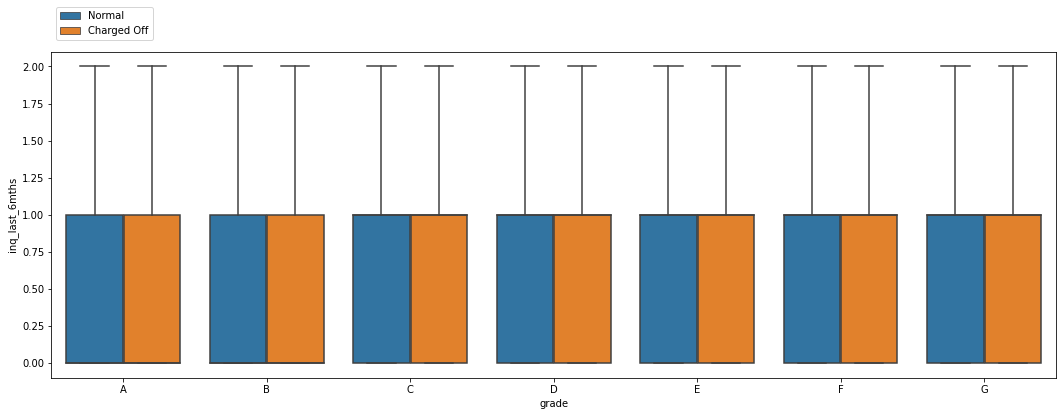

Charged Off Borrower's with grade as B have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with grade as A have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with grade as C have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with grade as D have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with grade as E have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with grade as F have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with grade as G have inq_last_6mths ranges between 0.0 and 1.0



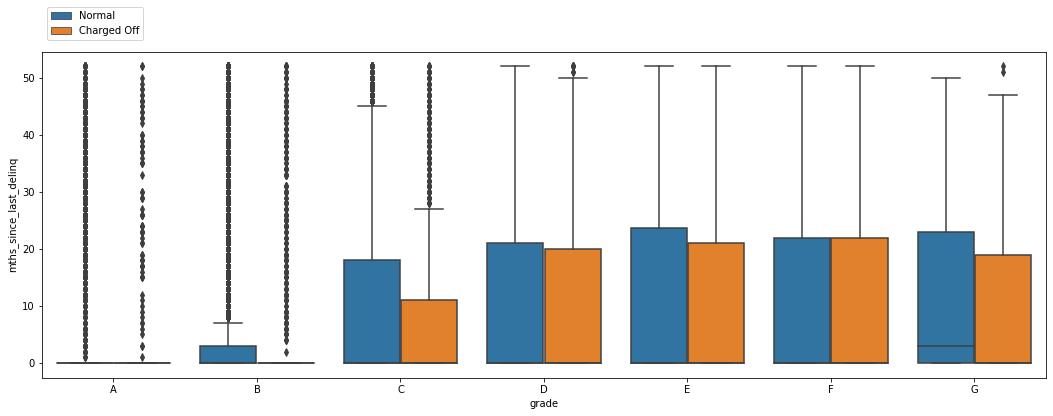

Charged Off Borrower's with grade as B have mths_since_last_delinq ranges between 0.0 and 0.0

Charged Off Borrower's with grade as A have mths_since_last_delinq ranges between 0.0 and 0.0

Charged Off Borrower's with grade as C have mths_since_last_delinq ranges between 0.0 and 11.0

Charged Off Borrower's with grade as D have mths_since_last_delinq ranges between 0.0 and 20.0

Charged Off Borrower's with grade as E have mths_since_last_delinq ranges between 0.0 and 21.0

Charged Off Borrower's with grade as F have mths_since_last_delinq ranges between 0.0 and 22.0

Charged Off Borrower's with grade as G have mths_since_last_delinq ranges between 0.0 and 19.0



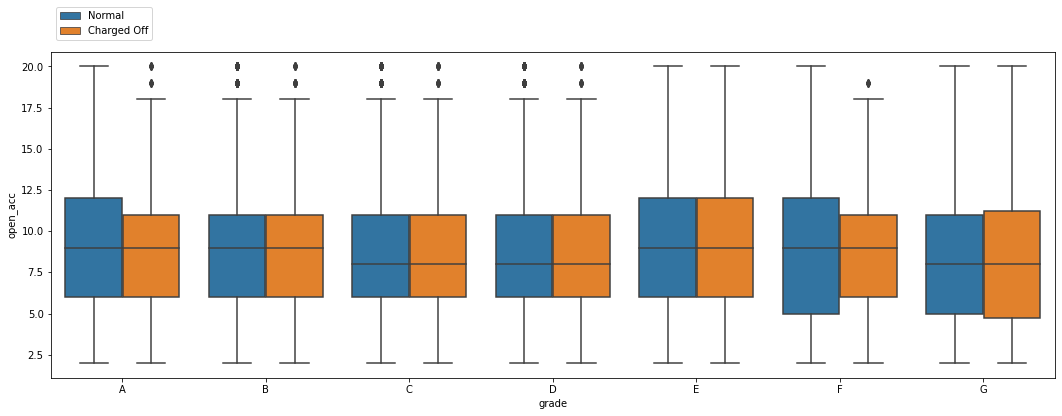

Charged Off Borrower's with grade as B have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with grade as A have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with grade as C have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with grade as D have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with grade as E have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with grade as F have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with grade as G have open_acc ranges between 4.75 and 11.25



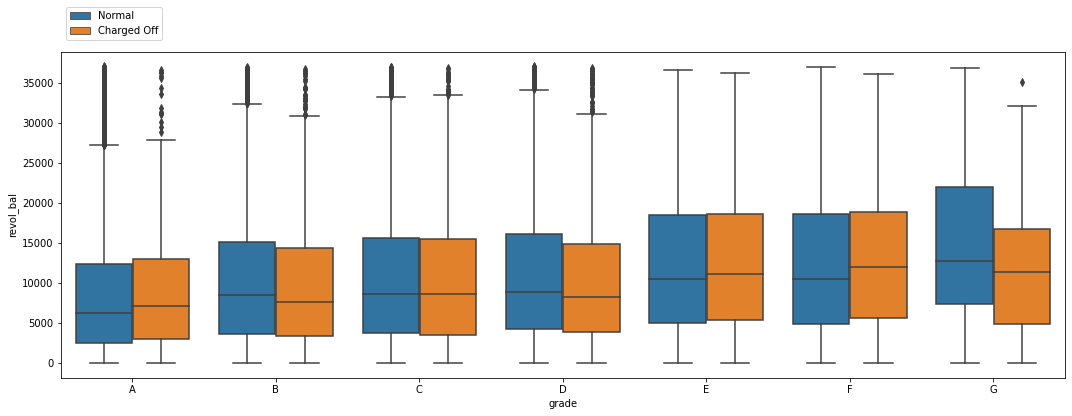

Charged Off Borrower's with grade as B have revol_bal ranges between 3327.0 and 14406.0

Charged Off Borrower's with grade as A have revol_bal ranges between 2972.25 and 13069.25

Charged Off Borrower's with grade as C have revol_bal ranges between 3468.5 and 15481.0

Charged Off Borrower's with grade as D have revol_bal ranges between 3864.0 and 14881.0

Charged Off Borrower's with grade as E have revol_bal ranges between 5378.0 and 18632.5

Charged Off Borrower's with grade as F have revol_bal ranges between 5678.5 and 18914.0

Charged Off Borrower's with grade as G have revol_bal ranges between 4889.0 and 16736.5



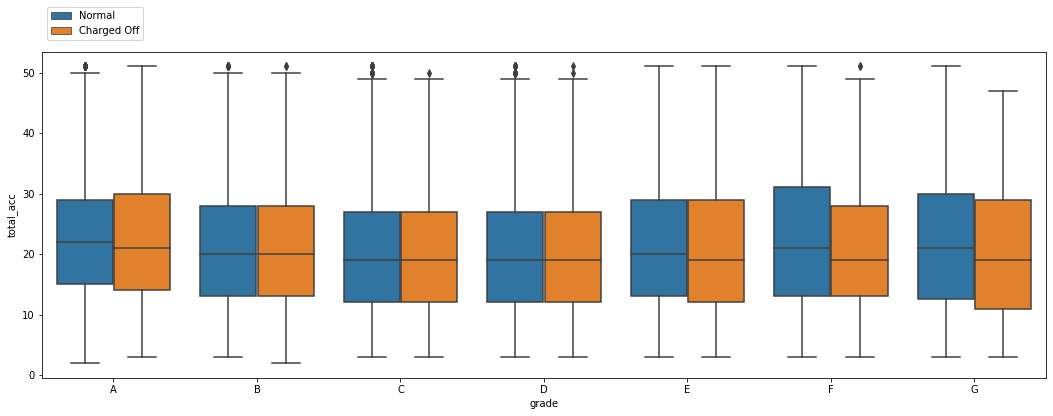

Charged Off Borrower's with grade as B have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with grade as A have total_acc ranges between 14.0 and 30.0

Charged Off Borrower's with grade as C have total_acc ranges between 12.0 and 27.0

Charged Off Borrower's with grade as D have total_acc ranges between 12.0 and 27.0

Charged Off Borrower's with grade as E have total_acc ranges between 12.0 and 29.0

Charged Off Borrower's with grade as F have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with grade as G have total_acc ranges between 11.0 and 29.0



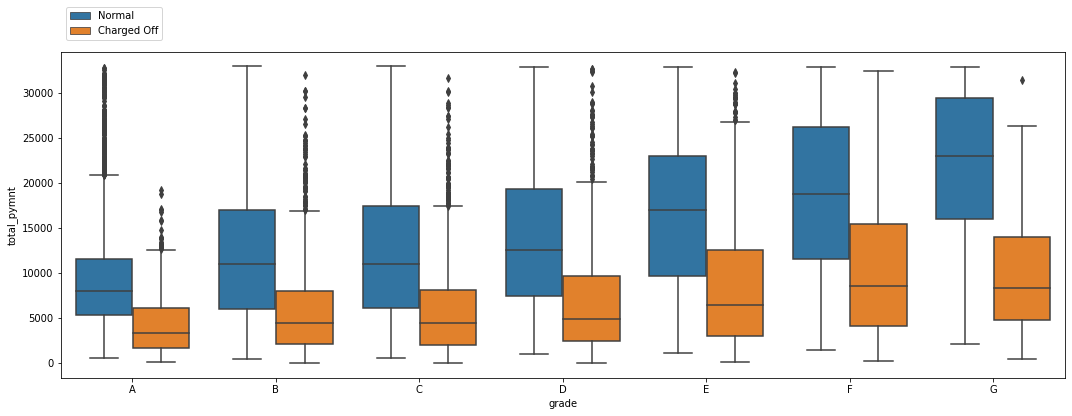

Charged Off Borrower's with grade as B have total_pymnt ranges between 2109.97 and 8063.7

Charged Off Borrower's with grade as A have total_pymnt ranges between 1717.69 and 6114.44

Charged Off Borrower's with grade as C have total_pymnt ranges between 1987.01 and 8186.39

Charged Off Borrower's with grade as D have total_pymnt ranges between 2451.85 and 9649.63

Charged Off Borrower's with grade as E have total_pymnt ranges between 3036.27 and 12600.78

Charged Off Borrower's with grade as F have total_pymnt ranges between 4143.76 and 15527.72

Charged Off Borrower's with grade as G have total_pymnt ranges between 4864.44 and 14025.54



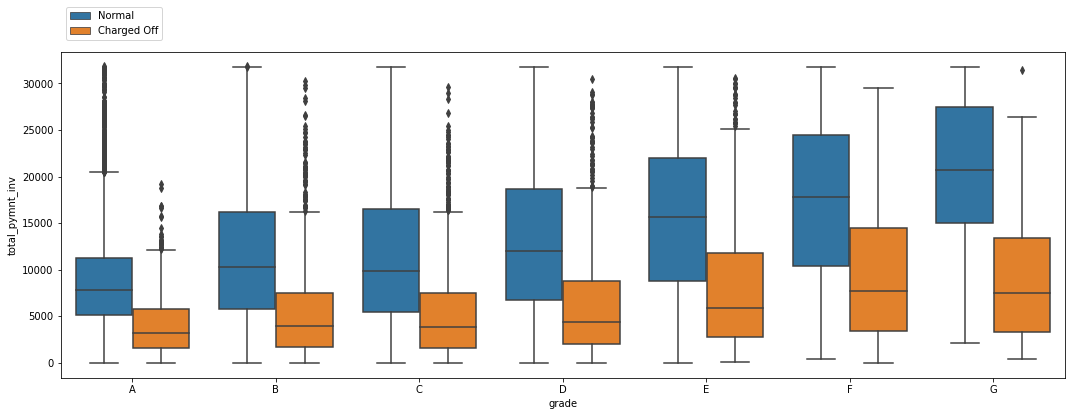

Charged Off Borrower's with grade as B have total_pymnt_inv ranges between 1743.03 and 7526.1

Charged Off Borrower's with grade as A have total_pymnt_inv ranges between 1625.85 and 5841.49

Charged Off Borrower's with grade as C have total_pymnt_inv ranges between 1621.04 and 7491.94

Charged Off Borrower's with grade as D have total_pymnt_inv ranges between 2026.04 and 8765.43

Charged Off Borrower's with grade as E have total_pymnt_inv ranges between 2832.79 and 11856.31

Charged Off Borrower's with grade as F have total_pymnt_inv ranges between 3437.29 and 14439.92

Charged Off Borrower's with grade as G have total_pymnt_inv ranges between 3286.95 and 13443.12



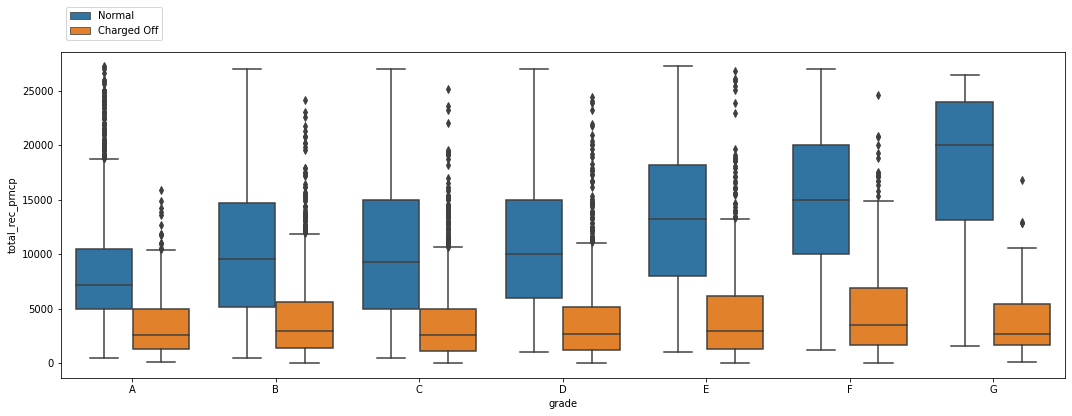

Charged Off Borrower's with grade as B have total_rec_prncp ranges between 1341.25 and 5593.7

Charged Off Borrower's with grade as A have total_rec_prncp ranges between 1261.88 and 4939.94

Charged Off Borrower's with grade as C have total_rec_prncp ranges between 1140.01 and 4945.04

Charged Off Borrower's with grade as D have total_rec_prncp ranges between 1207.66 and 5153.57

Charged Off Borrower's with grade as E have total_rec_prncp ranges between 1310.59 and 6116.0

Charged Off Borrower's with grade as F have total_rec_prncp ranges between 1625.96 and 6926.02

Charged Off Borrower's with grade as G have total_rec_prncp ranges between 1629.48 and 5403.86



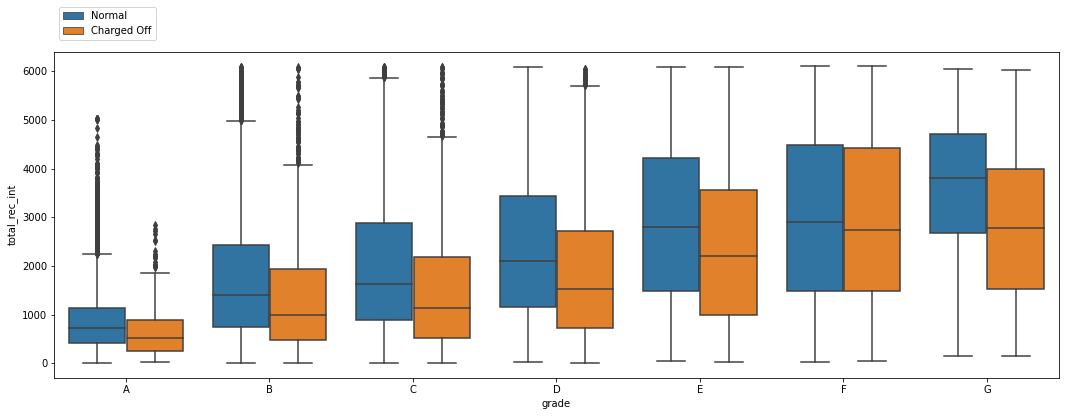

Charged Off Borrower's with grade as B have total_rec_int ranges between 486.2 and 1931.53

Charged Off Borrower's with grade as A have total_rec_int ranges between 253.02 and 890.23

Charged Off Borrower's with grade as C have total_rec_int ranges between 528.87 and 2180.65

Charged Off Borrower's with grade as D have total_rec_int ranges between 731.16 and 2723.62

Charged Off Borrower's with grade as E have total_rec_int ranges between 991.58 and 3556.85

Charged Off Borrower's with grade as F have total_rec_int ranges between 1487.72 and 4418.84

Charged Off Borrower's with grade as G have total_rec_int ranges between 1531.96 and 4000.24



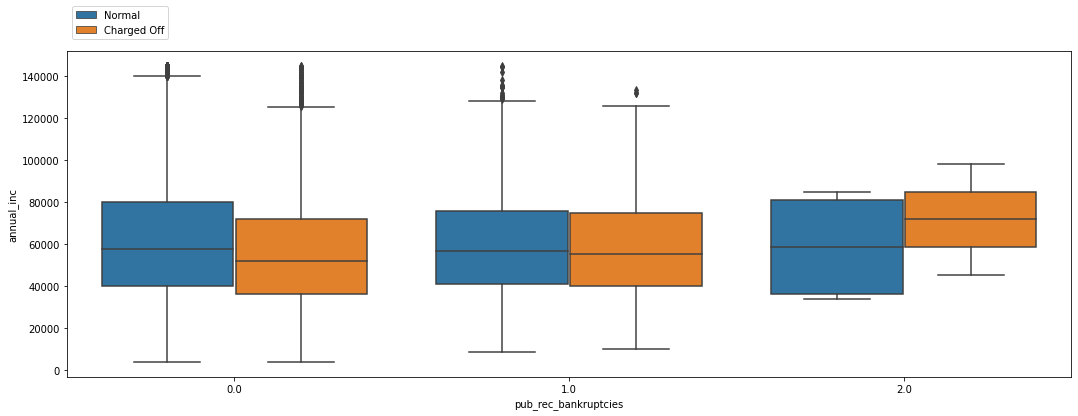

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have annual_inc ranges between 36305.0 and 71995.75

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have annual_inc ranges between 40000.0 and 75000.0

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have annual_inc ranges between 58700.0 and 84900.0



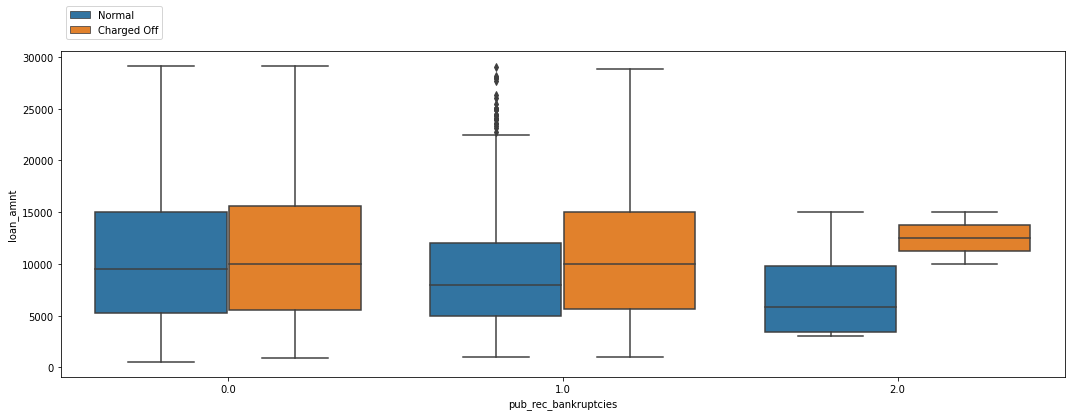

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have loan_amnt ranges between 5500.0 and 15600.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have loan_amnt ranges between 5600.0 and 15000.0

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have loan_amnt ranges between 11250.0 and 13750.0



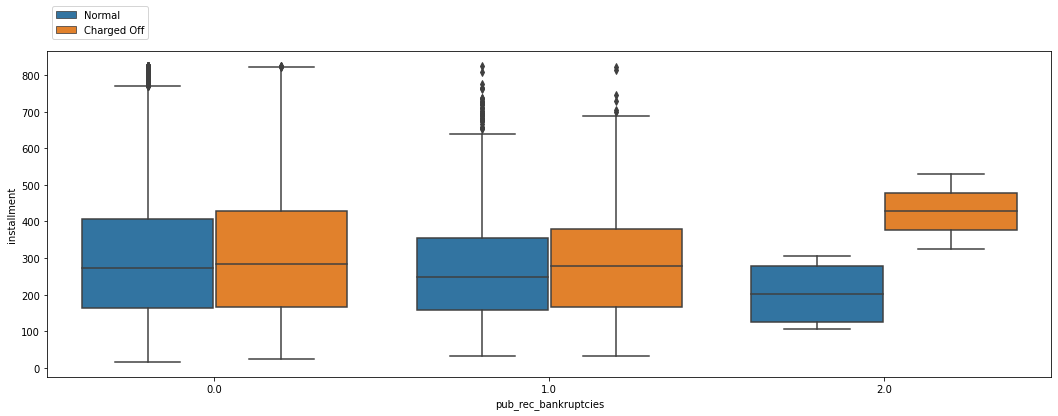

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have installment ranges between 166.96 and 429.21

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have installment ranges between 167.54 and 378.88

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have installment ranges between 375.86 and 478.84



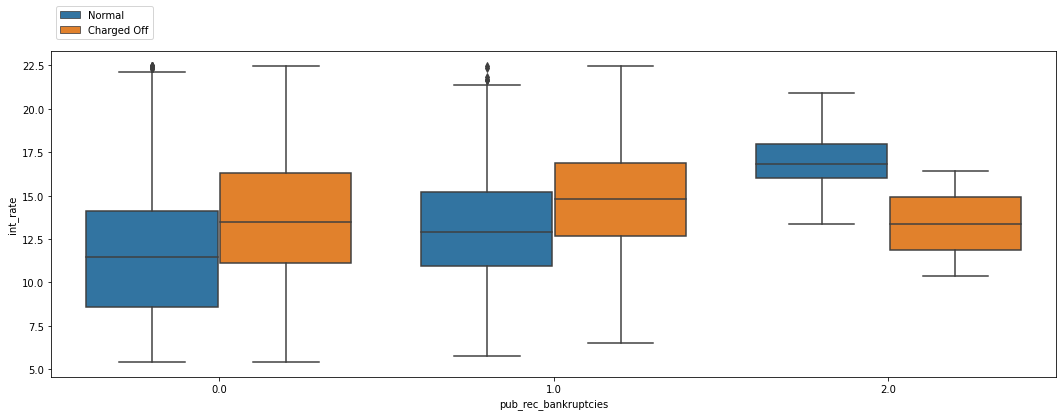

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have int_rate ranges between 11.12 and 16.32

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have int_rate ranges between 12.68 and 16.89

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have int_rate ranges between 11.87 and 14.89



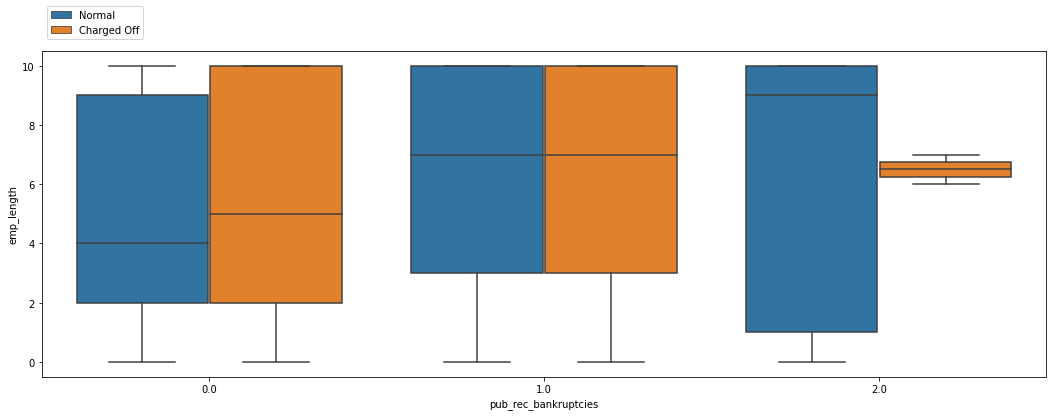

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have emp_length ranges between 3.0 and 10.0

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have emp_length ranges between 6.25 and 6.75



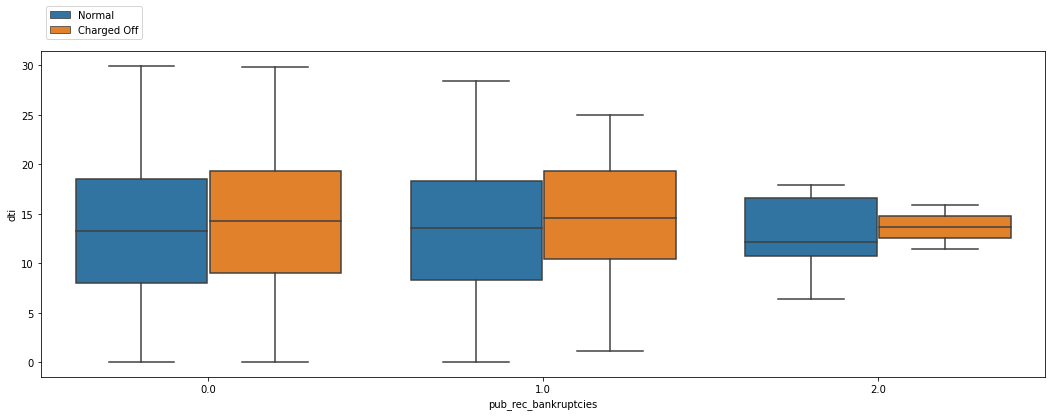

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have dti ranges between 9.03 and 19.3

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have dti ranges between 10.39 and 19.28

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have dti ranges between 12.54 and 14.79



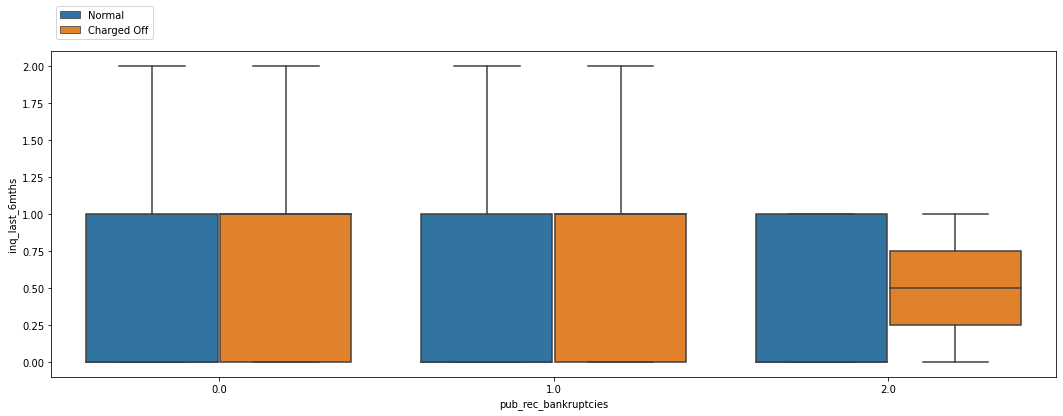

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have inq_last_6mths ranges between 0.25 and 0.75



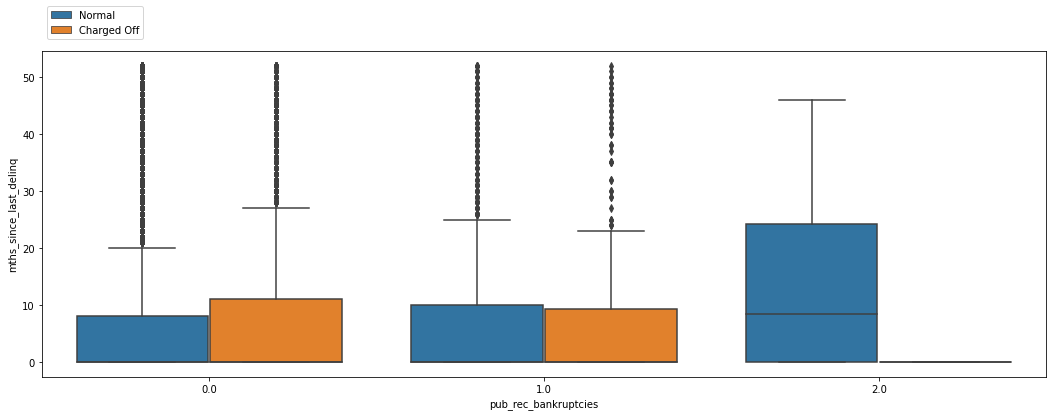

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have mths_since_last_delinq ranges between 0.0 and 11.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have mths_since_last_delinq ranges between 0.0 and 9.25

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have mths_since_last_delinq ranges between 0.0 and 0.0



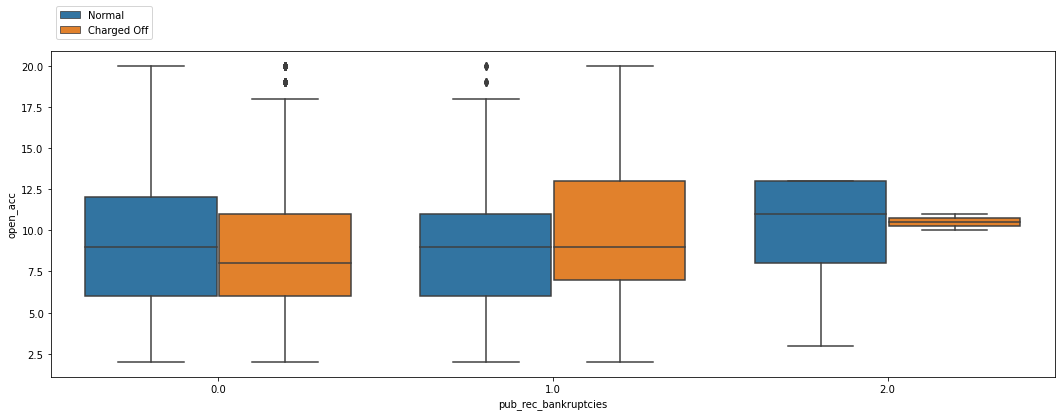

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have open_acc ranges between 7.0 and 13.0

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have open_acc ranges between 10.25 and 10.75



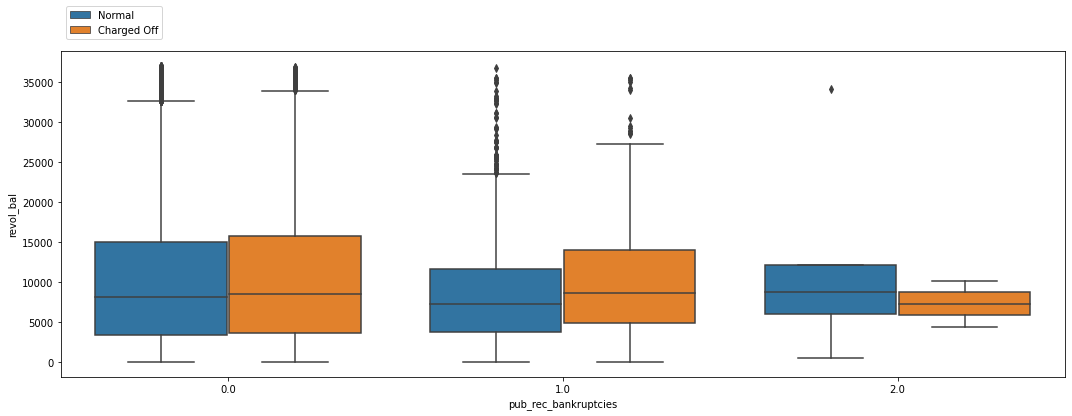

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have revol_bal ranges between 3674.5 and 15776.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have revol_bal ranges between 4871.5 and 14060.5

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have revol_bal ranges between 5853.0 and 8731.0



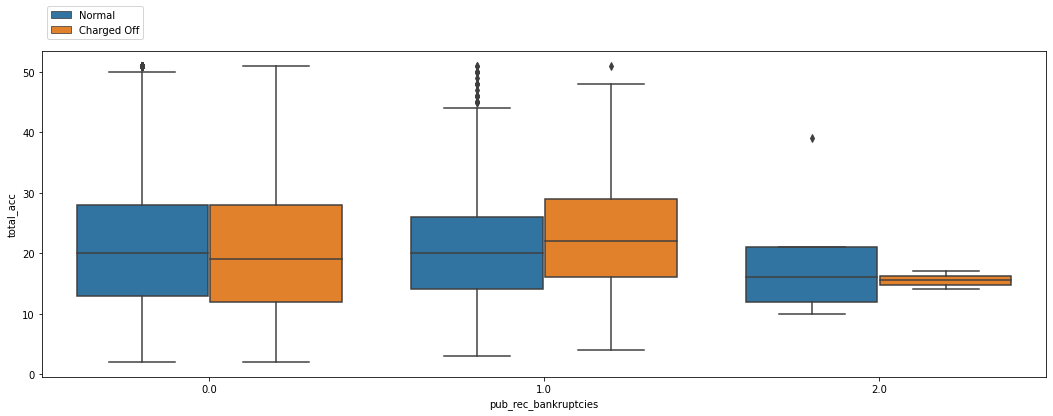

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have total_acc ranges between 12.0 and 28.0

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have total_acc ranges between 16.0 and 29.0

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have total_acc ranges between 14.75 and 16.25



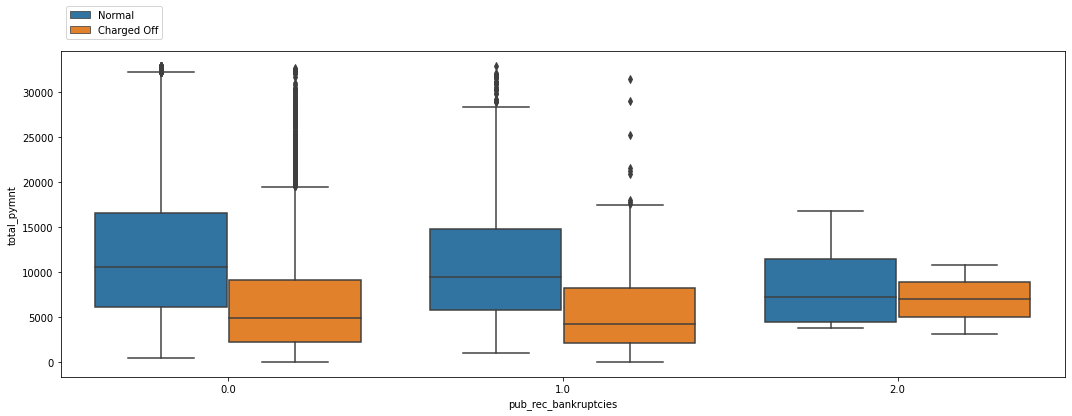

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have total_pymnt ranges between 2290.17 and 9186.57

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have total_pymnt ranges between 2134.51 and 8300.9

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have total_pymnt ranges between 5088.02 and 8914.49



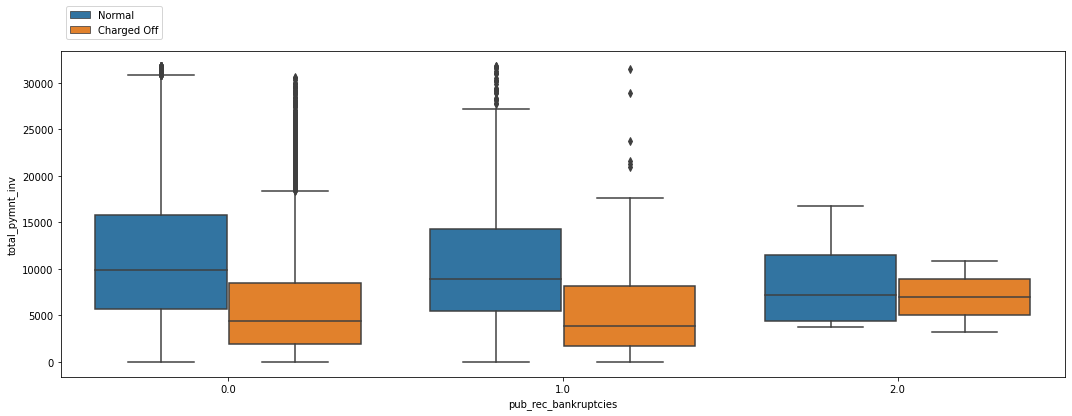

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have total_pymnt_inv ranges between 1923.82 and 8509.48

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have total_pymnt_inv ranges between 1732.51 and 8115.69

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have total_pymnt_inv ranges between 5088.02 and 8914.49



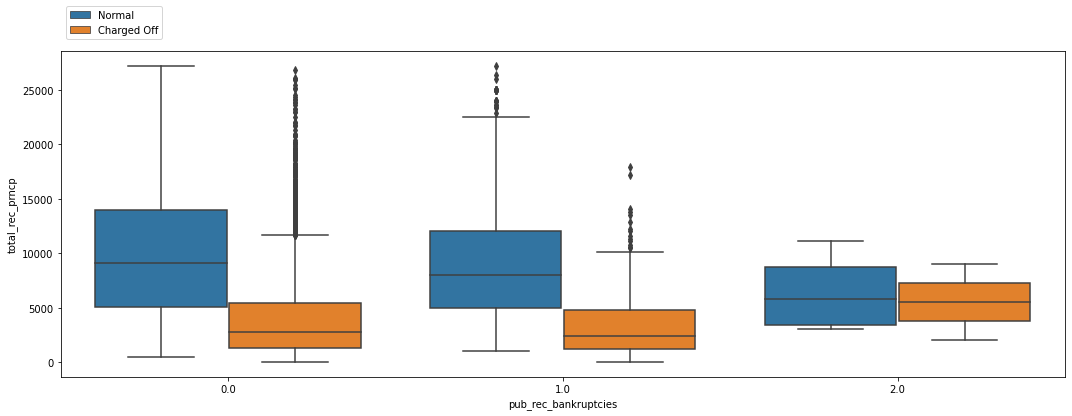

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have total_rec_prncp ranges between 1254.38 and 5409.38

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have total_rec_prncp ranges between 1155.13 and 4755.94

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have total_rec_prncp ranges between 3770.53 and 7280.94



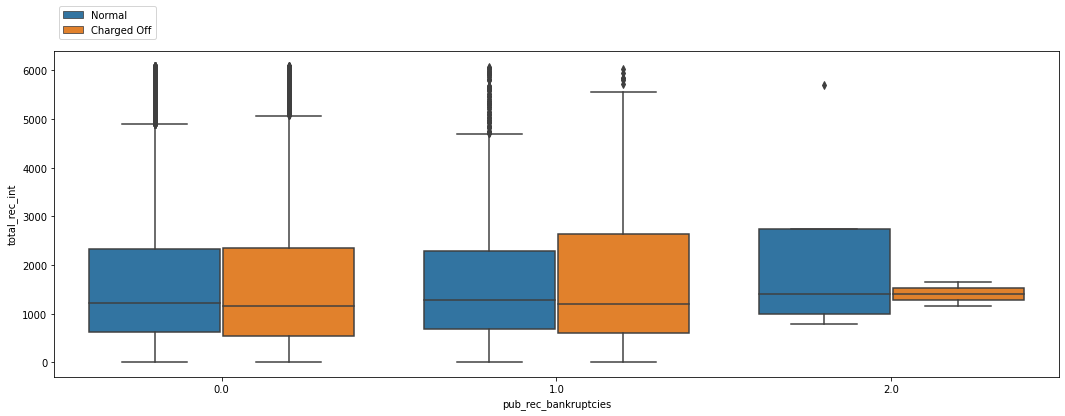

Charged Off Borrower's with pub_rec_bankruptcies as 0.0 have total_rec_int ranges between 531.42 and 2342.39

Charged Off Borrower's with pub_rec_bankruptcies as 1.0 have total_rec_int ranges between 599.93 and 2639.44

Charged Off Borrower's with pub_rec_bankruptcies as 2.0 have total_rec_int ranges between 1284.38 and 1534.23



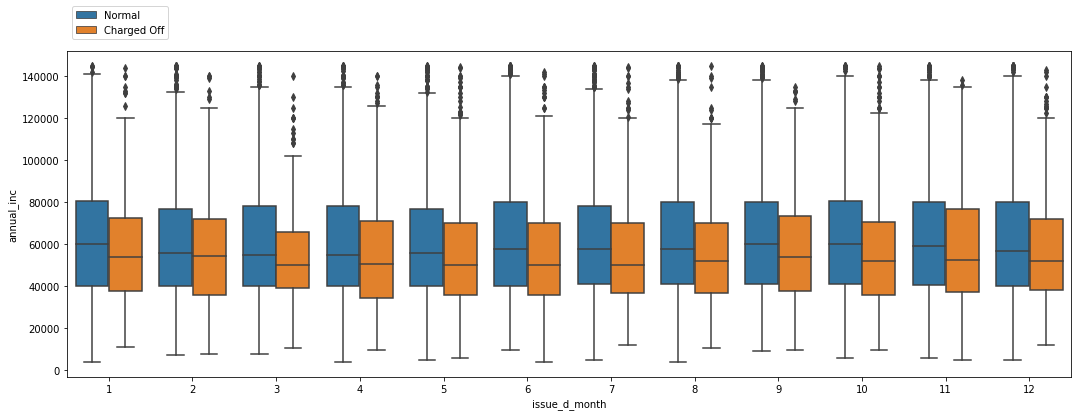

Charged Off Borrower's with issue_d_month as 12 have annual_inc ranges between 38411.94 and 72000.0

Charged Off Borrower's with issue_d_month as 11 have annual_inc ranges between 37514.9 and 76660.0

Charged Off Borrower's with issue_d_month as 10 have annual_inc ranges between 36000.0 and 70596.0

Charged Off Borrower's with issue_d_month as 9 have annual_inc ranges between 38000.0 and 73419.0

Charged Off Borrower's with issue_d_month as 8 have annual_inc ranges between 37000.0 and 70000.0

Charged Off Borrower's with issue_d_month as 7 have annual_inc ranges between 36614.8 and 70000.0

Charged Off Borrower's with issue_d_month as 6 have annual_inc ranges between 36000.0 and 70000.0

Charged Off Borrower's with issue_d_month as 5 have annual_inc ranges between 36000.0 and 70000.0

Charged Off Borrower's with issue_d_month as 4 have annual_inc ranges between 34400.0 and 71250.0

Charged Off Borrower's with issue_d_month as 3 have annual_inc ranges between 39108.0 and 66000.0

Charge

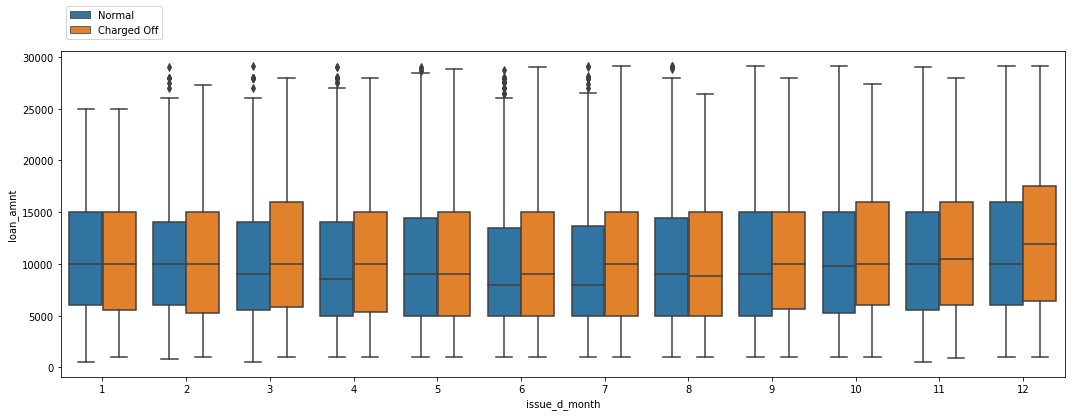

Charged Off Borrower's with issue_d_month as 12 have loan_amnt ranges between 6400.0 and 17562.5

Charged Off Borrower's with issue_d_month as 11 have loan_amnt ranges between 6000.0 and 16000.0

Charged Off Borrower's with issue_d_month as 10 have loan_amnt ranges between 6000.0 and 16000.0

Charged Off Borrower's with issue_d_month as 9 have loan_amnt ranges between 5600.0 and 15000.0

Charged Off Borrower's with issue_d_month as 8 have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with issue_d_month as 7 have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with issue_d_month as 6 have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with issue_d_month as 5 have loan_amnt ranges between 5000.0 and 15000.0

Charged Off Borrower's with issue_d_month as 4 have loan_amnt ranges between 5293.75 and 15000.0

Charged Off Borrower's with issue_d_month as 3 have loan_amnt ranges between 5850.0 and 16000.0

Charged Off Borrower's wit

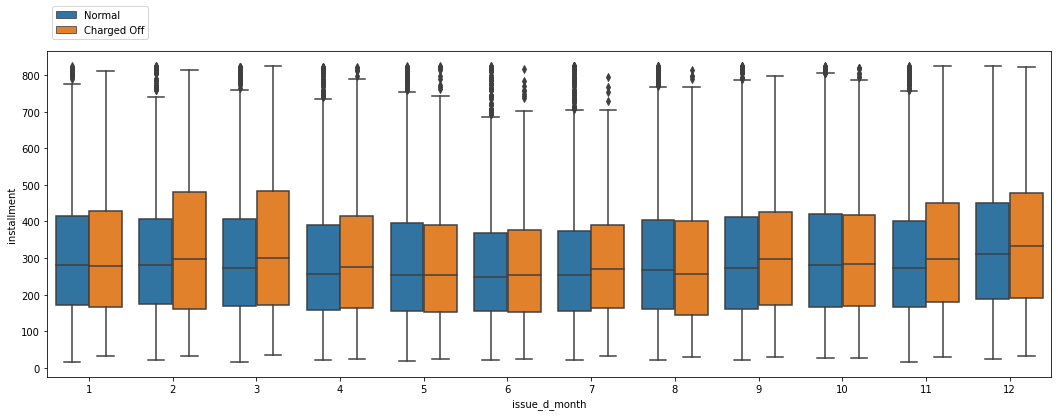

Charged Off Borrower's with issue_d_month as 12 have installment ranges between 191.17 and 478.15

Charged Off Borrower's with issue_d_month as 11 have installment ranges between 180.79 and 450.67

Charged Off Borrower's with issue_d_month as 10 have installment ranges between 168.06 and 418.38

Charged Off Borrower's with issue_d_month as 9 have installment ranges between 171.48 and 425.31

Charged Off Borrower's with issue_d_month as 8 have installment ranges between 144.74 and 400.15

Charged Off Borrower's with issue_d_month as 7 have installment ranges between 163.68 and 389.82

Charged Off Borrower's with issue_d_month as 6 have installment ranges between 152.56 and 378.08

Charged Off Borrower's with issue_d_month as 5 have installment ranges between 152.92 and 391.01

Charged Off Borrower's with issue_d_month as 4 have installment ranges between 163.96 and 415.24

Charged Off Borrower's with issue_d_month as 3 have installment ranges between 171.72 and 482.32

Charged Off Borro

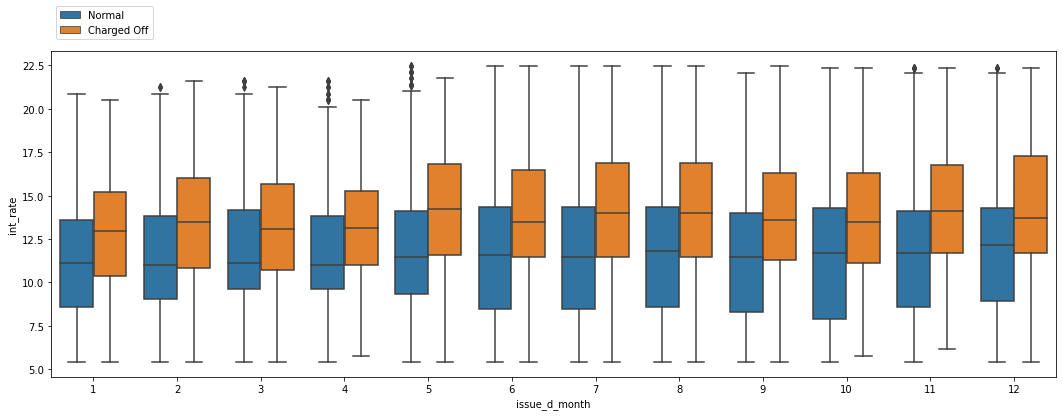

Charged Off Borrower's with issue_d_month as 12 have int_rate ranges between 11.71 and 17.27

Charged Off Borrower's with issue_d_month as 11 have int_rate ranges between 11.71 and 16.77

Charged Off Borrower's with issue_d_month as 10 have int_rate ranges between 11.14 and 16.32

Charged Off Borrower's with issue_d_month as 9 have int_rate ranges between 11.28 and 16.32

Charged Off Borrower's with issue_d_month as 8 have int_rate ranges between 11.49 and 16.86

Charged Off Borrower's with issue_d_month as 7 have int_rate ranges between 11.49 and 16.87

Charged Off Borrower's with issue_d_month as 6 have int_rate ranges between 11.49 and 16.49

Charged Off Borrower's with issue_d_month as 5 have int_rate ranges between 11.58 and 16.82

Charged Off Borrower's with issue_d_month as 4 have int_rate ranges between 10.99 and 15.28

Charged Off Borrower's with issue_d_month as 3 have int_rate ranges between 10.71 and 15.65

Charged Off Borrower's with issue_d_month as 1 have int_rate ranges

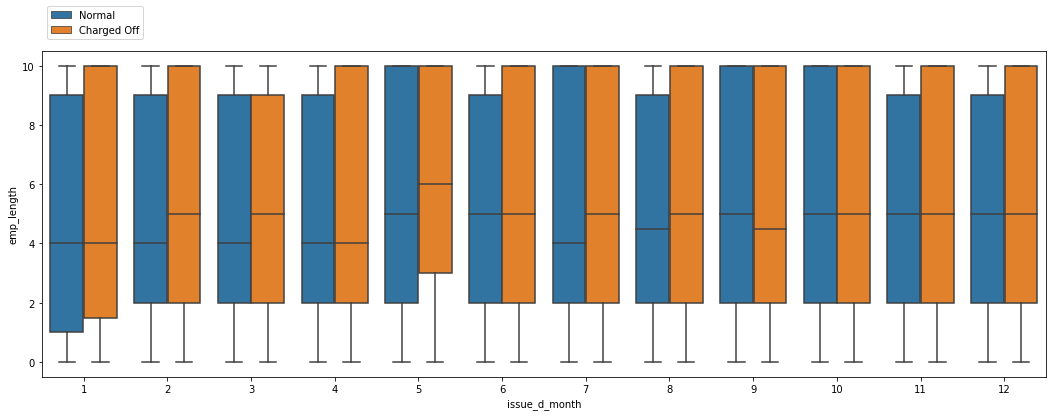

Charged Off Borrower's with issue_d_month as 12 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 11 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 10 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 9 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 8 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 7 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 6 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 5 have emp_length ranges between 3.0 and 10.0

Charged Off Borrower's with issue_d_month as 4 have emp_length ranges between 2.0 and 10.0

Charged Off Borrower's with issue_d_month as 3 have emp_length ranges between 2.0 and 9.0

Charged Off Borrower's with issue_d_month as 1 have emp_length ranges between 

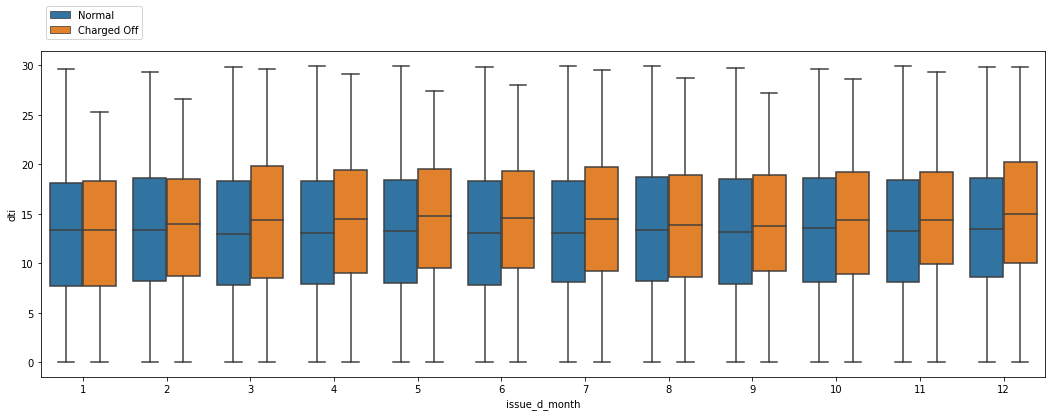

Charged Off Borrower's with issue_d_month as 12 have dti ranges between 10.0 and 20.2

Charged Off Borrower's with issue_d_month as 11 have dti ranges between 9.89 and 19.22

Charged Off Borrower's with issue_d_month as 10 have dti ranges between 8.94 and 19.27

Charged Off Borrower's with issue_d_month as 9 have dti ranges between 9.23 and 18.9

Charged Off Borrower's with issue_d_month as 8 have dti ranges between 8.65 and 18.92

Charged Off Borrower's with issue_d_month as 7 have dti ranges between 9.22 and 19.74

Charged Off Borrower's with issue_d_month as 6 have dti ranges between 9.52 and 19.31

Charged Off Borrower's with issue_d_month as 5 have dti ranges between 9.51 and 19.5

Charged Off Borrower's with issue_d_month as 4 have dti ranges between 9.05 and 19.41

Charged Off Borrower's with issue_d_month as 3 have dti ranges between 8.53 and 19.84

Charged Off Borrower's with issue_d_month as 1 have dti ranges between 7.72 and 18.32

Charged Off Borrower's with issue_d_month a

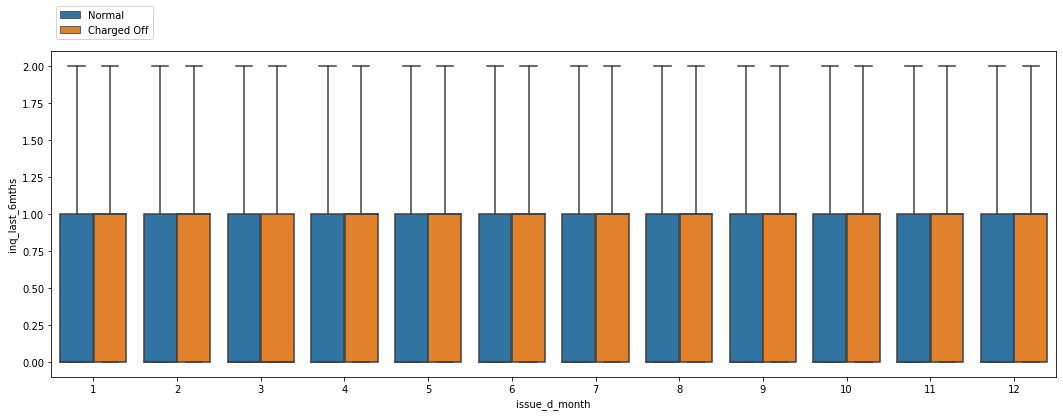

Charged Off Borrower's with issue_d_month as 12 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 11 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 10 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 9 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 7 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 8 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 6 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 5 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 4 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 3 have inq_last_6mths ranges between 0.0 and 1.0

Charged Off Borrower's with issue_d_month as 1 

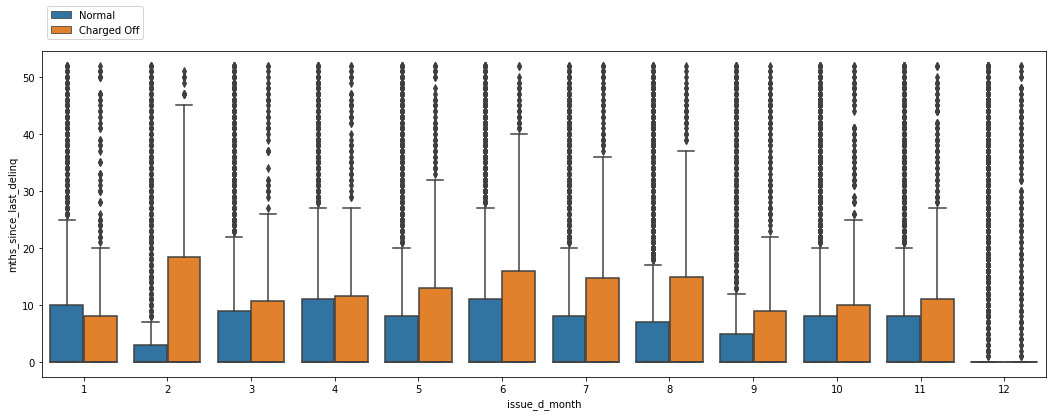

Charged Off Borrower's with issue_d_month as 12 have mths_since_last_delinq ranges between 0.0 and 0.0

Charged Off Borrower's with issue_d_month as 11 have mths_since_last_delinq ranges between 0.0 and 11.0

Charged Off Borrower's with issue_d_month as 10 have mths_since_last_delinq ranges between 0.0 and 10.0

Charged Off Borrower's with issue_d_month as 9 have mths_since_last_delinq ranges between 0.0 and 9.0

Charged Off Borrower's with issue_d_month as 8 have mths_since_last_delinq ranges between 0.0 and 15.0

Charged Off Borrower's with issue_d_month as 7 have mths_since_last_delinq ranges between 0.0 and 14.75

Charged Off Borrower's with issue_d_month as 6 have mths_since_last_delinq ranges between 0.0 and 16.0

Charged Off Borrower's with issue_d_month as 5 have mths_since_last_delinq ranges between 0.0 and 13.0

Charged Off Borrower's with issue_d_month as 4 have mths_since_last_delinq ranges between 0.0 and 11.5

Charged Off Borrower's with issue_d_month as 3 have mths_since

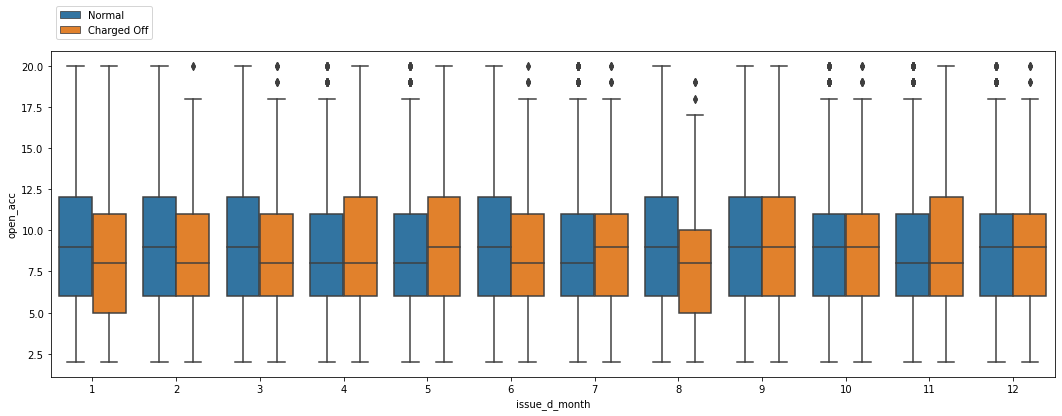

Charged Off Borrower's with issue_d_month as 12 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with issue_d_month as 11 have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with issue_d_month as 10 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with issue_d_month as 9 have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with issue_d_month as 8 have open_acc ranges between 5.0 and 10.0

Charged Off Borrower's with issue_d_month as 7 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with issue_d_month as 6 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with issue_d_month as 5 have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with issue_d_month as 4 have open_acc ranges between 6.0 and 12.0

Charged Off Borrower's with issue_d_month as 3 have open_acc ranges between 6.0 and 11.0

Charged Off Borrower's with issue_d_month as 1 have open_acc ranges between 5.0 and 11.0

Charged

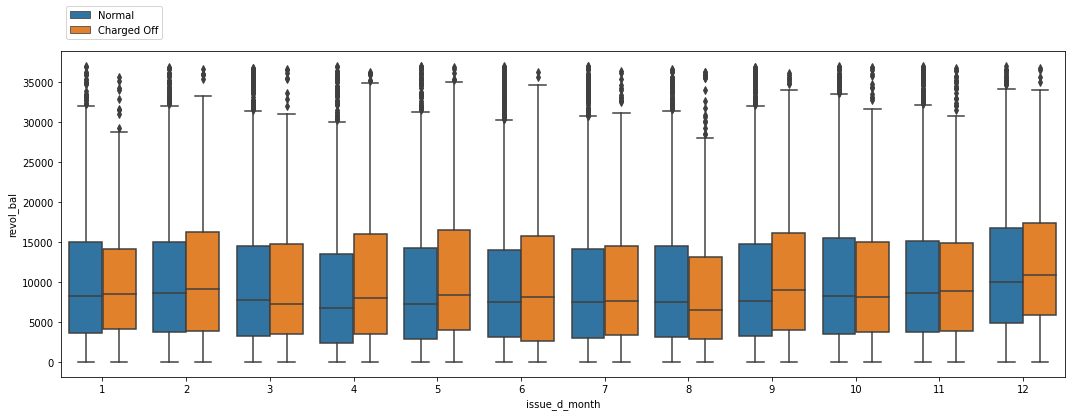

Charged Off Borrower's with issue_d_month as 12 have revol_bal ranges between 5865.5 and 17362.75

Charged Off Borrower's with issue_d_month as 11 have revol_bal ranges between 3893.0 and 14899.75

Charged Off Borrower's with issue_d_month as 10 have revol_bal ranges between 3799.0 and 15066.75

Charged Off Borrower's with issue_d_month as 9 have revol_bal ranges between 3952.0 and 16199.75

Charged Off Borrower's with issue_d_month as 8 have revol_bal ranges between 2908.0 and 13114.75

Charged Off Borrower's with issue_d_month as 7 have revol_bal ranges between 3336.75 and 14572.75

Charged Off Borrower's with issue_d_month as 6 have revol_bal ranges between 2647.25 and 15803.25

Charged Off Borrower's with issue_d_month as 5 have revol_bal ranges between 3991.0 and 16507.0

Charged Off Borrower's with issue_d_month as 4 have revol_bal ranges between 3473.0 and 16056.75

Charged Off Borrower's with issue_d_month as 3 have revol_bal ranges between 3490.75 and 14767.0

Charged Off Borr

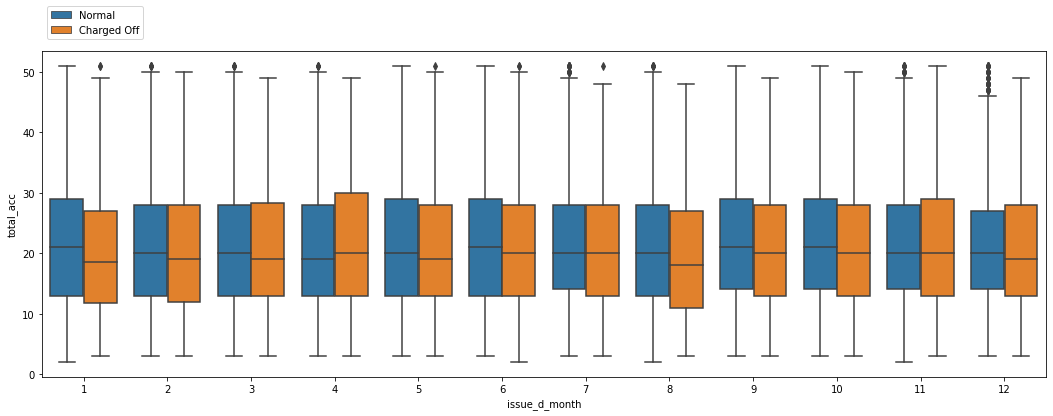

Charged Off Borrower's with issue_d_month as 12 have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with issue_d_month as 11 have total_acc ranges between 13.0 and 29.0

Charged Off Borrower's with issue_d_month as 10 have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with issue_d_month as 9 have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with issue_d_month as 8 have total_acc ranges between 11.0 and 27.0

Charged Off Borrower's with issue_d_month as 7 have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with issue_d_month as 6 have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with issue_d_month as 5 have total_acc ranges between 13.0 and 28.0

Charged Off Borrower's with issue_d_month as 4 have total_acc ranges between 13.0 and 30.0

Charged Off Borrower's with issue_d_month as 3 have total_acc ranges between 13.0 and 28.25

Charged Off Borrower's with issue_d_month as 1 have total_acc ranges between

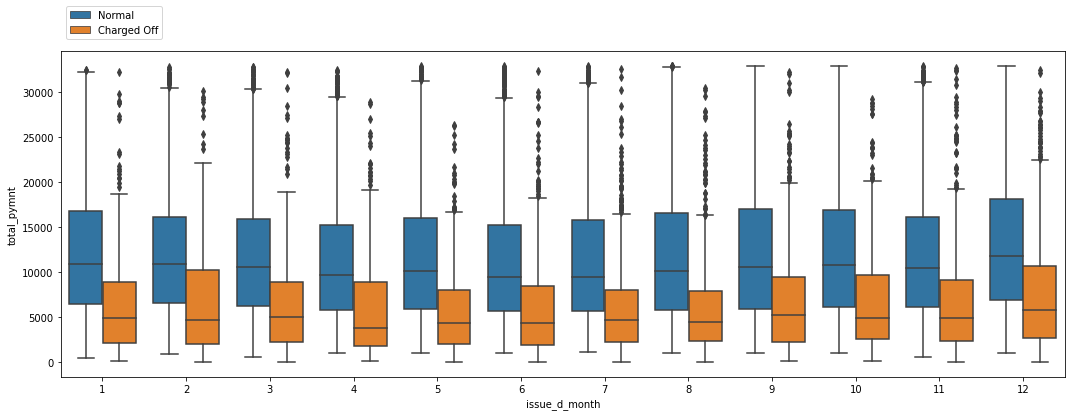

Charged Off Borrower's with issue_d_month as 12 have total_pymnt ranges between 2724.94 and 10689.68

Charged Off Borrower's with issue_d_month as 11 have total_pymnt ranges between 2429.07 and 9188.49

Charged Off Borrower's with issue_d_month as 10 have total_pymnt ranges between 2624.93 and 9698.72

Charged Off Borrower's with issue_d_month as 9 have total_pymnt ranges between 2255.85 and 9435.45

Charged Off Borrower's with issue_d_month as 7 have total_pymnt ranges between 2279.84 and 8003.34

Charged Off Borrower's with issue_d_month as 8 have total_pymnt ranges between 2372.75 and 7980.14

Charged Off Borrower's with issue_d_month as 6 have total_pymnt ranges between 1959.86 and 8513.27

Charged Off Borrower's with issue_d_month as 5 have total_pymnt ranges between 2026.04 and 7988.55

Charged Off Borrower's with issue_d_month as 4 have total_pymnt ranges between 1830.95 and 8933.41

Charged Off Borrower's with issue_d_month as 3 have total_pymnt ranges between 2271.0 and 8977.6

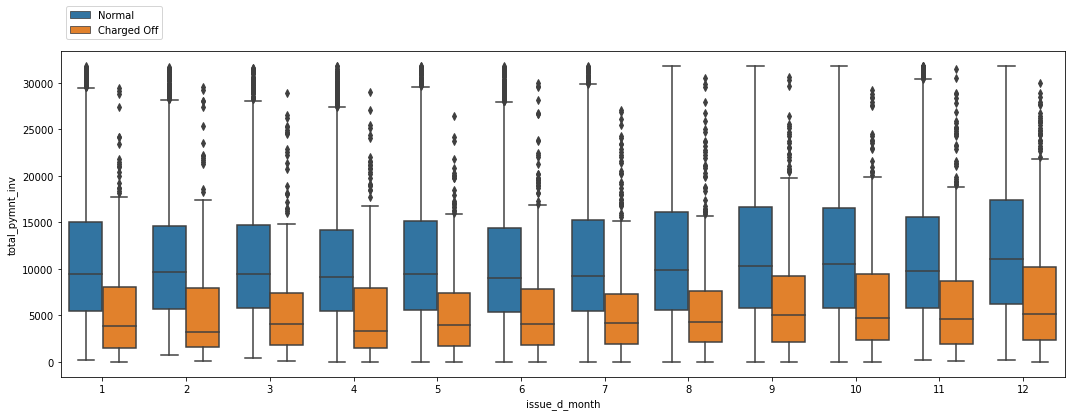

Charged Off Borrower's with issue_d_month as 12 have total_pymnt_inv ranges between 2360.85 and 10194.03

Charged Off Borrower's with issue_d_month as 11 have total_pymnt_inv ranges between 1937.76 and 8753.25

Charged Off Borrower's with issue_d_month as 10 have total_pymnt_inv ranges between 2397.99 and 9403.04

Charged Off Borrower's with issue_d_month as 9 have total_pymnt_inv ranges between 2158.21 and 9250.46

Charged Off Borrower's with issue_d_month as 7 have total_pymnt_inv ranges between 1926.44 and 7315.35

Charged Off Borrower's with issue_d_month as 8 have total_pymnt_inv ranges between 2157.23 and 7604.99

Charged Off Borrower's with issue_d_month as 6 have total_pymnt_inv ranges between 1865.28 and 7880.34

Charged Off Borrower's with issue_d_month as 5 have total_pymnt_inv ranges between 1696.76 and 7391.69

Charged Off Borrower's with issue_d_month as 4 have total_pymnt_inv ranges between 1459.59 and 7921.48

Charged Off Borrower's with issue_d_month as 3 have total_py

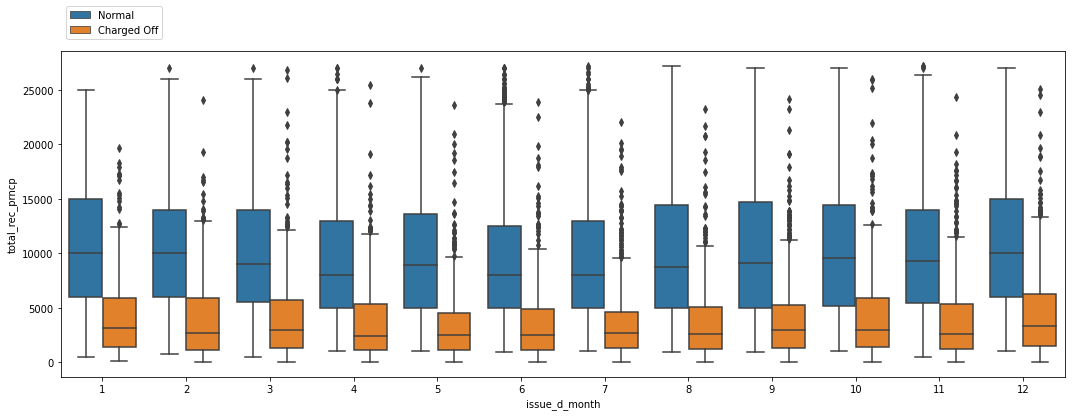

Charged Off Borrower's with issue_d_month as 12 have total_rec_prncp ranges between 1513.34 and 6278.49

Charged Off Borrower's with issue_d_month as 11 have total_rec_prncp ranges between 1244.93 and 5380.16

Charged Off Borrower's with issue_d_month as 10 have total_rec_prncp ranges between 1404.12 and 5918.72

Charged Off Borrower's with issue_d_month as 9 have total_rec_prncp ranges between 1277.29 and 5261.79

Charged Off Borrower's with issue_d_month as 7 have total_rec_prncp ranges between 1265.36 and 4597.34

Charged Off Borrower's with issue_d_month as 8 have total_rec_prncp ranges between 1166.69 and 5088.32

Charged Off Borrower's with issue_d_month as 6 have total_rec_prncp ranges between 1075.24 and 4835.48

Charged Off Borrower's with issue_d_month as 5 have total_rec_prncp ranges between 1076.46 and 4529.1

Charged Off Borrower's with issue_d_month as 4 have total_rec_prncp ranges between 1081.75 and 5368.87

Charged Off Borrower's with issue_d_month as 3 have total_rec_

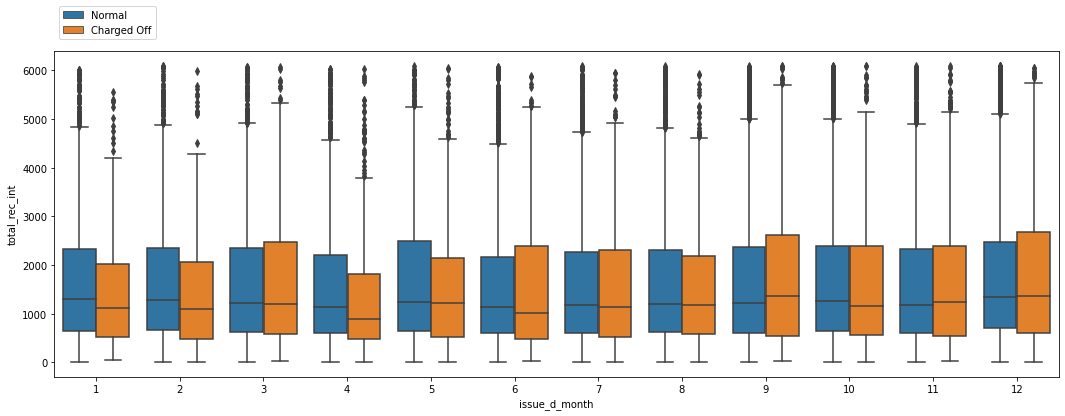

Charged Off Borrower's with issue_d_month as 12 have total_rec_int ranges between 594.04 and 2674.44

Charged Off Borrower's with issue_d_month as 11 have total_rec_int ranges between 542.41 and 2386.55

Charged Off Borrower's with issue_d_month as 10 have total_rec_int ranges between 553.39 and 2394.2

Charged Off Borrower's with issue_d_month as 9 have total_rec_int ranges between 531.93 and 2608.88

Charged Off Borrower's with issue_d_month as 7 have total_rec_int ranges between 511.04 and 2305.2

Charged Off Borrower's with issue_d_month as 8 have total_rec_int ranges between 577.11 and 2191.66

Charged Off Borrower's with issue_d_month as 6 have total_rec_int ranges between 485.47 and 2386.1

Charged Off Borrower's with issue_d_month as 5 have total_rec_int ranges between 523.46 and 2151.49

Charged Off Borrower's with issue_d_month as 4 have total_rec_int ranges between 480.6 and 1818.99

Charged Off Borrower's with issue_d_month as 3 have total_rec_int ranges between 577.39 and 

In [103]:
# file = open("Multivariant_Analysis.txt", "w")

# def create_categorical_boxplot(cat, num):
    
#     fig, axs = plt.subplots(ncols=1, figsize=(18,6))
#     new_df_num,q1,q3  = drop_outliers_from_series(num)   
    
    
#     new_df_num = new_df_num[new_df_num.loan_status != "Current"]
#     sns.boxplot(y=num, x=cat, hue=new_df_num["loan_status"], data=new_df_num.sort_values(cat))
#     plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')
#     plt.ylabel(num)    
#     plt.show()
    
#     charged_off = new_df_num[new_df_num.loan_status == "Charged Off"]
#     charged_off_describe = charged_off[num].describe()
#     q1_charged_off = charged_off_describe["25%"]
#     q3_charged_off = charged_off_describe["75%"]
    
    
#     file.write(f"Charged Off Borrower's {cat} and {num} range between range {q1_charged_off} and {q3_charged_off}\n")
    

#     print(f"Quantile details for {cat} and {num} are Q1 = {q1} and Q3 = {q3}\n")
#     print("######################################################################################### ")

    
#     file.write(f"Borrower's {cat} and {num} range between {q1} and {q3}\n")
    

# for col in cat_variables:
#     for num in num_variables:
#         create_categorical_boxplot(col, num)
# file.close()


file = open("Multivariant_Analysis.txt", "w")

def create_categorical_boxplot(cat, num):
    
    fig, axs = plt.subplots(ncols=1, figsize=(18,6))
    new_df_num,q1,q3  = drop_outliers_from_series(num)   
    
    
    new_df_num = new_df_num[new_df_num.loan_status != "Current"]
    sns.boxplot(y=num, x=cat, hue=new_df_num["loan_status"], data=new_df_num.sort_values(cat))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')
    plt.ylabel(num)    
    plt.show()
    
    charged_off = new_df_num[new_df_num.loan_status == "Charged Off"]
    columns = new_df_num[cat].value_counts().index.values
    for col in columns:
        multi_new_df = charged_off[df[cat] == col]
        charged_off_describe = multi_new_df[num].describe()
        q1_charged_off = round(charged_off_describe["25%"], 2)
        q3_charged_off = round(charged_off_describe["75%"], 2)

        file.write(f"""Charged Off Borrower's with {cat} as {col} have {num} ranges between {q1_charged_off} and {q3_charged_off}\n""")
        print(f"""Charged Off Borrower's with {cat} as {col} have {num} ranges between {q1_charged_off} and {q3_charged_off}\n""")

        
for col in cat_variables:
    for num in num_variables:
        create_categorical_boxplot(col, num)
file.close()



<h2><span style="color: #0000ff;">Correlation Matix Analysis</span></h2>

In [104]:
corr_variables = [ 'term', 'pub_rec_bankruptcies', 'annual_inc', 'loan_amnt', 'installment','int_rate','emp_length','dti','inq_last_6mths','mths_since_last_delinq','open_acc','revol_bal','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']

corr_variables.sort()

df[corr_variables].corr()

annual_inc       dti  emp_length  inq_last_6mths  \
annual_inc                1.000000 -0.122876    0.094267        0.034077   
dti                      -0.122876  1.000000    0.048584        0.001100   
emp_length                0.094267  0.048584    1.000000        0.006327   
inq_last_6mths            0.034077  0.001100    0.006327        1.000000   
installment               0.270627  0.054502    0.106477        0.009373   
int_rate                  0.053572  0.111522   -0.004654        0.132621   
loan_amnt                 0.270906  0.066658    0.135874        0.008906   
mths_since_last_delinq    0.017861 -0.017164    0.037994        0.012679   
open_acc                  0.157792  0.288276    0.086245        0.092256   
pub_rec_bankruptcies     -0.016543  0.006999    0.069311        0.015636   
revol_bal                 0.279718  0.228697    0.139543       -0.022293   
term                      0.046754  0.082442    0.107785        0.041213   
total_acc                 0.235489  0.229656    0.194273        0.111796   
total_pymnt               0.257679  0.064458    0.121232       -0.009695   
total_pymnt_inv           0.246795  0.071336    0.133009       -0.019475   
total_rec_int             0.185136  0.105933    0.112287        0.022427   
total_rec_prncp           0.259276  0.040922    0.111519       -0.022525   

                        installment  int_rate  loan_amnt  \
annual_inc                 0.270627  0.053572   0.270906   
dti                        0.054502  0.111522   0.066658   
emp_length                 0.106477 -0.004654   0.135874   
inq_last_6mths             0.009373  0.132621   0.008906   
installment                1.000000  0.283237   0.930184   
int_rate                   0.283237  1.000000   0.310004   
loan_amnt                  0.930184  0.310004   1.000000   
mths_since_last_delinq    -0.030063  0.164243  -0.046444   
open_acc                   0.172170  0.010899   0.176579   
pub_rec_bankruptcies      -0.033466  0.083183  -0.036004   
revol_bal                  0.312596  0.097633   0.317453   
term                       0.101901  0.451833   0.361185   
total_acc                  0.230376 -0.043061   0.256038   
total_pymnt                0.858358  0.310220   0.887927   
total_pymnt_inv            0.818712  0.305515   0.855443   
total_rec_int              0.635342  0.531577   0.730389   
total_rec_prncp            0.852373  0.188661   0.853430   

                        mths_since_last_delinq  open_acc  \
annual_inc                            0.017861  0.157792   
dti                                  -0.017164  0.288276   
emp_length                            0.037994  0.086245   
inq_last_6mths                        0.012679  0.092256   
installment                          -0.030063  0.172170   
int_rate                              0.164243  0.010899   
loan_amnt                            -0.046444  0.176579   
mths_since_last_delinq                1.000000  0.035715   
open_acc                              0.035715  1.000000   
pub_rec_bankruptcies                  0.023937  0.006086   
revol_bal                            -0.066506  0.288496   
term                                  0.004239  0.050909   
total_acc                             0.085526  0.686617   
total_pymnt                          -0.031676  0.161865   
total_pymnt_inv                      -0.033227  0.152140   
total_rec_int                         0.016688  0.123904   
total_rec_prncp                      -0.046782  0.159798   

                        pub_rec_bankruptcies  revol_bal      term  total_acc  \
annual_inc                         -0.016543   0.279718  0.046754   0.235489   
dti                                 0.006999   0.228697  0.082442   0.229656   
emp_length                          0.069311   0.139543  0.107785   0.194273   
inq_last_6mths                      0.015636  -0.022293  0.041213   0.111796   
installment                        -0.033466   0.312596  0.101901   0.230376   
int_rate     

<Axes: >

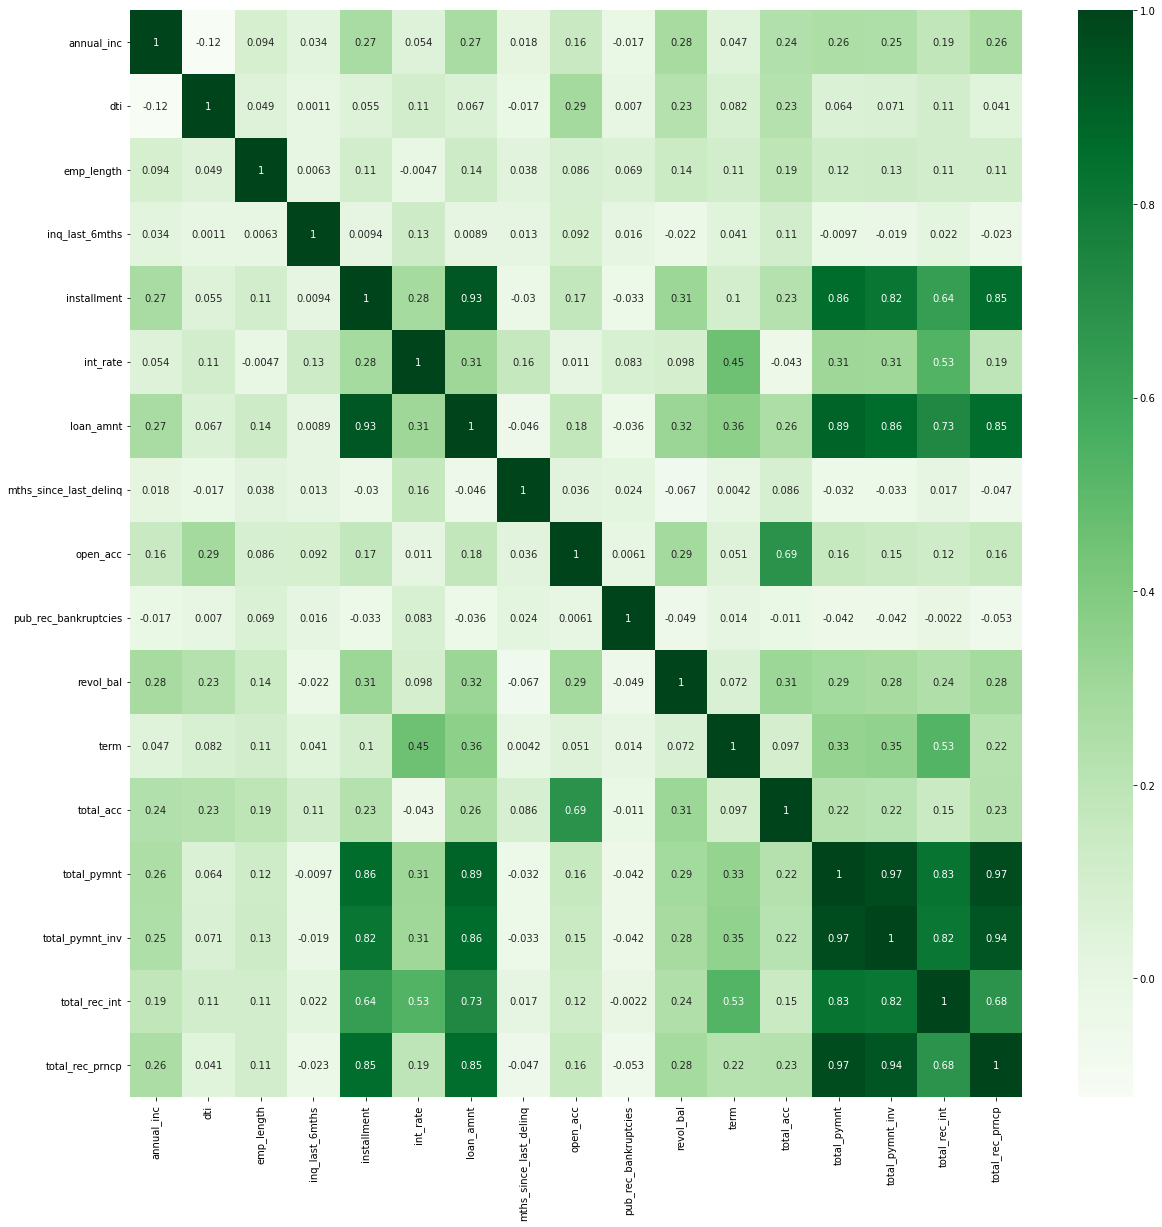

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df[corr_variables].corr(), annot=True, cmap='Greens')

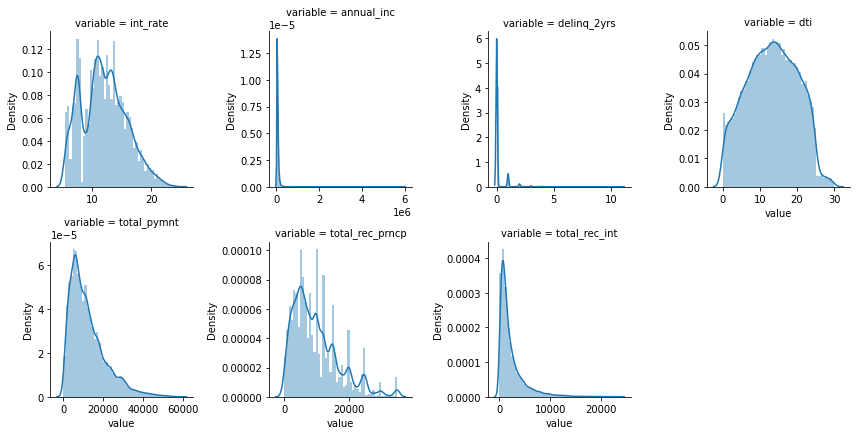

In [106]:
# Plot FacetGrid Decide on 03 July 2023
imp_features = df[['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int','loan_status']]

melted = pd.melt(imp_features,value_vars=['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int'])
f = sns.FacetGrid(melted,col='variable',sharex=False,sharey=False,col_wrap=4)
g = f.map(sns.distplot,'value')